####**COURS INTERACTIF: Apprentissage non supervisé en Python**

+ *4 heures*
+ *13 vidéos*
+ *52 Exercices*
+ *120 574 Participants*
+ *4 150 XP*

<img src = "https://www.datacamp.com/statement-of-accomplishment/badge/course/4b044a2a121a4b33cb5a182b34e8353b437e6321.png" />

###**Description du cours**

+ ***Supposons que vous ayez une collection de clients avec une variété de caractéristiques telles que l'âge, l'emplacement et l'historique financier, et que vous souhaitiez découvrir des modèles et les trier en grappes. Ou peut-être avez-vous un ensemble de textes, comme des pages Wikipédia, et vous souhaitez les segmenter en catégories en fonction de leur contenu. C'est le monde de l'apprentissage non supervisé, appelé ainsi parce que vous ne guidez pas ou ne supervisez pas la découverte de modèles par une tâche de prédiction, mais que vous découvrez plutôt une structure cachée à partir de données non étiquetées. L'apprentissage non supervisé englobe une variété de techniques d'apprentissage automatique, du regroupement à la réduction de dimension en passant par la factorisation matricielle. Dans ce cours, vous apprendrez les bases de l'apprentissage non supervisé et implémenterez les algorithmes essentiels à l'aide de scikit-learn et SciPy. Vous apprendrez à regrouper, transformer, visualiser et extraire des informations à partir d'ensembles de données non étiquetés, et terminerez le cours en créant un système de recommandation pour recommander des artistes musicaux populaires.***


####**1) Clustering pour l'exploration des ensembles de données**

+ ***Découvrez comment découvrir les groupes sous-jacents (ou "clusters") dans un ensemble de données. À la fin de ce chapitre, vous regrouperez des entreprises en utilisant leurs cours boursiers et distinguerez différentes espèces en regroupant leurs mesures.***

|OBJECTIFS|
|---------|
Apprentissage non supervisé
Combien de clusters ?
Regroupement de points 2D
Inspectez votre cluster
Évaluation d'un regroupement
Combien de grappes de céréales ?
Évaluation du regroupement des grains
Transformer les fonctionnalités pour de meilleurs regroupements
Mise à l'échelle des données sur les poissons pour le regroupement
Regroupement des données sur les poissons
Regroupement d'actions à l'aide de KMeans
Quels stocks évoluent ensemble?

####**2) Visualisation avec clustering hiérarchique et t-SNE**

+ ***Dans ce chapitre, vous découvrirez deux techniques d'apprentissage non supervisé pour la visualisation de données, le clustering hiérarchique et le t-SNE. Le clustering hiérarchique fusionne les échantillons de données en clusters de plus en plus grossiers, ce qui donne une visualisation arborescente de la hiérarchie de cluster résultante. t-SNE mappe les échantillons de données dans l'espace 2d afin que la proximité des échantillons les uns par rapport aux autres puisse être visualisée.***

|OBJECTIFS|
|---------|
Visualiser les hiérarchies
Combien de fusions ?
Regroupement hiérarchique des données de grains
Hiérarchies des stocks
Étiquettes de cluster dans le clustering hiérarchique
Quels clusters sont les plus proches ?
Liaison différente, clustering hiérarchique différent !
Regroupements intermédiaires
Extraction des étiquettes de cluster
t-SNE pour les cartes en 2 dimensions
Visualisation t-SNE du jeu de données sur les céréales
Une carte t-SNE du marché boursier

####**3) Décorrélation de vos données et réduction de dimension**

+ ***La réduction de dimension résume un jeu de données à l'aide de ses modèles courants. Dans ce chapitre, vous découvrirez les techniques de réduction de dimension les plus fondamentales, "l'analyse en composantes principales" ("ACP"). L'ACP est souvent utilisée avant l'apprentissage supervisé pour améliorer les performances et la généralisation du modèle. Il peut également être utile pour un apprentissage non supervisé. Par exemple, vous emploierez une variante de PCA qui vous permettra de regrouper les articles de Wikipédia selon leur contenu !***

|OBJECTIFS|
|---------|
Visualiser la transformation PCA
Données corrélées dans la nature
Décorrélation des mesures de grains avec PCA
Composants principaux
Dimension intrinsèque
Le premier élément principal
Variation des fonctionnalités PCA
Dimension intrinsèque des données sur les poissons
Réduction dimensionnelle avec PCA
Réduction dimensionnelle des mesures du poisson
Un tableau de fréquences de mots tf-idf
Clustering Wikipedia partie I
Clustering Wikipedia partie II

####**4) Découvrir les fonctionnalités interprétables**

+ ***Dans ce chapitre, vous découvrirez une technique de réduction de dimension appelée `« Factorisation matricielle non négative » (« NMF ») qui exprime des échantillons sous forme de combinaisons de parties interprétables`. Par exemple, il exprime les documents sous forme de combinaisons de sujets et les images en termes de modèles visuels courants. Vous apprendrez également à utiliser NMF pour créer des systèmes de recommandation qui peuvent vous trouver des articles similaires à lire ou des artistes musicaux qui correspondent à votre historique d'écoute !***

|OBJECTIFS|
|---------|
Factorisation matricielle non négative (NMF)
Données non négatives
NMF appliqué aux articles de Wikipédia
Fonctionnalités NMF des articles de Wikipédia
NMF reconstruit des échantillons
NMF apprend les parties interprétables
NMF apprend les sujets des documents
Explorez le jeu de données des chiffres LED
NMF apprend les parties des images
PCA n'apprend pas les pièces
Création de systèmes de recommandation à l'aide de NMF
Quels articles sont similaires à 'Cristiano Ronaldo' ?
Recommander des artistes musicaux partie I
Recommander des artistes musicaux partie II
Dernières pensées


###**IMPORTS**

In [1]:
import pandas as pd
from itertools import combinations
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np


from scipy.sparse import csr_matrix
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.stats import pearsonr

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, Normalizer, normalize, MaxAbsScaler
from sklearn.pipeline import make_pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD, NMF
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
import warnings
warnings.simplefilter(action="ignore", category=UserWarning)

###**CONFIGURATIONS**


In [3]:
#pd.set_option('max_columns', 200)
#pd.set_option('max_rows', 300)
sns.set_style("darkgrid")
pd.set_option('display.expand_frame_repr', True)
plt.rcParams["patch.force_edgecolor"] = True

####**1. Apprentissage non supervisé**

+ ***Salut! Je m'appelle Ben Wilson et je suis Data Scientist et mathématicien. Nous sommes ici pour en savoir plus sur l'apprentissage non supervisé en Python.***

###**2. Apprentissage non supervisé**

+ ***L'apprentissage non supervisé est une classe de techniques d'apprentissage automatique permettant de découvrir des modèles dans les données. Par exemple, trouver les "grappes" naturelles de clients en fonction de leurs historiques d'achat, ou rechercher des modèles et des corrélations entre ces achats, et utiliser ces modèles pour exprimer les données sous une forme compressée. Ce sont des exemples de techniques d'apprentissage non supervisé appelées `"clustering" et "dimension reduction"`.***

####**3. Apprentissage supervisé vs non supervisé**

+ ***L'apprentissage non supervisé est défini par opposition à l'apprentissage supervisé. Un exemple d'apprentissage supervisé consiste à utiliser les mesures des tumeurs pour les classer comme bénignes ou cancéreuses. Dans ce cas, la découverte de motifs est guidée, ou "supervisée", afin que les motifs soient aussi utiles que possible pour prédire l'étiquette : bénigne ou cancéreuse. L'apprentissage non supervisé, en revanche, est un apprentissage sans étiquette. Il s'agit d'une pure découverte de modèles, non guidée par une tâche de prédiction. Vous commencerez par vous familiariser avec le clustering. Mais avant de commencer, introduisons un ensemble de données et fixons une terminologie.***

####**4. Ensemble de données Iris**

+ ***L'ensemble de données sur l'iris comprend les mesures de nombreuses plantes d'iris de trois espèces différentes. Il existe quatre mesures : longueur des pétales, largeur des pétales, longueur des sépales et largeur des sépales. Ce sont les caractéristiques du jeu de données.***

  + *https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html*

####**5. Tableaux, fonctionnalités et exemples**

+ ***Tout au long de ce cours, des ensembles de données comme celui-ci seront écrits sous forme de tableaux numpy à deux dimensions. Les colonnes du tableau correspondront aux caractéristiques. Les mesures pour les plantes individuelles sont les échantillons de l'ensemble de données. Ceux-ci correspondent aux lignes du tableau.***

####**6. Les données de l'iris sont en 4 dimensions**

+ ***Les échantillons du jeu de données d'iris ont quatre mesures et correspondent donc à des points dans un espace à quatre dimensions. C'est la dimension de l'ensemble de données. Nous ne pouvons pas visualiser directement quatre dimensions, mais en utilisant des techniques d'apprentissage non supervisées, nous pouvons toujours avoir un aperçu.***

####**7. regroupement de k-moyennes**

+ ***Dans ce chapitre, nous allons regrouper ces échantillons en utilisant le clustering k-means. k-means trouve un nombre spécifié de clusters dans les échantillons. Il est implémenté dans la bibliothèque scikit-learn ou "sklearn". Voyons kmeans en action sur certains échantillons du jeu de données iris.***

####**8. k-means clustering avec scikit-learn**

+ ***Les échantillons d'iris sont représentés sous la forme d'un tableau. Pour commencer, importez kmeans depuis scikit-learn. Créez ensuite un modèle kmeans, en spécifiant le nombre de clusters que vous souhaitez rechercher. Précisons 3 grappes, puisqu'il existe trois espèces d'iris. Appelez maintenant la méthode d'ajustement du modèle, en transmettant le tableau d'échantillons. Cela adapte le modèle aux données, en localisant et en mémorisant les régions où se trouvent les différents clusters. On peut alors utiliser la méthode de prédiction du modèle sur ces mêmes échantillons. Cela renvoie une étiquette de cluster pour chaque échantillon, indiquant à quel cluster appartient un échantillon. Attribuons le résultat aux étiquettes et imprimons-le.***

####**9. Étiquettes de cluster pour les nouveaux échantillons**

+ ***Si quelqu'un arrive avec de nouveaux échantillons d'iris, k-means peut déterminer à quel groupe il appartient sans recommencer. k-means le fait en se souvenant de la moyenne (ou moyenne) des échantillons dans chaque cluster. Ceux-ci sont appelés les "centres de gravité". De nouveaux échantillons sont affectés au cluster dont le centroïde est le plus proche.***

####**10. Étiquettes de cluster pour les nouveaux échantillons**

+ ***upposons que vous disposiez d'un ensemble de nouveaux échantillons. Pour affecter les nouveaux échantillons aux clusters existants, transmettez le tableau de nouveaux échantillons à la méthode de prédiction du modèle kmeans. Cela renvoie les étiquettes de cluster des nouveaux échantillons.***

####**11. Nuages ​​de points**

+ ***Dans la vidéo suivante, vous apprendrez à évaluer la qualité de votre clustering. Mais pour l'instant, visualisons notre regroupement des échantillons d'iris à l'aide de nuages ​​de points. Voici un nuage de points de la longueur des sépales par rapport à la longueur des pétales des échantillons d'iris. Chaque point représente un échantillon d'iris et est coloré en fonction du groupe de l'échantillon. Pour créer un nuage de points comme celui-ci, utilisez PyPlot.***

####**12. Nuages ​​de points**

+ ***Tout d'abord, importez PyPlot. Il est traditionnellement importé sous le nom de plt. Obtenez maintenant les coordonnées $x$ et $y$ de chaque échantillon. La longueur des sépales est dans la 0e colonne du tableau, tandis que la longueur des pétales est dans la 2e colonne. Appelez maintenant la fonction plt dot scatter, en passant les coordonnées $x$ et $y$ et en spécifiant c=labels à colorier par label de cluster. Lorsque vous êtes prêt à montrer votre intrigue, appelez plt dot show.***

####**13. Entraînons-nous !**

+ ***Il est temps de faire vos premiers pas dans l'apprentissage non supervisé. Amusez-vous!***

###**EXERCICES**

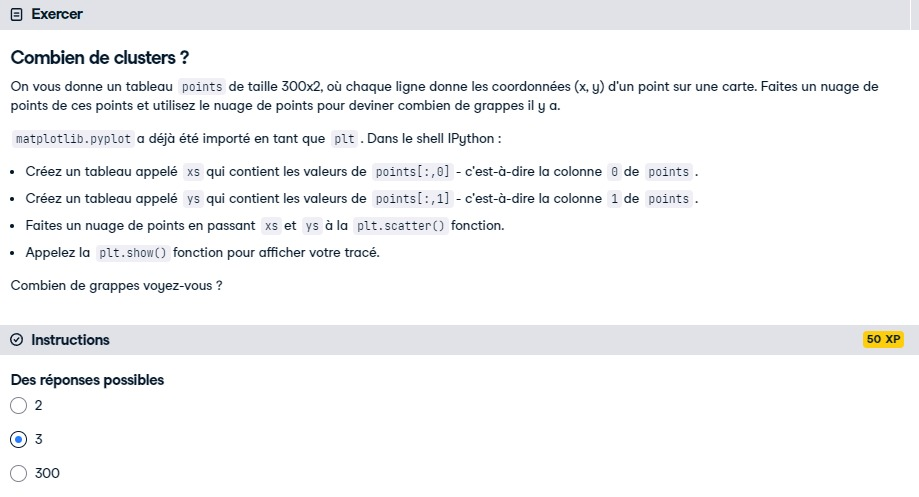

In [4]:
points = np.array([[ 0.06544649, -0.76866376],
       [-1.52901547, -0.42953079],
       [ 1.70993371,  0.69885253],
       [ 1.16779145,  1.01262638],
       [-1.80110088, -0.31861296],
       [-1.63567888, -0.02859535],
       [ 1.21990375,  0.74643463],
       [-0.26175155, -0.62492939],
       [-1.61925804, -0.47983949],
       [-1.84329582, -0.16694431],
       [ 1.35999602,  0.94995827],
       [ 0.42291856, -0.7349534 ],
       [-1.68576139,  0.10686728],
       [ 0.90629995,  1.09105162],
       [-1.56478322, -0.84675394],
       [-0.0257849 , -1.18672539],
       [ 0.83027324,  1.14504612],
       [ 1.22450432,  1.35066759],
       [-0.15394596, -0.71704301],
       [ 0.86358809,  1.06824613],
       [-1.43386366, -0.2381297 ],
       [ 0.03844769, -0.74635022],
       [-1.58567922,  0.08499354],
       [ 0.6359888 , -0.58477698],
       [ 0.24417242, -0.53172465],
       [-2.19680359,  0.49473677],
       [ 1.0323503 , -0.55688   ],
       [-0.28858067, -0.39972528],
       [ 0.20597008, -0.80171536],
       [-1.2107308 , -0.34924109],
       [ 1.33423684,  0.7721489 ],
       [ 1.19480152,  1.04788556],
       [ 0.9917477 ,  0.89202008],
       [-1.8356219 , -0.04839732],
       [ 0.08415721, -0.71564326],
       [-1.48970175, -0.19299604],
       [ 0.38782418, -0.82060119],
       [-0.01448044, -0.9779841 ],
       [-2.0521341 , -0.02129125],
       [ 0.10331194, -0.82162781],
       [-0.44189315, -0.65710974],
       [ 1.10390926,  1.02481182],
       [-1.59227759, -0.17374038],
       [-1.47344152, -0.02202853],
       [-1.35514704,  0.22971067],
       [ 0.0412337 , -1.23776622],
       [ 0.4761517 , -1.13672124],
       [ 1.04335676,  0.82345905],
       [-0.07961882, -0.85677394],
       [ 0.87065059,  1.08052841],
       [ 1.40267313,  1.07525119],
       [ 0.80111157,  1.28342825],
       [-0.16527516, -1.23583804],
       [-0.33779221, -0.59194323],
       [ 0.80610749, -0.73752159],
       [-1.43590032, -0.56384446],
       [ 0.54868895, -0.95143829],
       [ 0.46803131, -0.74973907],
       [-1.5137129 , -0.83914323],
       [ 0.9138436 ,  1.51126532],
       [-1.97233903, -0.41155375],
       [ 0.5213406 , -0.88654894],
       [ 0.62759494, -1.18590477],
       [ 0.94163014,  1.35399335],
       [ 0.56994768,  1.07036606],
       [-1.87663382,  0.14745773],
       [ 0.90612186,  0.91084011],
       [-1.37481454,  0.28428395],
       [-1.80564029, -0.96710574],
       [ 0.34307757, -0.79999275],
       [ 0.70380566,  1.00025804],
       [-1.68489862, -0.30564595],
       [ 1.31473221,  0.98614978],
       [ 0.26151216, -0.26069251],
       [ 0.9193121 ,  0.82371485],
       [-1.21795929, -0.20219674],
       [-0.17722723, -1.02665245],
       [ 0.64824862, -0.66822881],
       [ 0.41206786, -0.28783784],
       [ 1.01568202,  1.13481667],
       [ 0.67900254, -0.91489502],
       [-1.05182747, -0.01062376],
       [ 0.61306599,  1.78210384],
       [-1.50219748, -0.52308922],
       [-1.72717293, -0.46173916],
       [-1.60995631, -0.1821007 ],
       [-1.09111021, -0.0781398 ],
       [-0.01046978, -0.80913034],
       [ 0.32782303, -0.80734754],
       [ 1.22038503,  1.1959793 ],
       [-1.33328681, -0.30001937],
       [ 0.87959517,  1.11566491],
       [-1.14829098, -0.30400762],
       [-0.58019755, -1.19996018],
       [-0.01161159, -0.78468854],
       [ 0.17359724, -0.63398145],
       [ 1.32738556,  0.67759969],
       [-1.93467327,  0.30572472],
       [-1.57761893, -0.27726365],
       [ 0.47639   ,  1.21422648],
       [-1.65237509, -0.6803981 ],
       [-0.12609976, -1.04327457],
       [-1.89607082, -0.70085502],
       [ 0.57466899,  0.74878369],
       [-0.16660312, -0.83110295],
       [ 0.8013355 ,  1.22244435],
       [ 1.18455426,  1.4346467 ],
       [ 1.08864428,  0.64667112],
       [-1.61158505,  0.22805725],
       [-1.57512205, -0.09612576],
       [ 0.0721357 , -0.69640328],
       [-1.40054298,  0.16390598],
       [ 1.09607713,  1.16804691],
       [-2.54346204, -0.23089822],
       [-1.34544875,  0.25151126],
       [-1.35478629, -0.19103317],
       [ 0.18368113, -1.15827725],
       [-1.31368677, -0.376357  ],
       [ 0.09990129,  1.22500491],
       [ 1.17225574,  1.30835143],
       [ 0.0865397 , -0.79714371],
       [-0.21053923, -1.13421511],
       [ 0.26496024, -0.94760742],
       [-0.2557591 , -1.06266022],
       [-0.26039757, -0.74774225],
       [-1.91787359,  0.16434571],
       [ 0.93021139,  0.49436331],
       [ 0.44770467, -0.72877918],
       [-1.63802869, -0.58925528],
       [-1.95712763, -0.10125137],
       [ 0.9270337 ,  0.88251423],
       [ 1.25660093,  0.60828073],
       [-1.72818632,  0.08416887],
       [ 0.3499788 , -0.30490298],
       [-1.51696082, -0.50913109],
       [ 0.18763605, -0.55424924],
       [ 0.89609809,  0.83551508],
       [-1.54968857, -0.17114782],
       [ 1.2157457 ,  1.23317728],
       [ 0.20307745, -1.03784906],
       [ 0.84589086,  1.03615273],
       [ 0.53237919,  1.47362884],
       [-0.05319044, -1.36150553],
       [ 1.38819743,  1.11729915],
       [ 1.00696304,  1.0367721 ],
       [ 0.56681869, -1.09637176],
       [ 0.86888296,  1.05248874],
       [-1.16286609, -0.55875245],
       [ 0.27717768, -0.83844015],
       [ 0.16563267, -0.80306607],
       [ 0.38263303, -0.42683241],
       [ 1.14519807,  0.89659026],
       [ 0.81455857,  0.67533667],
       [-1.8603152 , -0.09537561],
       [ 0.965641  ,  0.90295579],
       [-1.49897451, -0.33254044],
       [-0.1335489 , -0.80727582],
       [ 0.12541527, -1.13354906],
       [ 1.06062436,  1.28816358],
       [-1.49154578, -0.2024641 ],
       [ 1.16189032,  1.28819877],
       [ 0.54282033,  0.75203524],
       [ 0.89221065,  0.99211624],
       [-1.49932011, -0.32430667],
       [ 0.3166647 , -1.34482915],
       [ 0.13972469, -1.22097448],
       [-1.5499724 , -0.10782584],
       [ 1.23846858,  1.37668804],
       [ 1.25558954,  0.72026098],
       [ 0.25558689, -1.28529763],
       [ 0.45168933, -0.55952093],
       [ 1.06202057,  1.03404604],
       [ 0.67451908, -0.54970299],
       [ 0.22759676, -1.02729468],
       [-1.45835281, -0.04951074],
       [ 0.23273501, -0.70849262],
       [ 1.59679589,  1.11395076],
       [ 0.80476105,  0.544627  ],
       [ 1.15492521,  1.04352191],
       [ 0.59632776, -1.19142897],
       [ 0.02839068, -0.43829366],
       [ 1.13451584,  0.5632633 ],
       [ 0.21576204, -1.04445753],
       [ 1.41048987,  1.02830719],
       [ 1.12289302,  0.58029441],
       [ 0.25200688, -0.82588436],
       [-1.28566081, -0.07390909],
       [ 1.52849815,  1.11822469],
       [-0.23907858, -0.70541972],
       [-0.25792784, -0.81825035],
       [ 0.59367818, -0.45239915],
       [ 0.07931909, -0.29233213],
       [-1.27256815,  0.11630577],
       [ 0.66930129,  1.00731481],
       [ 0.34791546, -1.20822877],
       [-2.11283993, -0.66897935],
       [-1.6293824 , -0.32718222],
       [-1.53819139, -0.01501972],
       [-0.11988545, -0.6036339 ],
       [-1.54418956, -0.30389844],
       [ 0.30026614, -0.77723173],
       [ 0.00935449, -0.53888192],
       [-1.33424393, -0.11560431],
       [ 0.47504489,  0.78421384],
       [ 0.59313264,  1.232239  ],
       [ 0.41370369, -1.35205857],
       [ 0.55840948,  0.78831053],
       [ 0.49855018, -0.789949  ],
       [ 0.35675809, -0.81038693],
       [-1.86197825, -0.59071305],
       [-1.61977671, -0.16076687],
       [ 0.80779295, -0.73311294],
       [ 1.62745775,  0.62787163],
       [-1.56993593, -0.08467567],
       [ 1.02558561,  0.89383302],
       [ 0.24293461, -0.6088253 ],
       [ 1.23130242,  1.00262186],
       [-1.9651013 , -0.15886289],
       [ 0.42795032, -0.70384432],
       [-1.58306818, -0.19431923],
       [-1.57195922,  0.01413469],
       [-0.98145373,  0.06132285],
       [-1.48637844, -0.5746531 ],
       [ 0.98745828,  0.69188053],
       [ 1.28619721,  1.28128821],
       [ 0.85850596,  0.95541481],
       [ 0.19028286, -0.82112942],
       [ 0.26561046, -0.04255239],
       [-1.61897897,  0.00862372],
       [ 0.24070183, -0.52664209],
       [ 1.15220993,  0.43916694],
       [-1.21967812, -0.2580313 ],
       [ 0.33412533, -0.86117761],
       [ 0.17131003, -0.75638965],
       [-1.19828397, -0.73744665],
       [-0.12245932, -0.45648879],
       [ 1.51200698,  0.88825741],
       [ 1.10338866,  0.92347479],
       [ 1.30972095,  0.59066989],
       [ 0.19964876,  1.14855889],
       [ 0.81460515,  0.84538972],
       [-1.6422739 , -0.42296206],
       [ 0.01224351, -0.21247816],
       [ 0.33709102, -0.74618065],
       [ 0.47301054,  0.72712075],
       [ 0.34706626,  1.23033757],
       [-0.00393279, -0.97209694],
       [-1.64303119,  0.05276337],
       [ 1.44649625,  1.14217033],
       [-1.93030087, -0.40026146],
       [-2.37296135, -0.72633645],
       [ 0.45860122, -1.06048953],
       [ 0.4896361 , -1.18928313],
       [-1.02335902, -0.17520578],
       [-1.32761107, -0.93963549],
       [-1.50987909, -0.09473658],
       [ 0.02723057, -0.79870549],
       [ 1.0169412 ,  1.26461701],
       [ 0.47733527, -0.9898471 ],
       [-1.27784224, -0.547416  ],
       [ 0.49898802, -0.6237259 ],
       [ 1.06004731,  0.86870008],
       [ 1.00207501,  1.38293512],
       [ 1.31161394,  0.62833956],
       [ 1.13428443,  1.18346542],
       [ 1.27671346,  0.96632878],
       [-0.63342885, -0.97768251],
       [ 0.12698779, -0.93142317],
       [-1.34510812, -0.23754226],
       [-0.53162278, -1.25153594],
       [ 0.21959934, -0.90269938],
       [-1.78997479, -0.12115748],
       [ 1.23197473, -0.07453764],
       [ 1.4163536 ,  1.21551752],
       [-1.90280976, -0.1638976 ],
       [-0.22440081, -0.75454248],
       [ 0.59559412,  0.92414553],
       [ 1.21930773,  1.08175284],
       [-1.99427535, -0.37587799],
       [-1.27818474, -0.52454551],
       [ 0.62352689, -1.01430108],
       [ 0.14024251, -0.428266  ],
       [-0.16145713, -1.16359731],
       [-1.74795865, -0.06033101],
       [-1.16659791,  0.0902393 ],
       [ 0.41110408, -0.8084249 ],
       [ 1.14757168,  0.77804528],
       [-1.65590748, -0.40105446],
       [-1.15306865,  0.00858699],
       [ 0.60892121,  0.68974833],
       [-0.08434138, -0.97615256],
       [ 0.19170053, -0.42331438],
       [ 0.29663162, -1.13357399],
       [-1.36893628, -0.25052124],
       [-0.08037807, -0.56784155],
       [ 0.35695011, -1.15064408],
       [ 0.02482179, -0.63594828],
       [-1.49075558, -0.2482507 ],
       [-1.408588  ,  0.25635431],
       [-1.98274626, -0.54584475]])

In [5]:
points[:3]

array([[ 0.06544649, -0.76866376],
       [-1.52901547, -0.42953079],
       [ 1.70993371,  0.69885253]])

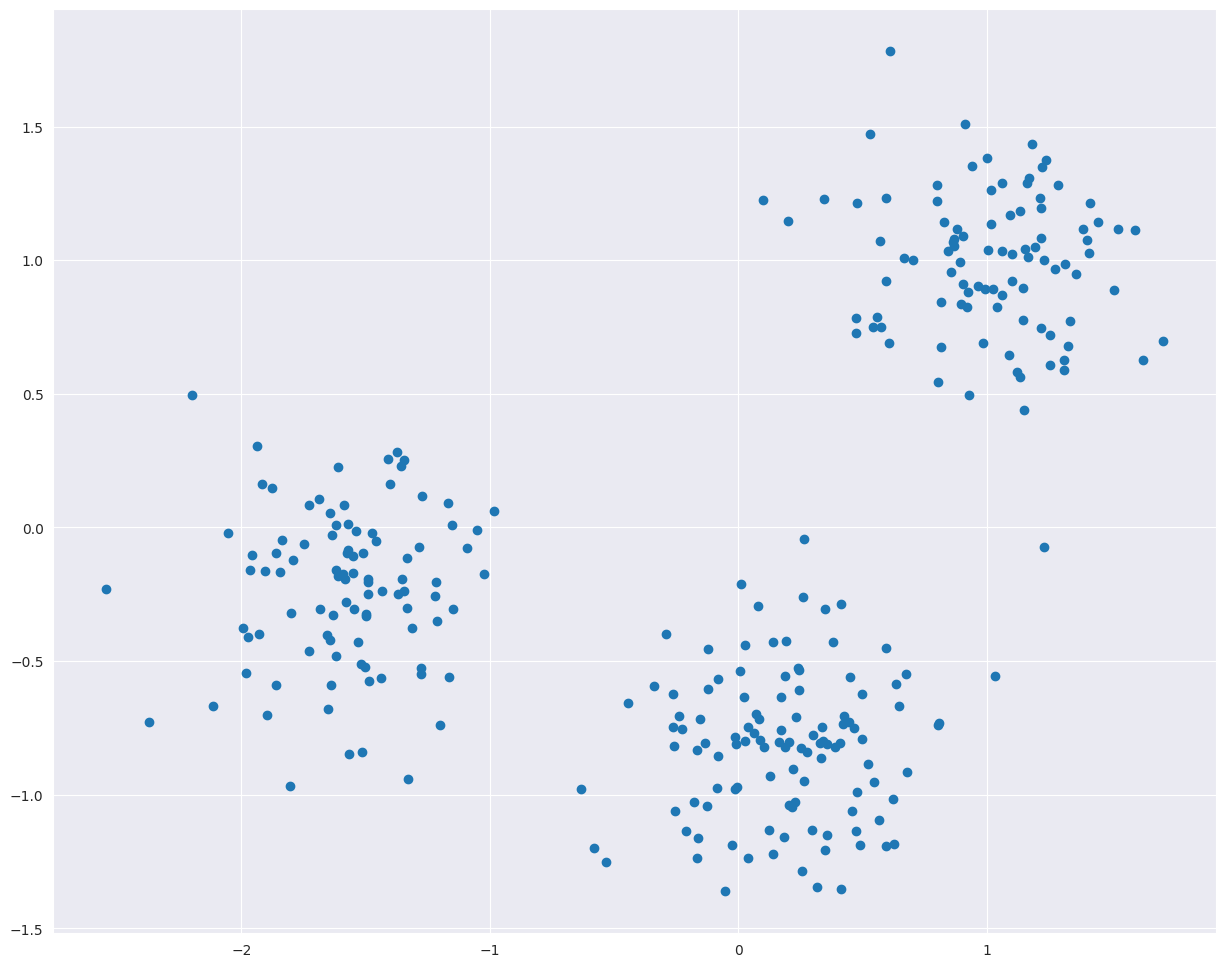

In [6]:
xs=points[:,0]
ys=points[:,1]

plt.figure(figsize=(15,12))
plt.scatter(xs,ys)
plt.show()

***Correct! Le nuage de points suggère qu'il existe 3 clusters distincts.***

####**Regroupement de points 2D**

+ ***À partir du nuage de points de l'exercice précédent, vous avez vu que les points semblent se séparer en 3 groupes. Vous allez maintenant créer un modèle KMeans pour trouver 3 clusters et l'adapter aux points de données de l'exercice précédent. Une fois le modèle ajusté, vous obtiendrez les étiquettes de cluster pour certains nouveaux points à l'aide de la méthode .predict().***

+ *On vous donne le tableau pointsde l'exercice précédent, ainsi qu'un tableau new_points.*

####**Instructions**

+ Importer KMeans depuis sklearn.cluster.
+ À l'aide de KMeans(), créez une instance KMeans appelée model pour rechercher 3 des clusters.
+ Pour spécifier le nombre de clusters, utilisez l'argument n_clusters de mot-clé.
+ Utilisez la méthode .fit() de model pour ajuster le modèle au tableau de points points.
Utilisez la méthode .predict() de model pour prédire les étiquettes de cluster de new_points, en attribuant le résultat à labels.
+ Cliquez sur soumettre pour voir les étiquettes de cluster de new_points.

In [7]:
new_points = np.array([[ 4.00233332e-01, -1.26544471e+00],
       [ 8.03230370e-01,  1.28260167e+00],
       [-1.39507552e+00,  5.57292921e-02],
       [-3.41192677e-01, -1.07661994e+00],
       [ 1.54781747e+00,  1.40250049e+00],
       [ 2.45032018e-01, -4.83442328e-01],
       [ 1.20706886e+00,  8.88752605e-01],
       [ 1.25132628e+00,  1.15555395e+00],
       [ 1.81004415e+00,  9.65530731e-01],
       [-1.66963401e+00, -3.08103509e-01],
       [-7.17482105e-02, -9.37939700e-01],
       [ 6.82631927e-01,  1.10258160e+00],
       [ 1.09039598e+00,  1.43899529e+00],
       [-1.67645414e+00, -5.04557049e-01],
       [-1.84447804e+00,  4.52539544e-02],
       [ 1.24234851e+00,  1.02088661e+00],
       [-1.86147041e+00,  6.38645811e-03],
       [-1.46044943e+00,  1.53252383e-01],
       [ 4.98981817e-01,  8.98006058e-01],
       [ 9.83962244e-01,  1.04369375e+00],
       [-1.83136742e+00, -1.63632835e-01],
       [ 1.30622617e+00,  1.07658717e+00],
       [ 3.53420328e-01, -7.51320218e-01],
       [ 1.13957970e+00,  1.54503860e+00],
       [ 2.93995694e-01, -1.26135005e+00],
       [-1.14558225e+00, -3.78709636e-02],
       [ 1.18716105e+00,  6.00240663e-01],
       [-2.23211946e+00,  2.30475094e-01],
       [-1.28320430e+00, -3.93314568e-01],
       [ 4.94296696e-01, -8.83972009e-01],
       [ 6.31834930e-02, -9.11952228e-01],
       [ 9.35759539e-01,  8.66820685e-01],
       [ 1.58014721e+00,  1.03788392e+00],
       [ 1.06304960e+00,  1.02706082e+00],
       [-1.39732536e+00, -5.05162249e-01],
       [-1.09935240e-01, -9.08113619e-01],
       [ 1.17346758e+00,  9.47501092e-01],
       [ 9.20084511e-01,  1.45767672e+00],
       [ 5.82658956e-01, -9.00086832e-01],
       [ 9.52772328e-01,  8.99042386e-01],
       [-1.37266956e+00, -3.17878215e-02],
       [ 2.12706760e-02, -7.07614194e-01],
       [ 3.27049052e-01, -5.55998107e-01],
       [-1.71590267e+00,  2.15222266e-01],
       [ 5.12516209e-01, -7.60128245e-01],
       [ 1.13023469e+00,  7.22451122e-01],
       [-1.43074310e+00, -3.42787511e-01],
       [-1.82724625e+00,  1.17657775e-01],
       [ 1.41801350e+00,  1.11455080e+00],
       [ 1.26897304e+00,  1.41925971e+00],
       [ 8.04076494e-01,  1.63988557e+00],
       [ 8.34567752e-01,  1.09956689e+00],
       [-1.24714732e+00, -2.23522320e-01],
       [-1.29422537e+00,  8.18770024e-02],
       [-2.27378316e-01, -4.13331387e-01],
       [ 2.18830387e-01, -4.68183120e-01],
       [-1.22593414e+00,  2.55599147e-01],
       [-1.31294033e+00, -4.28892070e-01],
       [-1.33532382e+00,  6.52053776e-01],
       [-3.01100233e-01, -1.25156451e+00],
       [ 2.02778356e-01, -9.05277445e-01],
       [ 1.01357784e+00,  1.12378981e+00],
       [ 8.18324394e-01,  8.60841257e-01],
       [ 1.26181556e+00,  1.46613744e+00],
       [ 4.64867724e-01, -7.97212459e-01],
       [ 3.60908898e-01,  8.44106720e-01],
       [-2.15098310e+00, -3.69583937e-01],
       [ 1.05005281e+00,  8.74181364e-01],
       [ 1.06580074e-01, -7.49268153e-01],
       [-1.73945723e+00,  2.52183577e-01],
       [-1.12017687e-01, -6.52469788e-01],
       [ 5.16618951e-01, -6.41267582e-01],
       [ 3.26621787e-01, -8.80608015e-01],
       [ 1.09017759e+00,  1.10952558e+00],
       [ 3.64459576e-01, -6.94215622e-01],
       [-1.90779318e+00,  1.87383674e-01],
       [-1.95601829e+00,  1.39959126e-01],
       [ 3.18541701e-01, -4.05271704e-01],
       [ 7.36512699e-01,  1.76416255e+00],
       [-1.44175162e+00, -5.72320429e-02],
       [ 3.21757168e-01, -5.34283821e-01],
       [-1.37317305e+00,  4.64484644e-02],
       [ 6.87225910e-02, -1.10522944e+00],
       [ 9.59314218e-01,  6.52316210e-01],
       [-1.62641919e+00, -5.62423280e-01],
       [ 1.06788305e+00,  7.29260482e-01],
       [-1.79643547e+00, -9.88307418e-01],
       [-9.88628377e-02, -6.81198092e-02],
       [-1.05135700e-01,  1.17022143e+00],
       [ 8.79964699e-01,  1.25340317e+00],
       [ 9.80753407e-01,  1.15486539e+00],
       [-8.33224966e-02, -9.24844368e-01],
       [ 8.48759673e-01,  1.09397425e+00],
       [ 1.32941649e+00,  1.13734563e+00],
       [ 3.23788068e-01, -7.49732451e-01],
       [-1.52610970e+00, -2.49016929e-01],
       [-1.48598116e+00, -2.68828608e-01],
       [-1.80479553e+00,  1.87052700e-01],
       [-2.01907347e+00, -4.49511651e-01],
       [ 2.87202402e-01, -6.55487415e-01],
       [ 8.22295102e-01,  1.38443234e+00],
       [-3.56997036e-02, -8.01825807e-01],
       [-1.66955440e+00, -1.38258505e-01],
       [-1.78226821e+00,  2.93353033e-01],
       [ 7.25837138e-01, -6.23374024e-01],
       [ 3.88432593e-01, -7.61283497e-01],
       [ 1.49002783e+00,  7.95678671e-01],
       [ 6.55423228e-04, -7.40580702e-01],
       [-1.34533116e+00, -4.75629937e-01],
       [-8.03845106e-01, -3.09943013e-01],
       [-2.49041295e-01, -1.00662418e+00],
       [-1.41095118e+00, -7.06744127e-02],
       [-1.75119594e+00, -3.00491336e-01],
       [-1.27942724e+00,  1.73774600e-01],
       [ 3.35028183e-01,  6.24761151e-01],
       [ 1.16819649e+00,  1.18902251e+00],
       [ 7.15210457e-01,  9.26077419e-01],
       [ 1.30057278e+00,  9.16349565e-01],
       [-1.21697008e+00,  1.10039477e-01],
       [-1.70707935e+00, -5.99659536e-02],
       [ 1.20730655e+00,  1.05480463e+00],
       [ 1.86896009e-01, -9.58047234e-01],
       [ 8.03463471e-01,  3.86133140e-01],
       [-1.73486790e+00, -1.49831913e-01],
       [ 1.31261499e+00,  1.11802982e+00],
       [ 4.04993148e-01, -5.10900347e-01],
       [-1.93267968e+00,  2.20764694e-01],
       [ 6.56004799e-01,  9.61887161e-01],
       [-1.40588215e+00,  1.17134403e-01],
       [-1.74306264e+00, -7.47473959e-02],
       [ 5.43745412e-01,  1.47209224e+00],
       [-1.97331669e+00, -2.27124493e-01],
       [ 1.53901171e+00,  1.36049081e+00],
       [-1.48323452e+00, -4.90302063e-01],
       [ 3.86748484e-01, -1.26173400e+00],
       [ 1.17015716e+00,  1.18549415e+00],
       [-8.05381721e-02, -3.21923627e-01],
       [-6.82273156e-02, -8.52825887e-01],
       [ 7.13500028e-01,  1.27868520e+00],
       [-1.85014378e+00, -5.03490558e-01],
       [ 6.36085266e-02, -1.41257040e+00],
       [ 1.52966062e+00,  9.66056572e-01],
       [ 1.62165714e-01, -1.37374843e+00],
       [-3.23474497e-01, -7.06620269e-01],
       [-1.51768993e+00,  1.87658302e-01],
       [ 8.88895911e-01,  7.62237161e-01],
       [ 4.83164032e-01,  8.81931869e-01],
       [-5.52997766e-02, -7.11305016e-01],
       [-1.57966441e+00, -6.29220313e-01],
       [ 5.51308645e-02, -8.47206763e-01],
       [-2.06001582e+00,  5.87697787e-02],
       [ 1.11810855e+00,  1.30254175e+00],
       [ 4.87016164e-01, -9.90143937e-01],
       [-1.65518042e+00, -1.69386383e-01],
       [-1.44349738e+00,  1.90299243e-01],
       [-1.70074547e-01, -8.26736022e-01],
       [-1.82433979e+00, -3.07814626e-01],
       [ 1.03093485e+00,  1.26457691e+00],
       [ 1.64431169e+00,  1.27773115e+00],
       [-1.47617693e+00,  2.60783872e-02],
       [ 1.00953067e+00,  1.14270181e+00],
       [-1.45285636e+00, -2.55216207e-01],
       [-1.74092917e+00, -8.34443177e-02],
       [ 1.22038299e+00,  1.28699961e+00],
       [ 9.16925397e-01,  7.32070275e-01],
       [-1.60754185e-03, -7.26375571e-01],
       [ 8.93841238e-01,  8.41146643e-01],
       [ 6.33791961e-01,  1.00915134e+00],
       [-1.47927075e+00, -6.99781936e-01],
       [ 5.44799374e-02, -1.06441970e+00],
       [-1.51935568e+00, -4.89276929e-01],
       [ 2.89939026e-01, -7.73145523e-01],
       [-9.68154061e-03, -1.13302207e+00],
       [ 1.13474639e+00,  9.71541744e-01],
       [ 5.36421406e-01, -8.47906388e-01],
       [ 1.14759864e+00,  6.89915205e-01],
       [ 5.73291902e-01,  7.90802710e-01],
       [ 2.12377397e-01, -6.07569808e-01],
       [ 5.26579548e-01, -8.15930264e-01],
       [-2.01831641e+00,  6.78650740e-02],
       [-2.35512624e-01, -1.08205132e+00],
       [ 1.59274780e-01, -6.00717261e-01],
       [ 2.28120356e-01, -1.16003549e+00],
       [-1.53658378e+00,  8.40798808e-02],
       [ 1.13954609e+00,  6.31782001e-01],
       [ 1.01119255e+00,  1.04360805e+00],
       [-1.42039867e-01, -4.81230337e-01],
       [-2.23120182e+00,  8.49162905e-02],
       [ 1.25554811e-01, -1.01794793e+00],
       [-1.72493509e+00, -6.94426177e-01],
       [-1.60434630e+00,  4.45550868e-01],
       [ 7.37153979e-01,  9.26560744e-01],
       [ 6.72905271e-01,  1.13366030e+00],
       [ 1.20066456e+00,  7.26273093e-01],
       [ 7.58747209e-02, -9.83378326e-01],
       [ 1.28783262e+00,  1.18088601e+00],
       [ 1.06521930e+00,  1.00714746e+00],
       [ 1.05871698e+00,  1.12956519e+00],
       [-1.12643410e+00,  1.66787744e-01],
       [-1.10157218e+00, -3.64137806e-01],
       [ 2.35118217e-01, -1.39769949e-01],
       [ 1.13853795e+00,  1.01018519e+00],
       [ 5.31205654e-01, -8.81990792e-01],
       [ 4.33085936e-01, -7.64059042e-01],
       [-4.48926156e-03, -1.30548411e+00],
       [-1.76348589e+00, -4.97430739e-01],
       [ 1.36485681e+00,  5.83404699e-01],
       [ 5.66923900e-01,  1.51391963e+00],
       [ 1.35736826e+00,  6.70915318e-01],
       [ 1.07173397e+00,  6.11990884e-01],
       [ 1.00106915e+00,  8.93815326e-01],
       [ 1.33091007e+00,  8.79773879e-01],
       [-1.79603740e+00, -3.53883973e-02],
       [-1.27222979e+00,  4.00156642e-01],
       [ 8.47480603e-01,  1.17032364e+00],
       [-1.50989129e+00, -7.12318330e-01],
       [-1.24953576e+00, -5.57859730e-01],
       [-1.27717973e+00, -5.99350550e-01],
       [-1.81946743e+00,  7.37057673e-01],
       [ 1.19949867e+00,  1.56969386e+00],
       [-1.25543847e+00, -2.33892826e-01],
       [-1.63052058e+00,  1.61455865e-01],
       [ 1.10611305e+00,  7.39698224e-01],
       [ 6.70193192e-01,  8.70567001e-01],
       [ 3.69670156e-01, -6.94645306e-01],
       [-1.26362293e+00, -6.99249285e-01],
       [-3.66687507e-01, -1.35310260e+00],
       [ 2.44032147e-01, -6.59470793e-01],
       [-1.27679142e+00, -4.85453412e-01],
       [ 3.77473612e-02, -6.99251605e-01],
       [-2.19148539e+00, -4.91199500e-01],
       [-2.93277777e-01, -5.89488212e-01],
       [-1.65737397e+00, -2.98337786e-01],
       [ 7.36638861e-01,  5.78037057e-01],
       [ 1.13709081e+00,  1.30119754e+00],
       [-1.44146601e+00,  3.13934680e-02],
       [ 5.92360708e-01,  1.22545114e+00],
       [ 6.51719414e-01,  4.92674894e-01],
       [ 5.94559139e-01,  8.25637315e-01],
       [-1.87900722e+00, -5.21899626e-01],
       [ 2.15225041e-01, -1.28269851e+00],
       [ 4.99145965e-01, -6.70268634e-01],
       [-1.82954176e+00, -3.39269731e-01],
       [ 7.92721403e-01,  1.33785606e+00],
       [ 9.54363372e-01,  9.80396626e-01],
       [-1.35359846e+00,  1.03976340e-01],
       [ 1.05595062e+00,  8.07031927e-01],
       [-1.94311010e+00, -1.18976964e-01],
       [-1.39604137e+00, -3.10095976e-01],
       [ 1.28977624e+00,  1.01753365e+00],
       [-1.59503139e+00, -5.40574609e-01],
       [-1.41994046e+00, -3.81032569e-01],
       [-2.35569801e-02, -1.10133702e+00],
       [-1.26038568e+00, -6.93273886e-01],
       [ 9.60215981e-01, -8.11553694e-01],
       [ 5.51803308e-01, -1.01793176e+00],
       [ 3.70185085e-01, -1.06885468e+00],
       [ 8.25529207e-01,  8.77007060e-01],
       [-1.87032595e+00,  2.87507199e-01],
       [-1.56260769e+00, -1.89196712e-01],
       [-1.26346548e+00, -7.74725237e-01],
       [-6.33800421e-02, -7.59400611e-01],
       [ 8.85298280e-01,  8.85620519e-01],
       [-1.43324686e-01, -1.16083678e+00],
       [-1.83908725e+00, -3.26655515e-01],
       [ 2.74709229e-01, -1.04546829e+00],
       [-1.45703573e+00, -2.91842036e-01],
       [-1.59048842e+00,  1.66063031e-01],
       [ 9.25549284e-01,  7.41406406e-01],
       [ 1.97245469e-01, -7.80703225e-01],
       [ 2.88401697e-01, -8.32425551e-01],
       [ 7.24141618e-01, -7.99149200e-01],
       [-1.62658639e+00, -1.80005543e-01],
       [ 5.84481588e-01,  1.13195640e+00],
       [ 1.02146732e+00,  4.59657799e-01],
       [ 8.65050554e-01,  9.57714887e-01],
       [ 3.98717766e-01, -1.24273147e+00],
       [ 8.62234892e-01,  1.10955561e+00],
       [-1.35999430e+00,  2.49942654e-02],
       [-1.19178505e+00, -3.82946323e-02],
       [ 1.29392424e+00,  1.10320509e+00],
       [ 1.25679630e+00, -7.79857582e-01],
       [ 9.38040302e-02, -5.53247258e-01],
       [-1.73512175e+00, -9.76271667e-02],
       [ 2.23153587e-01, -9.43474351e-01],
       [ 4.01989100e-01, -1.10963051e+00],
       [-1.42244158e+00,  1.81914703e-01],
       [ 3.92476267e-01, -8.78426277e-01],
       [ 1.25181875e+00,  6.93614996e-01],
       [ 1.77481317e-02, -7.20304235e-01],
       [-1.87752521e+00, -2.63870424e-01],
       [-1.58063602e+00, -5.50456344e-01],
       [-1.59589493e+00, -1.53932892e-01],
       [-1.01829770e+00,  3.88542370e-02],
       [ 1.24819659e+00,  6.60041803e-01],
       [-1.25551377e+00, -2.96172009e-02],
       [-1.41864559e+00, -3.58230179e-01],
       [ 5.25758326e-01,  8.70500543e-01],
       [ 5.55599988e-01,  1.18765072e+00],
       [ 2.81344439e-02, -6.99111314e-01]])

In [8]:
# Import KMeans
from sklearn.cluster import KMeans

# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3, n_init='auto')

# Fit model to points
model.fit(points)

# Determine the cluster labels of new_points: labels
labels = model.predict(new_points)

# Print cluster labels of new_points
print(labels)

[2 0 1 2 0 2 0 0 0 1 2 0 0 1 1 0 1 1 0 0 1 0 2 0 2 1 0 1 1 2 2 0 0 0 1 2 0
 0 2 0 1 2 2 1 2 0 1 1 0 0 0 0 1 1 2 2 1 1 1 2 2 0 0 0 2 0 1 0 2 1 2 2 2 0
 2 1 1 2 0 1 2 1 2 0 1 0 1 2 0 0 0 2 0 0 2 1 1 1 1 2 0 2 1 1 2 2 0 2 1 1 2
 1 1 1 0 0 0 0 1 1 0 2 0 1 0 2 1 0 1 1 0 1 0 1 2 0 2 2 0 1 2 0 2 2 1 0 0 2
 1 2 1 0 2 1 1 2 1 0 0 1 0 1 1 0 0 2 0 0 1 2 1 2 2 0 2 0 0 2 2 1 2 2 2 1 0
 0 2 1 2 1 1 0 0 0 2 0 0 0 1 1 2 0 2 2 2 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 1
 0 0 2 1 2 2 1 2 1 2 1 0 0 1 0 0 0 1 2 2 1 0 0 1 0 1 1 0 1 1 2 1 2 2 2 0 1
 1 1 2 0 2 1 2 1 1 0 2 2 2 1 0 0 0 2 0 1 1 0 2 2 1 2 2 1 2 0 2 1 1 1 1 0 1
 1 0 0 2]


***Bon travail! Vous avez réussi à effectuer un clustering k-Means et à prédire les étiquettes de nouveaux points. Mais il n'est pas facile d'inspecter le regroupement en regardant simplement les étiquettes imprimées. Une visualisation serait beaucoup plus utile. Dans le prochain exercice, vous allez inspecter votre regroupement avec un nuage de points !***

####**Inspectez votre cluster**

+ ***Inspectons maintenant le clustering que vous avez effectué dans l'exercice précédent !***

+ ***Une solution à l'exercice précédent a déjà été exécutée, ainsi new_points qu'un tableau de points et labels le tableau de leurs étiquettes de cluster.***

####**Instructions**

+ Importer matplotlib.pyplot au format plt.
+ Attribuez la colonne 0 de new_points à xs et la colonne 1 de new_points à ys.
+ Créez un nuage de points de xs et ys, en spécifiant les arguments c=labels de mot-clé pour colorer les points par leur étiquette de cluster. Précisez également alpha=0.5.
+ Calculez les coordonnées des centres de gravité à l'aide de l'attribut  .cluster_centers_ model.
+ Attribuez la colonne 0de centroidsà centroids_x et la colonne 1 de centroids à centroids_y.
+ Créez un nuage de points de centroids_x et centroids_y, en utilisant 'D'(un losange) comme marqueur en spécifiant le paramètre marker.
+ Définissez la taille des marqueurs à 50 utiliser s=50.

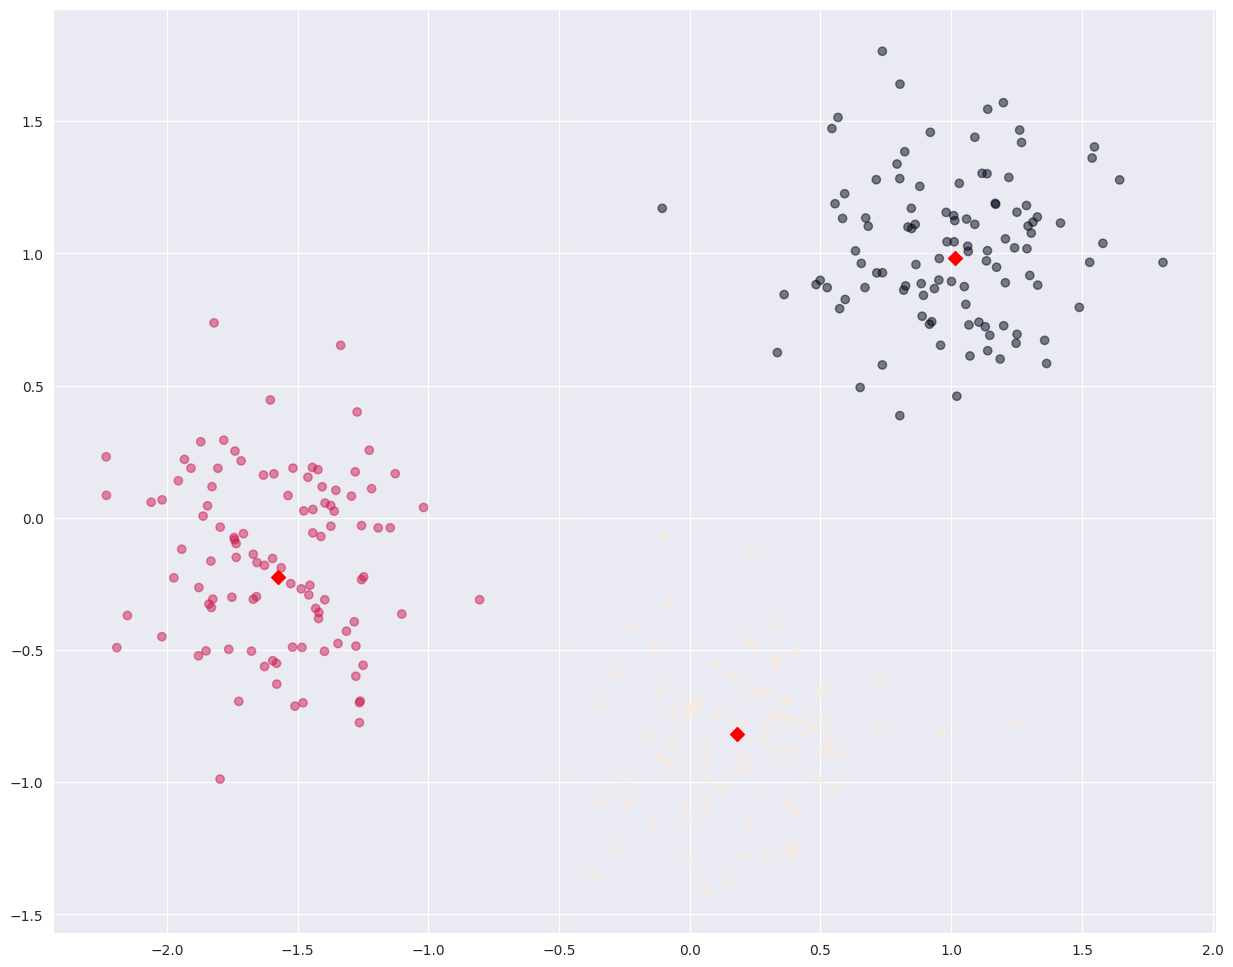

In [9]:
# Assign the columns of new_points: xs and ys
xs = new_points[:, 0]
ys = new_points[:, 1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.figure(figsize=(15,12))
plt.scatter(xs, ys, c=labels, alpha=0.5)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:, 0]
centroids_y = centroids[:, 1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker='D', s=50, color='red')

***Fantastique! Le regroupement a fière allure ! Mais comment être sûr que 3 clusters est le bon choix ? Autrement dit, comment évaluer la qualité d'un clustering ? Branchez-vous sur la prochaine vidéo dans laquelle Ben vous expliquera comment évaluer un clustering !***

####**1. Évaluer un regroupement**

+ ***Dans la vidéo précédente, nous avons utilisé k-means pour regrouper les échantillons d'iris en trois groupes. Mais comment évaluer la qualité de ce clustering ?***

####**2. Évaluer un regroupement**

+ ***Une approche directe consiste à comparer les grappes avec les espèces d'iris. Vous apprendrez d'abord cela, avant d'examiner le problème de la façon de mesurer la qualité d'un regroupement d'une manière qui n'exige pas que nos échantillons soient pré-groupés en espèces. Cette mesure de la qualité peut ensuite être utilisée pour faire un choix éclairé sur le nombre de clusters à rechercher.***

####**3. Iris : grappes vs espèces**

+ ***Tout d'abord, vérifions si les 3 groupes d'échantillons d'iris ont une correspondance avec les espèces d'iris. La correspondance est décrite par ce tableau. Il y a une colonne pour chacune des trois espèces d'iris : setosa, versicolor et virginica, et une ligne pour chacune des trois étiquettes de grappe : 0, 1 et 2. Le tableau montre le nombre d'échantillons qui ont chaque étiquette de grappe possible/ combinaison d'espèces. Par exemple, on voit que le cluster 1 correspond parfaitement à l'espèce setosa. D'autre part, alors que le groupe 0 contient principalement des échantillons de virginica, il y a aussi des échantillons de virginica dans le groupe 2.***

####**4. Tableau croisé avec les pandas**

+ ***Des tableaux comme ceux-ci sont appelés "tableaux croisés". Pour en construire un, nous allons utiliser la librairie pandas. Supposons que l'espèce de chaque échantillon est donnée sous la forme d'une liste de chaînes.***

####**5. Aligner les étiquettes et les espèces**

+ ***Importez des pandas, puis créez un DataFrame à deux colonnes, où la première colonne est les étiquettes de cluster et la deuxième colonne est l'espèce d'iris, de sorte que chaque ligne donne l'étiquette de cluster et l'espèce d'un seul échantillon.***

####**6. Tableau croisé des étiquettes et des espèces**

+ ***Utilisez maintenant la fonction de tableau croisé pandas pour construire le tableau croisé, en passant les deux colonnes du DataFrame. Des tabulations croisées comme celles-ci fournissent d'excellentes informations sur le type d'échantillons dans quel groupe. Mais dans la plupart des ensembles de données, les échantillons ne sont pas étiquetés par espèce. Comment évaluer la qualité d'un clustering dans ces cas ?***

####**7. Mesurer la qualité du clustering**

+ ***Nous avons besoin d'un moyen de mesurer la qualité d'un clustering qui n'utilise que les clusters et les échantillons eux-mêmes. Un bon regroupement a des grappes serrées, ce qui signifie que les échantillons de chaque grappe sont regroupés et non étalés.***

####**8. L'inertie mesure la qualité du regroupement**

+ ***La répartition des échantillons au sein de chaque groupe peut être mesurée par "l'inertie". Intuitivement, l'inertie mesure la distance entre les échantillons et leurs centroïdes. Vous pouvez trouver la définition précise dans la documentation scikit-learn. Nous voulons des clusters qui ne sont pas étalés, donc des valeurs d'inertie plus faibles sont meilleures. L'inertie d'un modèle kmeans est mesurée automatiquement lorsque l'une des méthodes d'ajustement est appelée et est ensuite disponible en tant qu'attribut d'inertie. En fait, kmeans vise à placer les clusters de manière à minimiser l'inertie.***

####**9. Le nombre de grappes**

+ ***Voici un graphique des valeurs d'inertie des regroupements de l'ensemble de données de l'iris avec différents nombres de grappes. Notre modèle kmeans avec 3 clusters a une inertie relativement faible, ce qui est excellent. Mais remarquez que l'inertie continue de diminuer lentement. Alors, quel est le meilleur nombre de clusters à choisir ?***

####**10. Combien de clusters choisir ?**

+ ***En fin de compte, il s'agit d'un compromis. Un bon clustering a des clusters serrés (ce qui signifie une faible inertie). Mais il n'a pas non plus trop de clusters. Une bonne règle empirique consiste à choisir un coude dans le diagramme d'inertie, c'est-à-dire un point où l'inertie commence à diminuer plus lentement. Par exemple, selon ce critère, 3 est un bon nombre de clusters pour l'ensemble de données iris.***

####**11. Entraînons-nous !**

+ ***Dans cette vidéo, vous avez appris comment évaluer la qualité d'un clustering. Dans la vidéo suivante, vous apprendrez à utiliser la mise à l'échelle des fonctionnalités pour améliorer encore vos clusters. Pour l'instant, pratiquons !***



###**EXERCICES**

####**Combien de grappes de céréales ?**


+ ***Dans la vidéo, vous avez appris à choisir un bon nombre de clusters pour un ensemble de données à l'aide du graphique d'inertie k-means. Vous recevez un tableau samplescontenant les mesures (telles que la surface, le périmètre, la longueur et plusieurs autres) d'échantillons de grain. Qu'est-ce qu'un bon nombre de clusters dans ce cas ?***

+ ***KMeans et PyPlot ( plt) ont déjà été importés pour vous.***

+ *Cet ensemble de données provient du référentiel d'apprentissage automatique de l'UCI .*

####**Instructions**

+ Pour chacune des valeurs données de $k$, effectuez les étapes suivantes :
  + Créez une KMeans instance appelée model avec $k$ des clusters.
  + Ajustez le modèle aux données de grain samples.
  + Ajoutez la valeur de l'attribut inertia_ de modelà la liste inertias.
  + Le code pour tracer ks vs inertias a été écrit pour vous, alors cliquez sur Soumettre pour voir le tracé !

In [10]:
from zipfile import ZipFile
from pathlib import Path
import requests
import sys

In [11]:
def create_dir_save_file(dir_path: Path, url: str):
    """
    Check if the path exists and create it if it does not.
    Check if the file exists and download it if it does not.
    """
    if not dir_path.parents[0].exists():
        dir_path.parents[0].mkdir(parents=True)
        print(f'Directory Created: {dir_path.parents[0]}')
    else:
        print('Directory Exists')

    if not dir_path.exists():
        r = requests.get(url, allow_redirects=True)
        open(dir_path, 'wb').write(r.content)
        print(f'File Created: {dir_path.name}')
    else:
        print('File Exists')



data_dir = Path('data/2021-03-29_unsupervised_learning_python')
images_dir = Path('Images/2021-03-29_unsupervised_learning_python')


# csv files
base = 'https://assets.datacamp.com/production/repositories/655/datasets'

# zip files
file_grain = base + '/bb87f0bee2ac131042a01307f7d7e3d4a38d21ec/Grains.zip'

file_links = [file_grain]
file_paths = list()

for file in file_links:
    file_name = file.split('/')[-1].replace('?raw=true', '').replace('%20', '_')
    data_path = data_dir / file_name
    create_dir_save_file(data_path, file)
    file_paths.append(data_path)

Directory Created: data/2021-03-29_unsupervised_learning_python
File Created: Grains.zip


In [12]:
# unzip the zipped files
zip_files = [v for v in file_paths if v.suffix == '.zip']
for file in zip_files:
    with ZipFile(file, 'r') as zip_:
        zip_.extractall(data_dir)
dp = [v for v in data_dir.rglob('*') if v.suffix in ['.csv', '.txt']]
dp

[PosixPath('data/2021-03-29_unsupervised_learning_python/Grains/seeds-width-vs-length.csv'),
 PosixPath('data/2021-03-29_unsupervised_learning_python/Grains/seeds.csv')]

In [13]:
df = pd.read_csv('/content/data/2021-03-29_unsupervised_learning_python/Grains/seeds.csv', header=None)
df['varieties'] = df[7].map({1: 'Kama wheat', 2: 'Rosa wheat', 3: 'Canadian wheat'})
df.tail()

,0,1,2,3,4,5,6,7,varieties
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3,Canadian wheat
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3,Canadian wheat
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3,Canadian wheat
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3,Canadian wheat
209,12.30,13.34,0.8684,5.243,2.974,5.637,5.063,3,Canadian wheat


In [14]:
samples = df.iloc[:, :-1].values
varieties = df.iloc[:, -1].values

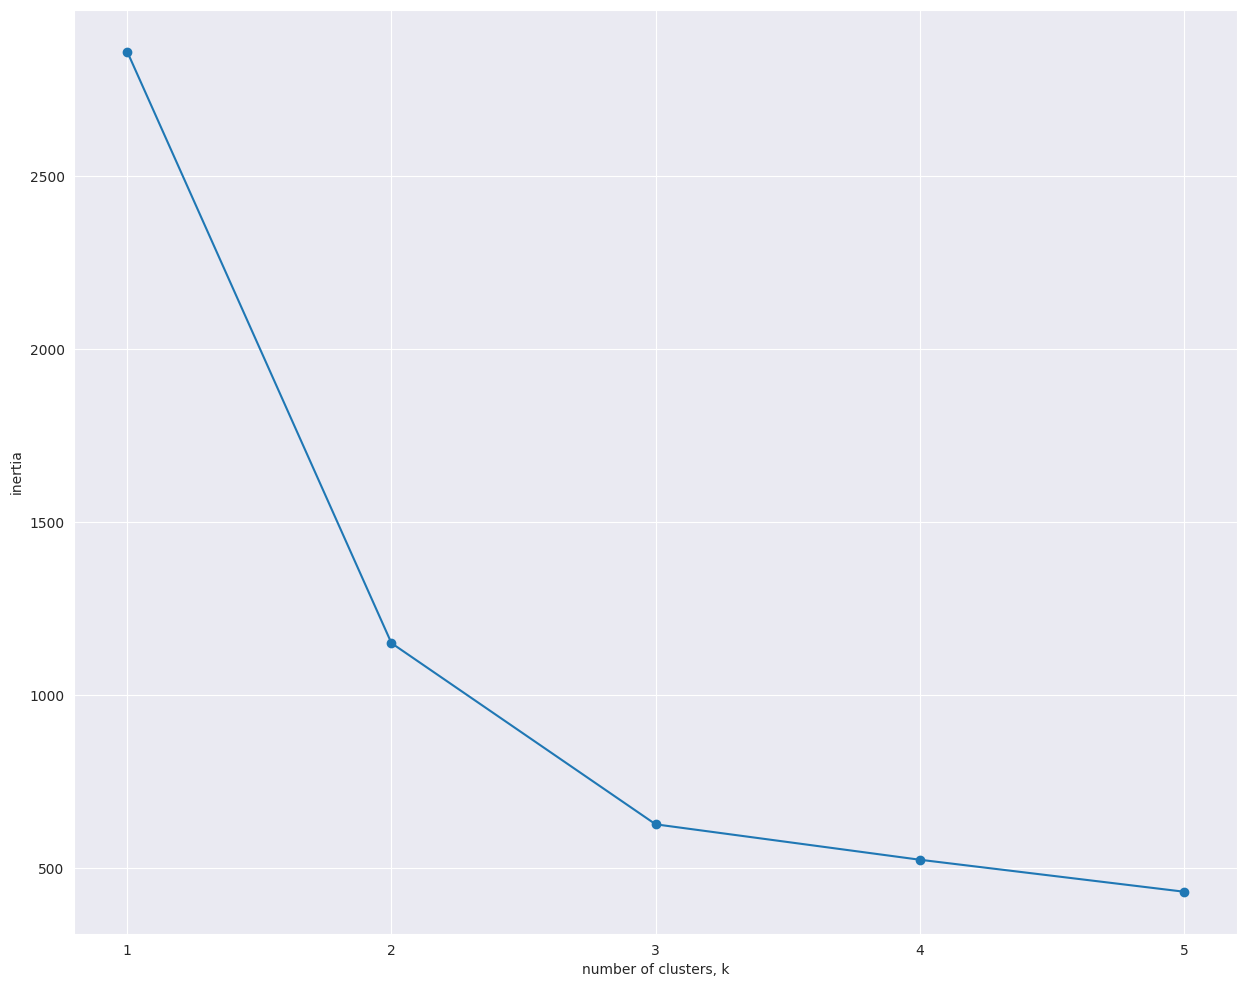

In [15]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model=KMeans(n_clusters=k, n_init='auto')

    # Fit model to samples
    model.fit(samples)

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.figure(figsize=(15,12))
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

***Excellent travail! L'inertie diminue très lentement de 3 clusters à 4, il semble donc que 3 clusters seraient un bon choix pour ces données.***

###**EXERCICES**
####**Évaluation du regroupement des grains**

+ ***Dans l'exercice précédent, vous avez observé à partir du diagramme d'inertie que 3 est un bon nombre de clusters pour les données de grain. En effet, les échantillons de céréales proviennent d'un mélange de 3 variétés de céréales différentes : « Kama », « Rosa » et « Canadian ». Dans cet exercice, regroupez les échantillons de céréales en trois grappes et comparez les grappes aux variétés de céréales à l'aide d'un tableau croisé.***

+ *Vous disposez de la gamme samplesd'échantillons de céréales et d'une liste varietiesindiquant la variété de céréales pour chaque échantillon. Pandas (pd) et KMeansont déjà été importés pour vous.*

####**Instructions**

+ Créez un modèle KMeans appelé model avec 3 clusters.
+ Utilisez la méthode .fit_predict() de model pour l'ajuster samples et dériver les étiquettes de cluster.

+ L'utilisation .fit_predict() est la même que l'utilisation .fit()suivie de .predict().

+ Créez un DataFrame dfavec deux colonnes nommées 'labels'et 'varieties', en utilisant labelset varieties, respectivement, pour les valeurs de colonne. Cela a été fait pour vous.
+ Utilisez la fonction pd.crosstab() sur df['labels'] et df['varieties']pour compter le nombre de fois où chaque variété de grain coïncide avec chaque étiquette de grappe. Affectez le résultat à ct.
+ Appuyez sur Soumettre pour voir le tableau croisé !

In [16]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3, n_init="auto")

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(samples)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'],df['varieties'])

# Display ct
ct.head()

varieties,Canadian wheat,Kama wheat,Rosa wheat
labels,,,
0,0,1,60
1,70,5,0
2,0,64,10


***Bon travail! Le tableau croisé montre que les 3 variétés de céréales se séparent très bien en 3 grappes. Mais selon le type de données avec lesquelles vous travaillez, le regroupement peut ne pas toujours être aussi bon. Y a-t-il quelque chose que vous puissiez faire dans de telles situations pour améliorer votre clustering ? Vous le saurez dans la prochaine vidéo !***


####**1. Transformer les fonctionnalités pour de meilleurs regroupements**

+ ***Regardons maintenant un autre ensemble de données, le jeu de données des vins du Piémont.***

####**2. Jeu de données sur les vins du Piémont**

+ ***Nous avons 178 échantillons de vin rouge de la région du Piémont en Italie. Les caractéristiques mesurent la composition chimique (comme la teneur en alcool) et les propriétés visuelles comme l'intensité de la couleur. Les échantillons proviennent de 3 cépages distincts.***

  + *Source : https://archive.ics.uci.edu/ml/datasets/Wine*

####**3. Mise en grappe des vins**

+ ***Prenons le tableau d'échantillons et utilisons KMeans pour trouver 3 clusters.***

####**4. Grappes vs variétés**

+ ***Il existe trois variétés de vin, alors utilisons le tableau croisé des pandas pour vérifier la correspondance entre l'étiquette du cluster et la variété de vin. Comme vous pouvez le voir, cette fois, les choses n'ont pas si bien fonctionné. Les clusters KMeans ne correspondent pas bien aux cépages.***

####**5. Écarts de fonctionnalités**

+ ***Le problème est que les caractéristiques de l'ensemble de données sur le vin ont des variances très différentes. La variance d'une caractéristique mesure la dispersion de ses valeurs.***

####**6. Écarts de fonctionnalités**

+ ***Par exemple, la caractéristique de l'acide malique a une variance plus élevée que la fonction od280, et cela peut également être vu dans leur nuage de points. Les différences dans certaines des variances de caractéristiques sont énormes, comme on le voit ici, par exemple, dans le nuage de points des caractéristiques od280 et proline.***

####**7. Détartreur standard**

+ ***Dans le clustering KMeans, la variance d'une caractéristique correspond à son influence sur l'algorithme de clustering. Pour donner une chance à chaque fonctionnalité, les données doivent être transformées afin que les fonctionnalités aient une variance égale. Ceci peut être réalisé avec le StandardScaler de scikit-learn. Il transforme chaque caractéristique pour avoir une moyenne de 0 et une variance de 1. Les caractéristiques "standardisées" résultantes peuvent être très informatives. En utilisant l'od280 et la proline standardisés, par exemple, les trois cépages sont beaucoup plus distincts.***

####**8. sklearn StandardScaler**

+ ***Voyons le StandardScaler en action. Tout d'abord, importez StandardScaler depuis sklearn.preprocessing. Créez ensuite un objet StandardScaler et adaptez-le aux échantillons. La méthode de transformation peut maintenant être utilisée pour standardiser n'importe quel échantillon, soit le même, soit un tout nouveau.***

####**9. Méthodes similaires**

+ ***Les API de StandardScaler et de KMeans sont similaires, mais il existe une différence importante. StandardScaler transforme les données, et a donc une méthode de transformation. KMeans, en revanche, attribue des étiquettes de cluster aux échantillons, et cela en utilisant la méthode de prédiction.***

####**10. StandardScaler, puis KMeans**

+ ***Revenons au problème du regroupement des vins. Nous devons effectuer deux étapes. Premièrement, pour standardiser les données à l'aide de StandardScaler, et deuxièmement pour prendre les données standardisées et les regrouper à l'aide de KMeans. Ceci peut être facilement réalisé en combinant les deux étapes à l'aide d'un pipeline scikit-learn. Les données circulent ensuite d'une étape à l'autre, automatiquement.***

####**11. Les pipelines combinent plusieurs étapes**

+ ***Les premières étapes sont les mêmes : créer un StandardScaler et un objet KMeans. Après cela, `importez la fonction make_pipeline depuis sklearn.pipeline`. Appliquez la fonction make_pipeline aux étapes que vous souhaitez composer dans ce cas, les objets scaler et kmeans. Utilisez maintenant la méthode d'ajustement du pipeline pour ajuster à la fois le scaler et les kmeans, et utilisez sa méthode de prédiction pour obtenir les étiquettes de cluster.***

####**12. La standardisation des fonctionnalités améliore le clustering**

+ ***La vérification de la correspondance entre les étiquettes des grappes et les cépages révèle que ce nouveau regroupement, intégrant la standardisation, est fantastique. Ses trois grappes correspondent presque exactement aux trois cépages. C'est une énorme amélioration par rapport au clustering sans standardisation.***

####**13. étapes de prétraitement de sklearn**

+ ***StandardScaler est un exemple d'étape de "prétraitement". Plusieurs d'entre eux sont disponibles dans scikit-learn, par exemple MaxAbsScaler et Normalizer.***

####**14. Entraînons-nous !**

+ ***Vous avez beaucoup appris cette vidéo. Maintenant, mettez-le en pratique et regroupez des ensembles de données !***

####**Mise à l'échelle des données sur les poissons pour le regroupement**

+ ***On vous donne un tableau samplesdonnant des mesures de poissons. Chaque ligne représente un poisson individuel. Les mesures, telles que le poids en grammes, la longueur en centimètres et le rapport en pourcentage de la taille à la longueur, ont des échelles très différentes. Afin de regrouper efficacement ces données, vous devez d'abord normaliser ces fonctionnalités. Dans cet exercice, vous allez créer un pipeline pour normaliser et regrouper les données.***

+ *Ces données de mesure des poissons proviennent du [Journal of Statistics Education](https://jse.amstat.org/jse_data_archive.htm) .*

####**Instructions**

+ Importer:
  + make_pipeline de sklearn.pipeline.
  + StandardScaler de sklearn.preprocessing.
  + KMeans de sklearn.cluster.
+ Créez une instance de StandardScaler appelée scaler.
+ Créez une instance de KMeansavec 4 des clusters appelés kmeans.
+ Créez un pipeline appelé pipeline qui enchaîne scaler et kmeans.
+ Pour ce faire, il vous suffit de les transmettre en tant qu'arguments à make_pipeline().

In [17]:
def create_dir_save_file(dir_path: Path, url: str):
    """
    Check if the path exists and create it if it does not.
    Check if the file exists and download it if it does not.
    """
    if not dir_path.parents[0].exists():
        dir_path.parents[0].mkdir(parents=True)
        print(f'Directory Created: {dir_path.parents[0]}')
    else:
        print('Directory Exists')

    if not dir_path.exists():
        r = requests.get(url, allow_redirects=True)
        open(dir_path, 'wb').write(r.content)
        print(f'File Created: {dir_path.name}')
    else:
        print('File Exists')



data_dir = Path('data/2021-03-29_unsupervised_learning_python')
images_dir = Path('Images/2021-03-29_unsupervised_learning_python')


# csv files
base = 'https://assets.datacamp.com/production/repositories/655/datasets'
file_fish = base + '/fee715f8cf2e7aad9308462fea5a26b791eb96c4/fish.csv'


file_links = [file_fish]
file_paths = list()

for file in file_links:
    file_name = file.split('/')[-1].replace('?raw=true', '').replace('%20', '_')
    data_path = data_dir / file_name
    create_dir_save_file(data_path, file)
    file_paths.append(data_path)

Directory Exists
File Created: fish.csv


In [18]:
# unzip the zipped files
zip_files = [v for v in file_paths if v.suffix == '.zip']
for file in zip_files:
    with ZipFile(file, 'r') as zip_:
        zip_.extractall(data_dir)
dp = [v for v in data_dir.rglob('*') if v.suffix in ['.csv', '.txt']]
dp

[PosixPath('data/2021-03-29_unsupervised_learning_python/fish.csv'),
 PosixPath('data/2021-03-29_unsupervised_learning_python/Grains/seeds-width-vs-length.csv'),
 PosixPath('data/2021-03-29_unsupervised_learning_python/Grains/seeds.csv')]

In [19]:
df = pd.read_csv('/content/data/2021-03-29_unsupervised_learning_python/fish.csv', header=None)
df.tail()

,0,1,2,3,4,5,6
80,Pike,950.0,48.3,51.7,55.1,16.2,11.2
81,Pike,1250.0,52.0,56.0,59.7,17.9,11.7
82,Pike,1600.0,56.0,60.0,64.0,15.0,9.6
83,Pike,1550.0,56.0,60.0,64.0,15.0,9.6
84,Pike,1650.0,59.0,63.4,68.0,15.9,11.0


In [20]:
samples = df.iloc[:, 1:].values
species = df.iloc[:, 0].values

In [21]:
# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=4, n_init='auto')

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,kmeans)

***Bon travail! Maintenant que vous avez construit le pipeline, vous l'utiliserez dans le prochain exercice pour regrouper les poissons en fonction de leurs mesures.***

####**Regroupement des données sur les poissons**

+ ***Vous allez maintenant utiliser votre pipeline de normalisation et de regroupement de l'exercice précédent pour regrouper les poissons en fonction de leurs mesures, puis créer un tableau croisé pour comparer les étiquettes de regroupement avec les espèces de poissons.***

+ ***Comme précédemment, samplesest le tableau 2D des mesures de poissons. Votre pipeline est disponible en tant que pipeline, et les espèces de chaque échantillon de poisson sont données par la liste species.***

####**Instructions**

+ Importer pandas au format pd.
+ Ajustez la canalisation aux mesures du poisson samples.
+ Obtenez les étiquettes de cluster pour samplesen utilisant la méthode .predict() de pipeline.
+ À l'aide de pd.DataFrame(), créez un DataFrame dfavec deux colonnes nommées 'labels'et 'species', en utilisant labels et species, respectivement, pour les valeurs de colonne.
+ À l'aide de pd.crosstab(), créez un tableau croisé ctde df['labels']et df['species'].

In [22]:
# Import pandas
import pandas as pd

# Fit the pipeline to samples
pipeline=pipeline.fit(samples)

# Calculate the cluster labels: labels
labels = pipeline.predict(samples)

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels': labels,'species': species})

# Create crosstab: ct
ct = pd.crosstab(df['labels'],df['species'])

# Display ct
ct.head()

species,Bream,Pike,Roach,Smelt
labels,,,,
0,0,5,0,0
1,0,0,17,14
2,34,0,3,0
3,0,12,0,0


***Excellent! Il semble que les données sur les poissons se séparent très bien en 4 groupes !***

####**Regroupement d'actions à l'aide de KMeans**

+ ***Dans cet exercice, vous regrouperez les entreprises en utilisant leurs mouvements quotidiens de cours des actions (c'est-à-dire la différence en dollars entre les cours de clôture et d'ouverture pour chaque jour de bourse). Vous recevez un tableau NumPy movementsdes mouvements de prix quotidiens de 2010 à 2015 (obtenu de Yahoo! Finance), où chaque ligne correspond à une entreprise et chaque colonne correspond à un jour de bourse.***

+ ***Certaines actions sont plus chères que d'autres. Pour en tenir compte, incluez un Normalizerau début de votre pipeline. Le normalisateur transformera séparément le cours de l'action de chaque société en une échelle relative avant le début du regroupement.***

+ ***Notez que Normalizer() est différent de StandardScaler(), que vous avez utilisé dans l'exercice précédent. Tandis que StandardScaler()standardise les caractéristiques (telles que les caractéristiques des données sur les poissons de l'exercice précédent) en supprimant la moyenne et en mettant à l'échelle la variance unitaire, Normalizer()redimensionne chaque échantillon - ici, le cours de l'action de chaque entreprise - indépendamment de l'autre.***

+ *KMeans et make_pipeline ont déjà été importés pour vous.*

####**Instructions**

+ Importer Normalizer depuis sklearn.preprocessing.
+ Créez une instance de Normalizer appelée normalizer.
+ Créez une instance KMeans appelé kmeans avec 10 des clusters.
+ À l'aide de make_pipeline(), créez un pipeline appelé pipeline qui enchaîne normalizer et kmeans.
+ Montez le pipeline sur le tableau movements.

In [23]:
df = pd.read_csv('company-stock-movements-2010-2015-incl.csv', index_col=0)
df.tail()

,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
Wells Fargo,0.300000,0.800000,0.08,1.009998,-0.039999,-0.290001,-0.389999,0.590000,0.490000,-0.740000,...,0.299999,0.639999,-0.040001,-0.020000,0.189999,-0.150002,-0.240001,0.220002,0.000000,-0.049999
Wal-Mart,0.489998,-0.400001,0.07,-0.120003,-0.099998,0.879997,0.730000,0.219997,-0.520001,-0.660000,...,0.790000,0.290001,-0.090004,-0.569999,0.890000,-0.279998,0.389999,-0.290001,0.979995,-0.190002
Exxon,0.430001,0.229996,0.57,-0.099999,-0.170005,0.360001,0.229996,-0.290001,0.139999,-0.540001,...,-0.170005,0.350006,-0.139999,-0.269997,0.690002,0.090004,0.439995,-0.260002,0.400001,0.480003
Xerox,0.090000,0.010000,-0.08,0.070000,-0.010000,0.160000,0.170000,0.070000,-0.020000,-0.010000,...,0.010000,0.140000,0.030000,0.050000,-0.120000,-0.200000,-0.860000,-0.030000,0.020000,-0.030000
Yahoo,0.159999,0.010001,0.00,-0.109998,0.020001,-0.030000,0.030000,0.020001,0.310002,-0.430000,...,-0.810002,-0.139999,0.260002,0.409999,-0.300003,-0.660000,-0.079998,-0.060001,0.259998,0.099998


In [24]:
movements = df.values
companies = df.index.values

In [25]:
# Import Normalizer
from sklearn.preprocessing import Normalizer

# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10, n_init='auto')

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer,kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements)


Pipeline(steps=[('normalizer', Normalizer()),
                ('kmeans', KMeans(n_clusters=10, n_init='auto'))])

***Excellent travail - vous obtenez vraiment le coup de main. Maintenant que votre pipeline a été configuré, vous pouvez découvrir quelles actions évoluent ensemble dans le prochain exercice !***

####**Quels stocks évoluent ensemble?**

+ ***Dans l'exercice précédent, vous avez regroupé les entreprises en fonction de leurs mouvements quotidiens du cours des actions. Alors, quelle entreprise a des cours boursiers qui ont tendance à changer de la même manière ? Vous allez maintenant inspecter les étiquettes de cluster de votre clustering pour le savoir.***

+ ***Votre solution à l'exercice précédent a déjà été exécutée.***
+ ***Rappelez-vous que vous avez construit un pipeline contenant pipeline un modèle KMeans et que vous l'avez adapté au tableau NumPy movementsdes mouvements de stock quotidiens. De plus, une liste des noms de sociétés companies est disponible.***

####**Instructions**

+ Importer pandas au format pd.
+ Utilisez la méthode .predict() du pipeline pour prédire les étiquettes pour movements.
+ Alignez les étiquettes de cluster avec la liste des noms de société companiesen créant un DataFrame dfavec labelset companiescomme colonnes. Cela a été fait pour vous.
+ Utilisez la méthode .sort_values() de df pour trier le DataFrame par colonne 'labels' et imprimez le résultat.
+ Cliquez sur soumettre et prenez un moment pour voir quelles entreprises sont ensemble dans chaque cluster !

In [26]:
# Import pandas
import pandas as pd

# Predict the cluster labels: labels
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
df.sort_values('labels')

,labels,companies
50,0,Taiwan Semiconductor Manufacturing
51,0,Texas instruments
10,1,ConocoPhillips
57,1,Exxon
44,1,Schlumberger
12,1,Chevron
53,1,Valero Energy
25,2,Johnson & Johnson
39,2,Pfizer
40,2,Procter Gamble



####☺**1. Visualiser les hiérarchies**

+ ***Une grande partie de votre travail en tant que data scientist consistera à communiquer vos idées à d'autres personnes.***

####**2. Les visualisations communiquent des informations**

+ ***Les visualisations sont un excellent moyen de partager vos découvertes, en particulier avec un public non technique. Dans ce chapitre, vous découvrirez deux techniques d'apprentissage non supervisé pour la visualisation : `le t-SNE et le clustering hiérarchique`. t-SNE, que nous examinerons plus tard, crée une carte 2D de n'importe quel ensemble de données et transmet des informations utiles sur la proximité des échantillons les uns par rapport aux autres. Mais d'abord, apprenons le clustering hiérarchique.***

####**3. Une hiérarchie de groupes**

+ ***Vous avez déjà vu de nombreux regroupements hiérarchiques dans le monde réel. Par exemple, les êtres vivants peuvent être organisés en petits groupes étroits, comme les humains, les singes, les serpents et les lézards, ou en groupes plus grands et plus larges comme les mammifères et les reptiles, ou même en groupes plus larges comme les animaux et les plantes. Ces groupes sont contenus les uns dans les autres et forment une hiérarchie. De manière analogue, le clustering hiérarchique organise les échantillons dans une hiérarchie de clusters.***

####**4. Ensemble de données de notation Eurovision**

+ ***Le regroupement hiérarchique peut organiser n'importe quel type de données dans une hiérarchie, pas seulement des échantillons de plantes et d'animaux. Considérons un nouveau type d'ensemble de données, décrivant comment les pays ont obtenu des performances au concours de l'Eurovision 2016. Les données sont disposées dans un tableau rectangulaire, où les rangées du tableau indiquent le nombre de points qu'un pays a donné à chaque chanson. Les "échantillons" dans ce cas sont les pays.***

  + *https://www.eurovision.tv/page/results*

####**5. Regroupement hiérarchique des pays votants**

+ ***Le résultat de l'application du regroupement hiérarchique aux scores de l'Eurovision peut être visualisé sous la forme d'un diagramme en forme d'arbre appelé « dendrogramme ». Cette image unique révèle beaucoup d'informations sur le comportement de vote des pays à l'Eurovision. Le dendrogramme regroupe les pays en grappes de plus en plus grandes, et nombre de ces grappes sont immédiatement reconnaissables comme contenant des pays géographiquement proches les uns des autres, ou qui ont des liens culturels ou politiques étroits, ou qui appartiennent à un seul groupe linguistique. Ainsi, le regroupement hiérarchique peut produire de superbes visualisations. Mais comment ça fonctionne?***

####**6. Regroupement hiérarchique**

+ ***Le clustering hiérarchique procède par étapes. Au départ, chaque pays est son propre cluster - il y a donc autant de clusters que de pays ! A chaque étape, les deux clusters les plus proches sont fusionnés. Cela diminue le nombre de clusters, et finalement, il ne reste qu'un seul cluster, et il contient tous les pays. Ce processus est en fait un type particulier de clustering hiérarchique appelé "clustering agglomératif" - il existe également un "clustering par division", qui fonctionne dans l'autre sens. Nous n'avons pas encore défini ce que cela signifie pour deux clusters d'être proches, mais nous y reviendrons plus tard.***

####**7. Le dendrogramme d'un clustering hiérarchique**

+ ***L'ensemble du processus de regroupement hiérarchique est encodé dans le dendrogramme. En bas, chaque pays est dans un cluster qui lui est propre. Le regroupement procède alors de bas en haut. Les clusters sont représentés par des lignes verticales et une jonction de lignes verticales indique une fusion de clusters. Pour mieux comprendre, zoomons***

####**8. Le dendrogramme d'un clustering hiérarchique**

+ ***et regardez juste une partie de ce dendrogramme.***

####**9. Dendrogrammes, étape par étape**

+ ***Au départ, il y a six clusters, chacun contenant un seul pays.***

####**10. Dendrogrammes, étape par étape**

+ ***La première fusion est ici, où les clusters contenant Chypre et la Grèce sont fusionnés en un seul cluster.***

####**11. Dendrogrammes, étape par étape**

+ ***Plus tard, ce nouveau cluster est fusionné avec le cluster contenant la Bulgarie.***

####**12. Dendrogrammes, étape par étape**

+ ***Peu de temps après, les clusters contenant la Moldavie et la Russie sont fusionnés,***

####**13. Dendrogrammes, étape par étape**

+ ***qui plus tard est à son tour fusionné avec le cluster contenant l'Arménie.***

####**14. Dendrogrammes, étape par étape**

+ ***Plus tard encore, les deux grands clusters composites sont fusionnés. Ce processus continue***

####**15. Dendrogrammes, étape par étape**

+ ***jusqu'à ce qu'il ne reste plus qu'un cluster, et qu'il contienne tous les pays.***

####**16. Clustering hiérarchique avec SciPy**

+ ***Nous utiliserons les fonctions de scipy pour effectuer un clustering hiérarchique sur le tableau des scores. Pour le dendrogramme, nous aurons également besoin d'une liste de noms de pays. Tout d'abord, importez les fonctions de liaison et de dendrogramme. Ensuite, appliquez la fonction de liaison au tableau d'échantillons. C'est la fonction de liaison qui effectue le regroupement hiérarchique. Notez qu'il existe un paramètre de méthode supplémentaire - nous en parlerons dans la vidéo suivante. Transmettez maintenant la sortie de la liaison à la fonction dendrogramme, en spécifiant la liste des noms de pays comme paramètre d'étiquettes. Dans la vidéo suivante, vous apprendrez à extraire des informations d'un clustering hiérarchique,***

####**17. Entraînons-nous !**

+ ***Mais pour l'instant, voyons ce que le clustering hiérarchique peut faire avec certains ensembles de données du monde réel.***

###**EXERCICES**

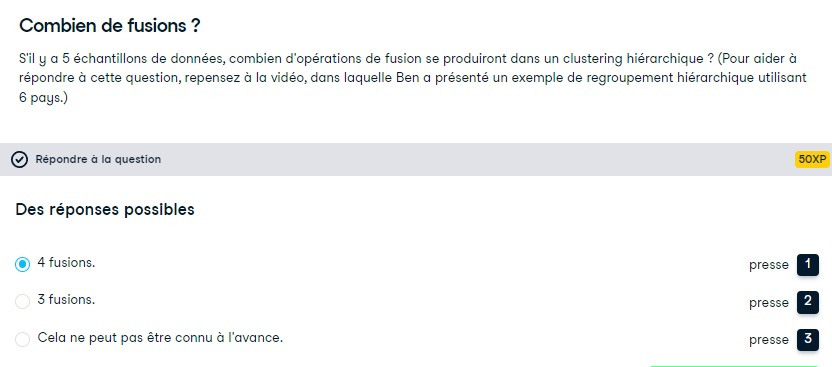

***Bien joué! Avec 5 échantillons de données, il y aurait 4 opérations de fusion, et avec 6 échantillons de données, il y aurait 5 fusions, et ainsi de suite.***

####**Regroupement hiérarchique des données de céréales**

+ ***Dans la vidéo, vous avez appris que `la fonction SciPy linkage()`effectue un regroupement hiérarchique sur un tableau d'échantillons.***
+ ***Utilisez la fonction `linkage()` pour obtenir un regroupement hiérarchique des échantillons de grains et utilisez `dendrogram()` pour visualiser le résultat. Un échantillon des mesures de grain est fourni dans le tableau samples, tandis que la variété de chaque échantillon de grain est donnée par la liste varieties.***

####**Instructions**

+ Importer:
  + linkage et dendrogram de scipy.cluster.hierarchy.
  + matplotlib.pyplot comme plt.

+ Effectuez un clustering hiérarchique lors de l'utilisation samples de la fonction linkage() avec l'argument `method='complete'`de mot-clé. Affectez le résultat à mergings.
+ Tracez un dendrogramme en utilisant la fonction `dendrogram()` sur mergings.
+ Spécifiez les arguments de mots-clés labels=varieties, leaf_rotation=90 et leaf_font_size=6.

In [31]:
df = pd.read_csv('/content/data/2021-03-29_unsupervised_learning_python/Grains/seeds.csv', header=None)
df['varieties'] = df[7].map({1: 'Kama wheat', 2: 'Rosa wheat', 3: 'Canadian wheat'})
df.tail()

,0,1,2,3,4,5,6,7,varieties
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3,Canadian wheat
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3,Canadian wheat
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3,Canadian wheat
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3,Canadian wheat
209,12.30,13.34,0.8684,5.243,2.974,5.637,5.063,3,Canadian wheat


In [32]:
samples = df.iloc[:, :-1].values
varieties = df.iloc[:, -1].values

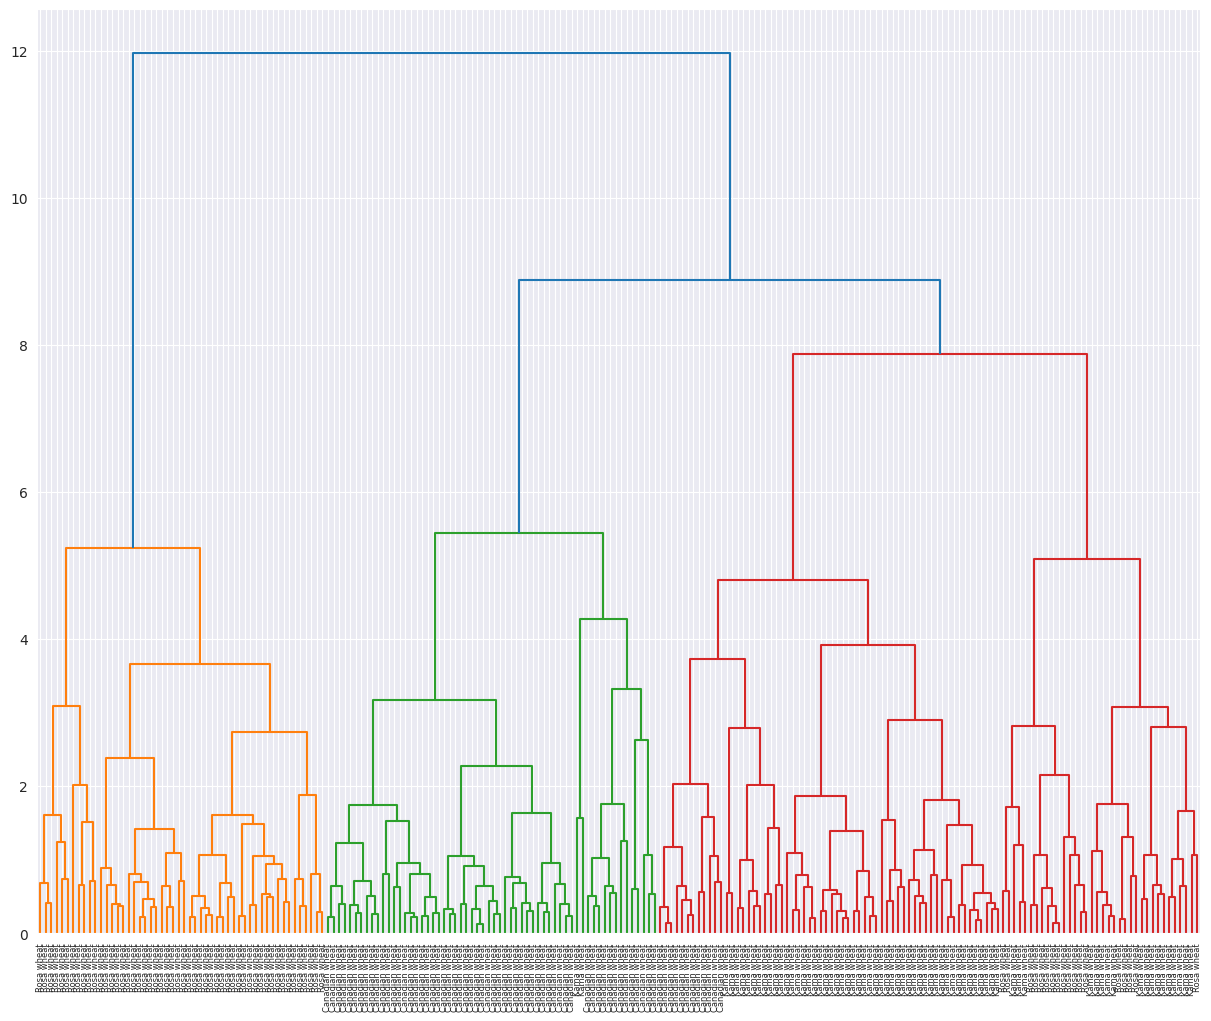

In [34]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(samples,method='complete')

# Plot the dendrogram, using varieties as labels
plt.figure(figsize=(15,12))
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

***Superbe! Les dendrogrammes sont un excellent moyen d'illustrer l'arrangement des clusters produits par le clustering hiérarchique.***

####**Hiérarchies des actions**

+ ***Au chapitre 1, vous avez utilisé le clustering k-means pour regrouper les entreprises en fonction de leurs mouvements de cours boursiers. Vous allez maintenant effectuer un regroupement hiérarchique des entreprises. Vous recevez un tableau NumPy de mouvements de prix movements, où les lignes correspondent aux entreprises, et une liste des noms d'entreprises companies. Le clustering hiérarchique SciPy ne rentre pas dans un pipeline sklearn, vous devrez donc utiliser la fonction normalize() from sklearn.preprocessingau lieu de Normalizer.***

+ *linkage et dendrogramont déjà été importés depuis scipy.cluster.hierarchy, et PyPlot a été importé en tant que plt.*

####**Instructions**

+ Importer normalize depuis sklearn.preprocessing.
+ Remettez à l'échelle les mouvements de prix pour chaque action en utilisant la fonction normalize() sur movements.
+ Appliquez la fonction linkage() à normalized_movements, en utilisant 'complete'la liaison, pour calculer le regroupement hiérarchique.
+ Affectez le résultat à mergings.
+ Tracez un dendrogramme du regroupement hiérarchique, en utilisant la liste companiesdes noms de sociétés comme labels.
+ De plus, spécifiez les arguments leaf_rotation=90, et leaf_font_size=6 mot-clé comme vous l'avez fait dans l'exercice précédent

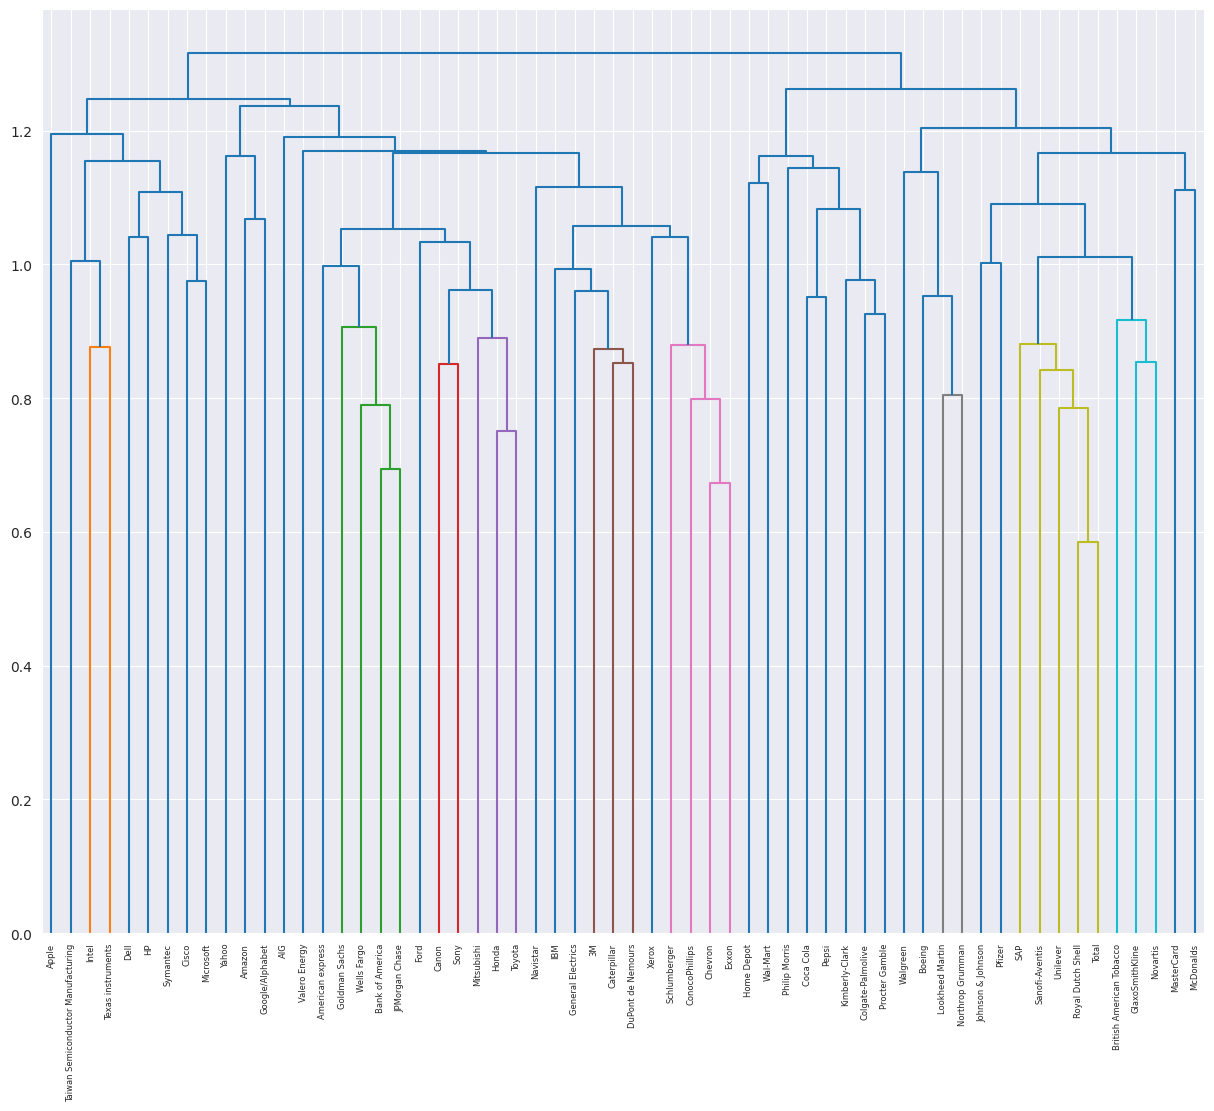

In [35]:
# Import normalize
from sklearn.preprocessing import normalize

# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements,method='complete')

# Plot the dendrogram
plt.figure(figsize=(15,12))
dendrogram(mergings,
            labels=companies,
            leaf_rotation=90,
            leaf_font_size=6,
)
plt.show()

***Bon travail! Vous pouvez produire de superbes visualisations comme celle-ci avec le clustering hiérarchique, mais il peut être utilisé pour plus que de simples visualisations. Vous en saurez plus à ce sujet dans la prochaine vidéo !***

####**1. Étiquettes de cluster dans le clustering hiérarchique**

+ ***Dans la vidéo précédente, nous avons utilisé le clustering hiérarchique***

####**2. Étiquettes de cluster dans le clustering hiérarchique**

+ ***pour créer une grande visualisation du comportement de vote à l'Eurovision. Mais le clustering hiérarchique n'est pas seulement un outil de visualisation. Dans cette vidéo, vous apprendrez à extraire les clusters des étapes intermédiaires d'un clustering hiérarchique. Les étiquettes de cluster pour ces regroupements intermédiaires peuvent ensuite être utilisées dans d'autres calculs, tels que des tableaux croisés, tout comme les étiquettes de cluster de k-means.***

####**3. Regroupements intermédiaires et hauteur sur le dendrogramme**

+ ***Une étape intermédiaire dans le regroupement hiérarchique est spécifiée en choisissant une hauteur sur le dendrogramme. Par exemple, choisir une hauteur de 15 définit un cluster dans lequel la Bulgarie, Chypre et la Grèce sont dans un cluster, la Russie et la Moldavie sont dans un autre, et l'Arménie est dans un cluster à part entière. Mais quelle est la signification de la hauteur ?***

####**4. Les dendrogrammes montrent les distances des clusters**

+ ***L'axe $y$ du dendrogramme encode la distance entre les clusters fusionnés. Par exemple, la distance entre le cluster contenant Chypre et le cluster contenant la Grèce était d'environ 6 lorsqu'ils ont été fusionnés en un seul cluster.***

####**5. Les dendrogrammes montrent les distances des clusters**

+ Lorsque ce nouveau cluster a été fusionné avec le cluster contenant la Bulgarie, la distance entre eux était de 12.

####**6. Regroupements intermédiaires et hauteur sur le dendrogramme**

+ ***Ainsi la hauteur qui spécifie un clustering intermédiaire correspond à une distance. Cela spécifie que le clustering hiérarchique doit arrêter de fusionner les clusters lorsque tous les clusters sont au moins aussi éloignés l'un de l'autre.***

####**7. Distance entre les grappes**

+ ***La distance entre deux clusters est mesurée à l'aide d'une « méthode de liaison ». Dans notre exemple, nous avons utilisé un couplage "complet", où la distance entre deux grappes est le maximum des distances entre leurs échantillons. Ceci a été spécifié via le paramètre "method". Il existe de nombreuses autres méthodes de liaison, et vous verrez dans les exercices que différentes méthodes de liaison donnent différents regroupements hiérarchiques !***

####**8. Extraction des étiquettes de cluster**

+ ***Les étiquettes de cluster pour toute étape intermédiaire du clustering hiérarchique peuvent être extraites à l'aide de la fonction fcluster. Essayons-le, en spécifiant la hauteur de 15.***

####**9. Extraction des étiquettes de cluster à l'aide de fcluster**

+ ***Après avoir effectué le regroupement hiérarchique des données Eurovision, importez la fonction fcluster. Passez ensuite le résultat de la fonction de liaison à la fonction fcluster, en spécifiant la hauteur comme deuxième argument. Cela renvoie un tableau numpy contenant les étiquettes de cluster pour tous les pays.***

####**10. Aligner les étiquettes des clusters sur les noms de pays**

+ ***Pour inspecter les étiquettes de cluster, utilisons un DataFrame pour aligner les étiquettes avec les noms de pays. Tout d'abord, importez des pandas, puis créez le bloc de données, puis triez par étiquette de cluster, en imprimant le résultat. Comme prévu, les étiquettes de cluster regroupent la Bulgarie, la Grèce et Chypre dans le même cluster. Mais notez que les étiquettes de cluster scipy commencent à 1, et non à 0 comme elles le font dans scikit-learn.***

####**11. Entraînons-nous !**

+ ***Maintenant que vous avez appris à extraire des étiquettes de cluster à partir d'un clustering hiérarchique, mettons vos nouvelles compétences en pratique !***

###**EXERCICES**

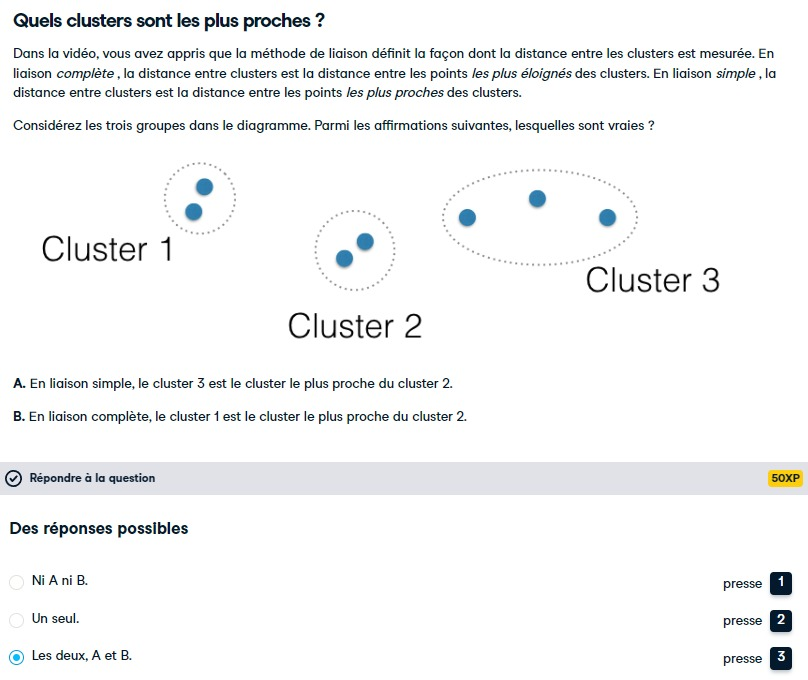

####**Liaison différente, clustering hiérarchique différent !**

+ ***Dans la vidéo, vous avez vu un regroupement hiérarchique des pays votants au concours Eurovision de la chanson en utilisant 'complete'la liaison. Maintenant, effectuez un regroupement hiérarchique des pays votants avec 'single'lien et comparez le dendrogramme résultant avec celui de la vidéo. Liaison différente, clustering hiérarchique différent !***

+ ***Un tableau vous est donné samples. Chaque ligne correspond à un pays votant et chaque colonne correspond à une performance pour laquelle on a voté. La liste country_names donne le nom de chaque pays votant. Cet ensemble de données a été obtenu auprès de l'Eurovision .***

####**Instructions***

+ Importer linkage et dendrogram depuis scipy.cluster.hierarchy.
+ Effectuez un clustering hiérarchique lors de samplesl'utilisation de la fonction linkage() avec l'argument method='single' de mot-clé. Affectez le résultat à mergings.
+ Tracez un dendrogramme du regroupement hiérarchique, en utilisant la liste country_names comme labels.
+ De plus, spécifiez les arguments leaf_rotation=90, et mot-clé leaf_font_size=6  comme vous l'avez fait précédemment.

In [37]:
df = pd.read_csv('eurovision-2016.csv')
df.tail()

,From country,To country,Jury A,Jury B,Jury C,Jury D,Jury E,Jury Rank,Televote Rank,Jury Points,Televote Points
1061,United Kingdom,Ukraine,11,1,1,1,5,2,6,10.0,5.0
1062,United Kingdom,Malta,18,13,8,17,4,12,15,NaN,NaN
1063,United Kingdom,Georgia,2,2,3,2,1,1,19,12.0,NaN
1064,United Kingdom,Austria,23,15,12,18,13,17,13,NaN,NaN
1065,United Kingdom,Armenia,15,22,7,24,18,20,18,NaN,NaN


In [38]:
samples = df.iloc[:, 2:7].values[:42]
country_names = df.iloc[:, 1].values[:42]

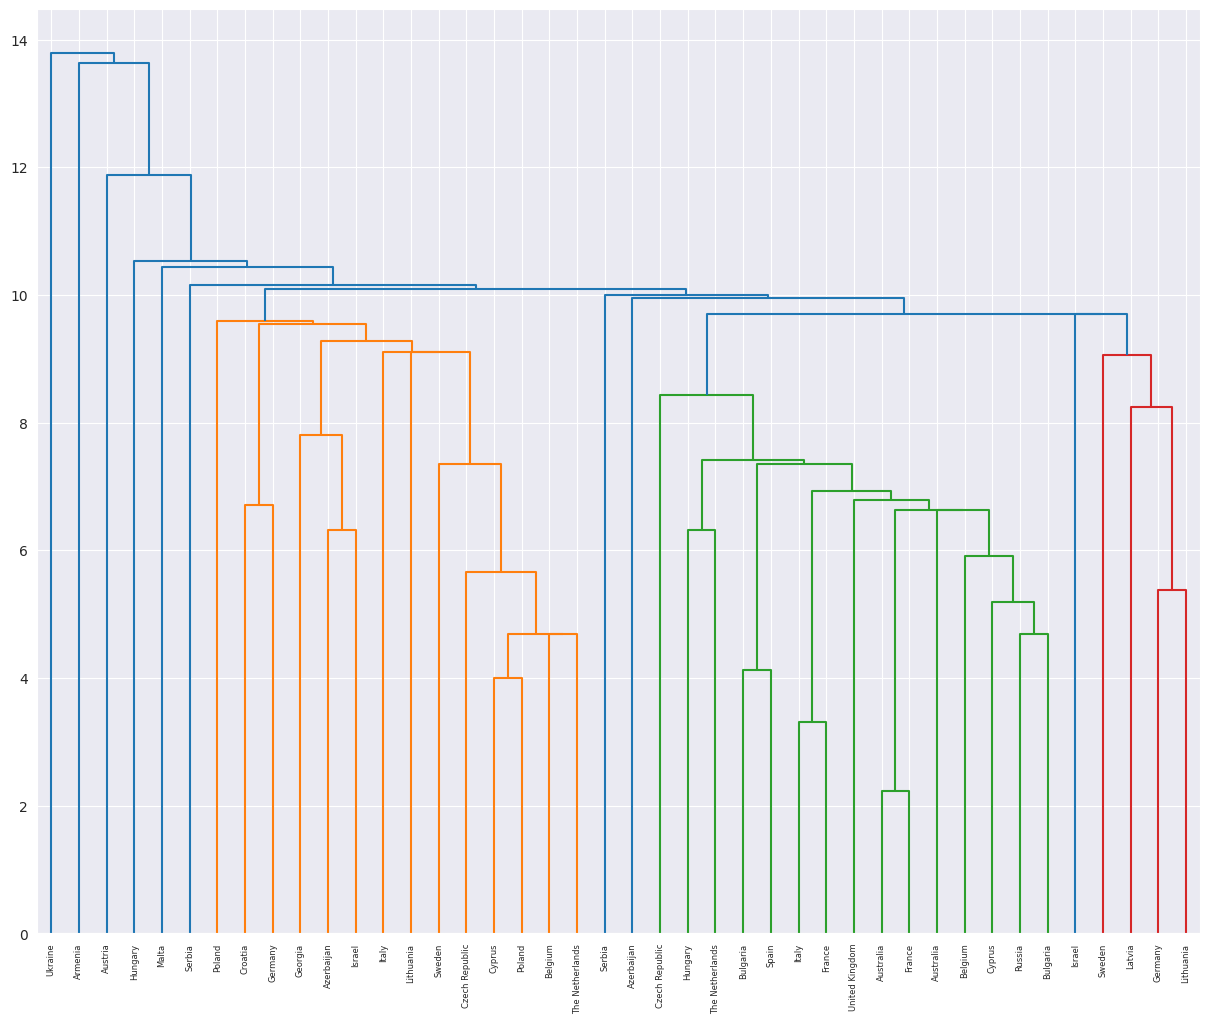

In [39]:
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate the linkage: mergings
mergings = linkage(samples,method='single')

# Plot the dendrogram
plt.figure(figsize=(15,12))
dendrogram(mergings,
            labels=country_names,
            leaf_rotation=90,
            leaf_font_size=6,

)
plt.show()


***Bon travail! Comme vous pouvez le voir, effectuer un clustering hiérarchique à liaison unique produit un dendrogramme différent !***

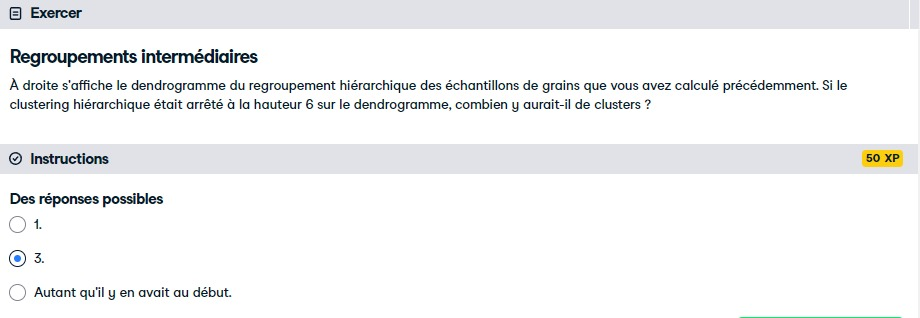

***Exactement - excellent travail !***

####**Extraction des étiquettes de cluster**

+ ***Dans l'exercice précédent, vous avez vu que le regroupement intermédiaire des échantillons de grains à la hauteur 6 comporte 3 grappes. Maintenant, utilisez la fonction fcluster() pour extraire les étiquettes de cluster pour ce clustering intermédiaire et comparez les étiquettes avec les variétés de céréales à l'aide d'un tableau croisé.***

+ ***Le regroupement hiérarchique a déjà été effectué et mergingsest le résultat de la fonction linkage(). La liste varietiesdonne la variété de chaque échantillon de grain.****

####**Instructions**

+ Importer:
  + pandas comme pd.
  + fcluster de scipy.cluster.hierarchy.
  + Effectuez un regroupement hiérarchique plat à l'aide de la fcluster()fonction sur mergings.
  + Spécifiez une hauteur maximale de 6 et l'argument du mot-clé criterion='distance'.
  + Créez un DataFrame dfavec deux colonnes nommées 'labels'et 'varieties', en utilisant labelset varieties, respectivement, pour les valeurs de colonne. Cela a été fait pour vous.

+ Créez un tableau croisé ctentre df['labels']et df['varieties']pour compter le nombre de fois que chaque variété de grain coïncide avec chaque étiquette de grappe.

In [51]:
df = pd.read_csv('/content/data/2021-03-29_unsupervised_learning_python/Grains/seeds.csv', header=None)
df['varieties'] = df[7].map({1: 'Kama wheat', 2: 'Rosa wheat', 3: 'Canadian wheat'})
df.tail()

,0,1,2,3,4,5,6,7,varieties
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3,Canadian wheat
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3,Canadian wheat
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3,Canadian wheat
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3,Canadian wheat
209,12.30,13.34,0.8684,5.243,2.974,5.637,5.063,3,Canadian wheat


In [52]:
samples = df.iloc[:, :-1].values
varieties = df.iloc[:, -1].values

In [53]:
# Perform the necessary imports
import pandas as pd
from scipy.cluster.hierarchy import fcluster

mergings = linkage(samples, method='complete')

# Use fcluster to extract labels: labels
labels = fcluster(mergings, 6, criterion='distance')

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)

varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
1                       0           0          52
2                      58           2           0
3                      12          50           0
4                       0          18          18


***Fantastique - vous avez maintenant maîtrisé les principes fondamentaux de k-Means et du clustering hiérarchique agglomératif. Ensuite, vous découvrirez t-SNE, qui est un outil puissant pour visualiser des données de grande dimension.***


####**1. t-SNE pour les cartes en 2 dimensions**

+ ***Dans cette vidéo, vous découvrirez une méthode d'apprentissage non supervisée pour la visualisation appelée "t-SNE".***

####**2. t-SNE pour les cartes en 2 dimensions**

+ ***t-SNE signifie "intégration de voisins stochastiques distribués en t". Il a un nom compliqué, mais il sert un objectif très simple. Il cartographie les échantillons de leur espace à haute dimension dans un espace à 2 ou 3 dimensions afin qu'ils puissent être visualisés. Bien qu'une certaine distorsion soit inévitable, t-SNE fait un excellent travail en représentant approximativement les distances entre les échantillons. Pour cette raison, t-SNE est une aide visuelle inestimable pour comprendre un ensemble de données.***

####**3. t-SNE sur l'ensemble de données de l'iris**

+ ***Pour voir quels types d'informations sont possibles avec t-SNE, examinons ses performances sur l'ensemble de données de l'iris. Les échantillons d'iris se trouvent dans un espace à quatre dimensions, où chaque dimension correspond à l'une des quatre mesures de l'iris, telles que la longueur et la largeur des pétales. Maintenant, t-SNE n'a reçu que les mesures des échantillons d'iris. En particulier, aucune information n'a été donnée sur les trois espèces d'iris. Mais si nous colorons les espèces différemment sur le nuage de points, nous voyons que t-SNE a gardé les espèces séparées.***

####**4. Interprétation des nuages ​​de points t-SNE**

+ ***Ce nuage de points nous donne cependant un nouvel aperçu. Nous apprenons qu'il existe deux espèces d'iris, versicolor et virginica, dont les échantillons sont rapprochés dans l'espace. Il peut donc arriver que l'ensemble de données de l'iris semble avoir deux clusters, au lieu de trois. Ceci est compatible avec nos exemples précédents utilisant k-means, où nous avons vu qu'un clustering avec 2 clusters avait également une inertie relativement faible, ce qui signifie des clusters serrés.***

####**5. t-SNE dans sklearn**

+ ***t-SNE est disponible dans scikit-learn, mais il fonctionne un peu différemment des composants fit/transform que vous avez déjà rencontrés. Voyons-le en action sur le jeu de données iris. Les échantillons sont dans un tableau numpy à 2 dimensions, et il y a une liste donnant les espèces de chaque échantillon.***

####**6. t-SNE dans sklearn**

+ ***Pour commencer, importez TSNE et créez un objet TSNE. Appliquez la méthode fit_transform aux échantillons, puis créez un nuage de points du résultat, en colorant les points à l'aide de l'espèce. Deux aspects méritent une attention particulière : la méthode fit_transform et le taux d'apprentissage.***

####**7. t-SNE n'a que fit_transform()**

+ ***t-SNE n'a qu'une méthode fit_transform. Comme vous pouvez vous y attendre, la méthode fit_transform ajuste simultanément le modèle et transforme les données. Cependant, t-SNE n'a pas de méthodes d'ajustement et de transformation distinctes. Cela signifie que vous ne pouvez pas étendre une carte t-SNE pour inclure de nouveaux échantillons. Au lieu de cela, vous devez recommencer à chaque fois.***

####**8. Taux d'apprentissage t-SNE**

+ ***La deuxième chose à remarquer est le taux d'apprentissage. Le taux d'apprentissage rend l'utilisation de t-SNE plus compliquée que certaines autres techniques. Vous devrez peut-être essayer différents taux d'apprentissage pour différents ensembles de données. Il est cependant clair que vous avez fait un mauvais choix, car tous les échantillons apparaissent regroupés dans le nuage de points. Normalement, il suffit d'essayer quelques valeurs entre 50 et 200.***

####**9. Différent à chaque fois**

+ ***Une dernière chose à savoir est que les axes d'un tracé t-SNE n'ont aucune signification interprétable. En fait, ils sont différents chaque fois que t-SNE est appliqué, même sur les mêmes données. Par exemple, voici trois parcelles t-SNE des échantillons de vin du Piémont mis à l'échelle, générés à l'aide du même code. A noter que si l'orientation de la parcelle est à chaque fois différente, les trois cépages, représentés ici par des couleurs, ont la même position les uns par rapport aux autres.***

####**10. Entraînons-nous !**

+ ***Vous êtes maintenant équipé pour utiliser t-SNE pour avoir un aperçu de certains ensembles de données du monde réel. Entraînons-nous !***

###**EXERCICES**

#####**Visualisation t-SNE du jeu de données sur les grains**

+ ***Dans la vidéo, vous avez vu t-SNE appliqué à l'ensemble de données de l'iris. Dans cet exercice, vous allez appliquer t-SNE aux données d'échantillons de grain et inspecter les entités t-SNE résultantes à l'aide d'un nuage de points. Vous recevez une gamme samples d'échantillons de grains et une liste variety_numbers indiquant le numéro de variété de chaque échantillon de grain.***

####**Instructions**

+ Importer TSNE depuis sklearn.manifold.
+ Créez une instance TSNE appelée modelavec learning_rate=200.
+ Appliquez la méthode .fit_transform() de modelà samples.
+ Affectez le résultat à tsne_features.
+ Sélectionnez la colonne 0 de tsne_features. Affectez le résultat à xs.
+ Sélectionnez la colonne 1 de tsne_features. Affectez le résultat à ys.
+ Faites un nuage de points des caractéristiques t-SNE xs et ys.
+ Pour colorer les points par variété de grain, spécifiez l'argument mot-clé supplémentaire c=variety_numbers.

In [58]:
df = pd.read_csv('/content/data/2021-03-29_unsupervised_learning_python/Grains/seeds.csv', header=None)

samples = df.iloc[:, :-1].values
variety_numbers = df.iloc[:, -1].values

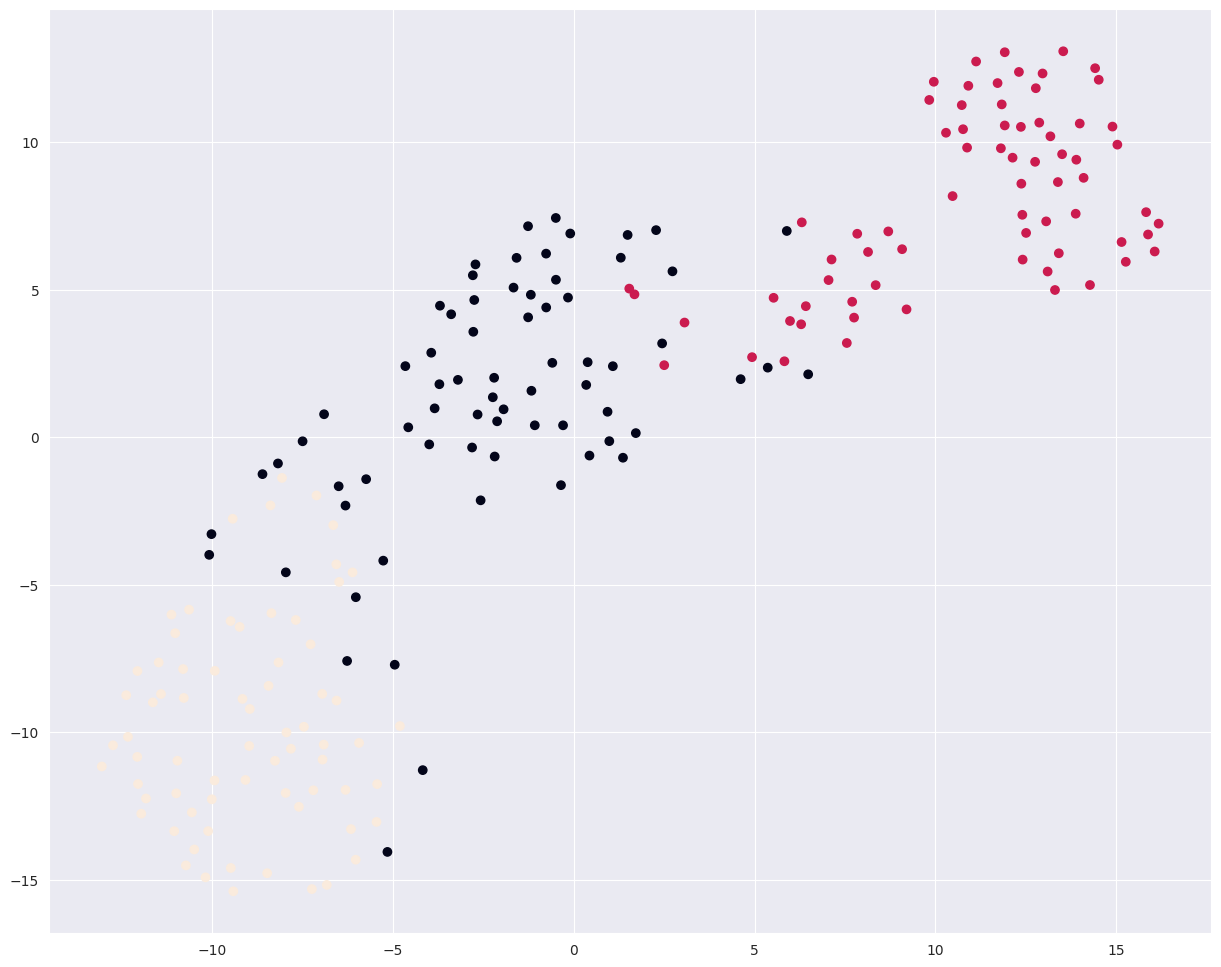

In [59]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(samples)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.figure(figsize=(15,12))
plt.scatter(xs,ys,c=variety_numbers)
plt.show()

***Excellent! Comme vous pouvez le voir, la visualisation t-SNE parvient à séparer les 3 variétés d'échantillons de grains. Mais comment cela fonctionnera-t-il sur les données boursières ? Vous le découvrirez dans le prochain exercice !***

####**Une carte t-SNE du marché boursier**

+ ***t-SNE fournit d'excellentes visualisations lorsque les échantillons individuels peuvent être étiquetés. Dans cet exercice, vous appliquerez t-SNE aux données sur le cours des actions de la société. Un nuage de points des caractéristiques t-SNE résultantes, étiquetées par les noms de sociétés, vous donne une carte du marché boursier ! Les mouvements du cours des actions pour chaque société sont disponibles sous forme de tableau normalized_movements(ils ont déjà été normalisés pour vous). La liste companiesdonne le nom de chaque entreprise. PyPlot (plt) a été importé pour vous.***

####**Instructions**

+ Importer TSNE depuis sklearn.manifold.
+ Créez une instance TSNE appelée model avec learning_rate=50.
+ Appliquez la méthode .fit_transform() de model à normalized_movements. Affectez le résultat à tsne_features.
+ Sélectionnez la colonne 0 et la colonne 1 de tsne_features.
+ Faites un nuage de points des caractéristiques t-SNE xs et ys.
+ Spécifiez l'argument de mot clé supplémentaire alpha=0.5.
+ Le code pour étiqueter chaque point avec le nom de sa société a été écrit pour vous à l'aide de plt.annotate(), alors cliquez simplement sur Soumettre pour voir la visualisation !

In [60]:
df = pd.read_csv('company-stock-movements-2010-2015-incl.csv', index_col=0)
movements = df.values
companies = df.index.values
normalized_movements = normalize(movements)

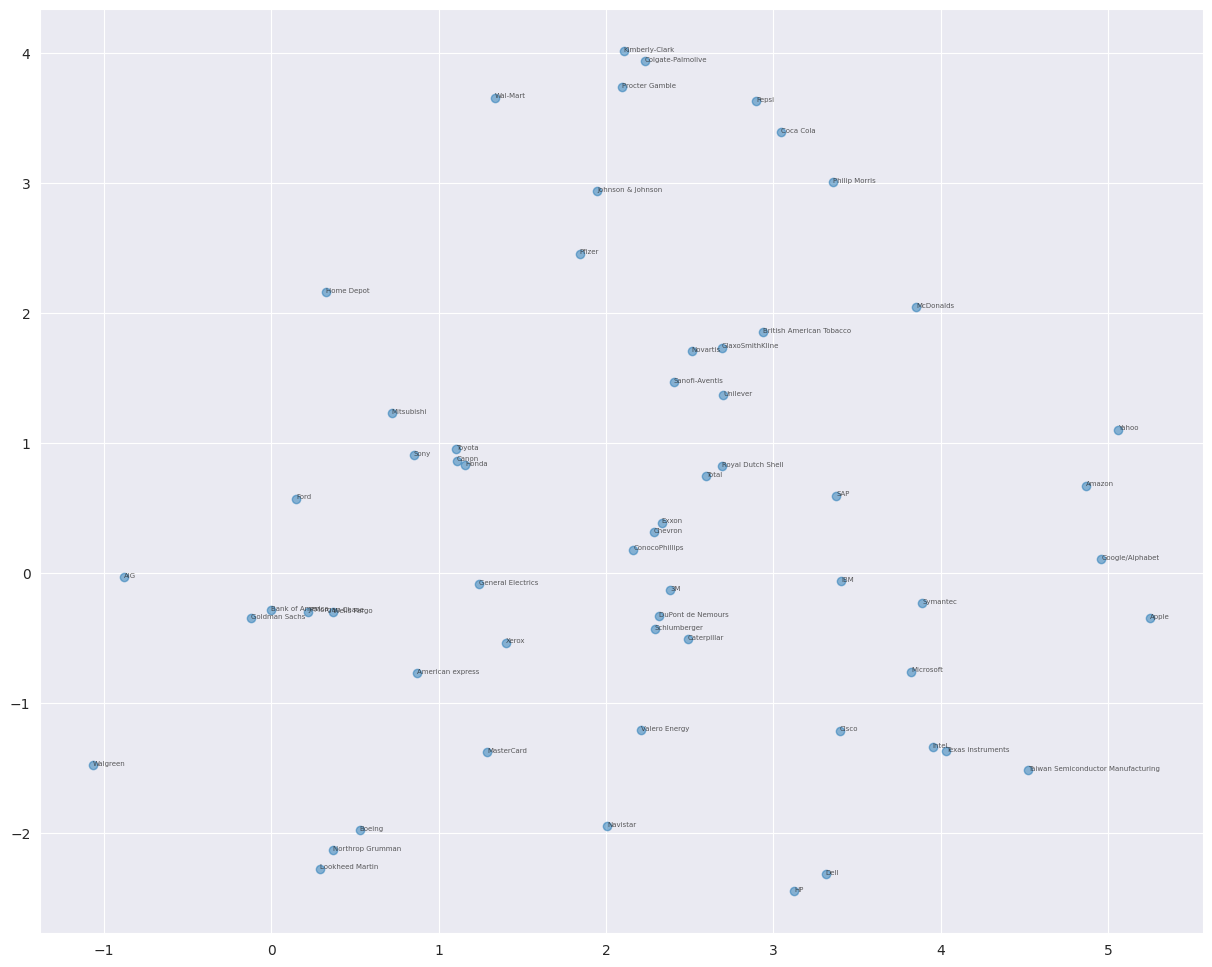

In [61]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=50)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.figure(figsize=(15,12))
plt.scatter(xs,ys,alpha=0.5)

# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=5, alpha=0.75)
plt.show()

***Fantastique! Ce sont des visualisations comme celle-ci qui font de t-SNE un outil si puissant pour extraire rapidement des informations à partir de données de grande dimension.***


####**1. Visualiser la transformation PCA**

+ ***Dans les deux prochains chapitres, vous apprendrez des techniques de réduction de dimension.***

####**2. Réduction dimensionnelle**

+ ***La réduction de dimension trouve des modèles dans les données et utilise ces modèles pour les réexprimer sous une forme compressée. Cela rend le calcul ultérieur avec les données beaucoup plus efficace, et cela peut être un gros problème dans un monde de grands ensembles de données. Cependant, la fonction la plus importante de la réduction de dimension est de réduire un ensemble de données à ses "éléments nus", en éliminant les caractéristiques bruyantes qui causent de gros problèmes pour les tâches d'apprentissage supervisé comme la régression et la classification. Dans de nombreuses applications du monde réel, c'est la réduction de dimension qui rend la prédiction possible.***

####**3. Analyse en composantes principales**

+ ***Dans ce chapitre, vous découvrirez les techniques de réduction de dimension les plus fondamentales. C'est ce qu'on appelle "l'analyse en composantes principales", ou "PCA" en abrégé. L'ACP effectue une réduction de dimension en deux étapes, et la première, appelée "décorrélation", ne modifie pas du tout la dimension des données. C'est sur cette première étape que nous allons nous concentrer dans cette vidéo.***

####**4. PCA aligne les données avec les axes**

+ ***Dans cette première étape, PCA fait tourner les échantillons afin qu'ils soient alignés avec les axes de coordonnées. En fait, il fait plus que cela : l'ACP décale également les échantillons pour qu'ils aient une moyenne nulle. Ces diagrammes de dispersion montrent l'effet de l'ACP appliqué à deux caractéristiques de l'ensemble de données sur le vin. Notez qu'aucune information n'est perdue - cela est vrai quel que soit le nombre de fonctionnalités de votre jeu de données. Vous vous entraînerez à visualiser cette transformation dans les exercices.***

####**5. L'ACP suit le modèle d'ajustement/transformation**

+ ***scikit-learn a une implémentation de PCA, et il a des méthodes d'ajustement et de transformation tout comme StandardScaler. La méthode d'ajustement apprend à décaler et à faire pivoter les échantillons, mais ne les modifie pas réellement. La méthode de transformation, quant à elle, applique la transformation qui correspond à l'apprentissage. En particulier, la méthode de transformation peut être appliquée à de nouveaux échantillons non vus.***

####**6. Utilisation de l'ACP scikit-learn**

+ ***Voyons PCA en action sur certaines fonctionnalités du jeu de données wine. Tout d'abord, importez PCA. Créez maintenant un objet PCA et adaptez-le aux échantillons. Utilisez ensuite l'objet fit PCA pour transformer les échantillons. Cela renvoie un nouveau tableau d'échantillons transformés.***

####**7. Caractéristiques de l'ACP**

+ ***Ce nouveau tableau a le même nombre de lignes et de colonnes que l'exemple de tableau d'origine. En particulier, il y a une ligne pour chaque échantillon transformé. Les colonnes du nouveau tableau correspondent aux "caractéristiques PCA", tout comme les caractéristiques d'origine correspondaient aux colonnes du tableau d'origine.***

####**8. Les caractéristiques PCA ne sont pas corrélées**

+ ***Il arrive souvent que les caractéristiques d'un ensemble de données soient corrélées. C'est le cas de nombreuses fonctionnalités de l'ensemble de données sur le vin, par exemple. Cependant, PCA, du fait de la rotation qu'elle effectue, "décorrèle" les données, dans le sens où les colonnes du tableau transformé ne sont pas linéairement corrélées.***

####**9. Corrélation de Pearson**

+ ***La corrélation linéaire peut être mesurée avec la corrélation de Pearson. Il prend des valeurs comprises entre -1 et 1, où des valeurs plus élevées indiquent une corrélation plus forte, et 0 indique aucune corrélation linéaire. Voici quelques exemples de caractéristiques avec différents degrés de corrélation.***

####**10. Principaux composants**

+ ***Enfin, l'ACP est appelée "analyse en composantes principales" car elle apprend les "composantes principales" des données. Ce sont les directions dans lesquelles les échantillons varient le plus, représentées ici en rouge. Ce sont les composants principaux que PCA aligne avec les axes de coordonnées.***

####**11. Principaux composants**

+ ***Une fois qu'un modèle PCA a été ajusté, les composants principaux sont disponibles en tant qu'attribut composants. Il s'agit d'un tableau numpy avec une ligne pour chaque composant principal.***

####**12. Entraînons-nous !**

+ ***Vous avez rencontré plusieurs nouvelles idées dans cette vidéo. Mettons-les en pratique !***

###**EXERCICES**

####**Données corrélées dans la nature**
+ ***On vous donne un tableau grainsdonnant la largeur et la longueur des échantillons de grain. Vous soupçonnez que la largeur et la longueur seront corrélées. Pour le confirmer, faites un nuage de points de la largeur par rapport à la longueur et mesurez leur corrélation de Pearson.***

####**Instructions**

+ Importer:
  + matplotlib.pyplot comme plt.
  + pearsonr de scipy.stats.
+ Attribuez la colonne 0 de grains à width et la colonne 1 de grains à length.
+ Faites un nuage de points avec widthsur l'axe des $x$ et lengthsur l'axe des $y$.
+ Utilisez la fonction pearsonr() pour calculer la corrélation de Pearson de widthet length.

In [67]:
df = pd.read_csv('/content/data/2021-03-29_unsupervised_learning_python/Grains/seeds-width-vs-length.csv', header=None)
df.tail()

,0,1
205,2.981,5.137
206,2.795,5.140
207,3.232,5.236
208,2.836,5.175
209,2.974,5.243


In [68]:
grains = df.values

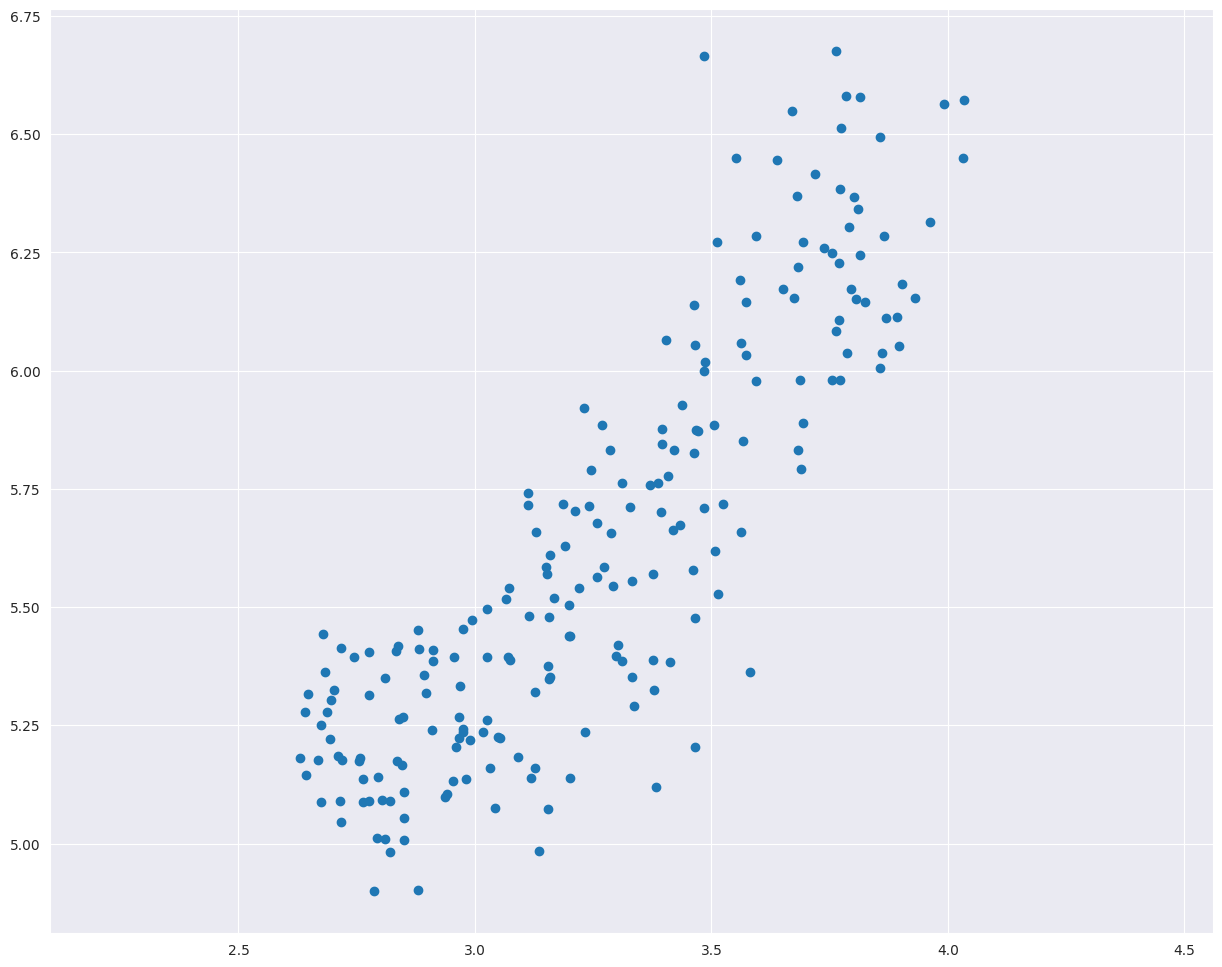

In [72]:
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Assign the 0th column of grains: width
width = grains[:,0]

# Assign the 1st column of grains: length
length = grains[:,1]

# Scatter plot width vs length
plt.figure(figsize=(15,12))
plt.scatter(width, length)
plt.axis('equal')
plt.show()

In [73]:
# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width,length)

# Display the correlation
print(correlation)

0.8604149377143469


####**Décorrélation des mesures de grains avec PCA**

+ ***Vous avez observé dans l'exercice précédent que les mesures de largeur et de longueur du grain sont corrélées. Maintenant, vous allez utiliser l'ACP pour décorréler ces mesures, puis tracer les points décorrélés et mesurer leur corrélation de Pearson.***

####**Instructions**

+ Importer PCA depuis sklearn.decomposition.
+ Créez une instance de PCA appelée model.
+ Utilisez la méthode .fit_transform() de model pour appliquer la transformation PCA à grains. Affectez le résultat à pca_features.
+ Le code suivant pour extraire, tracer et calculer la corrélation de Pearson des deux premières colonnes pca_featuresa été écrit pour vous, alors cliquez sur Soumettre pour voir le résultat !

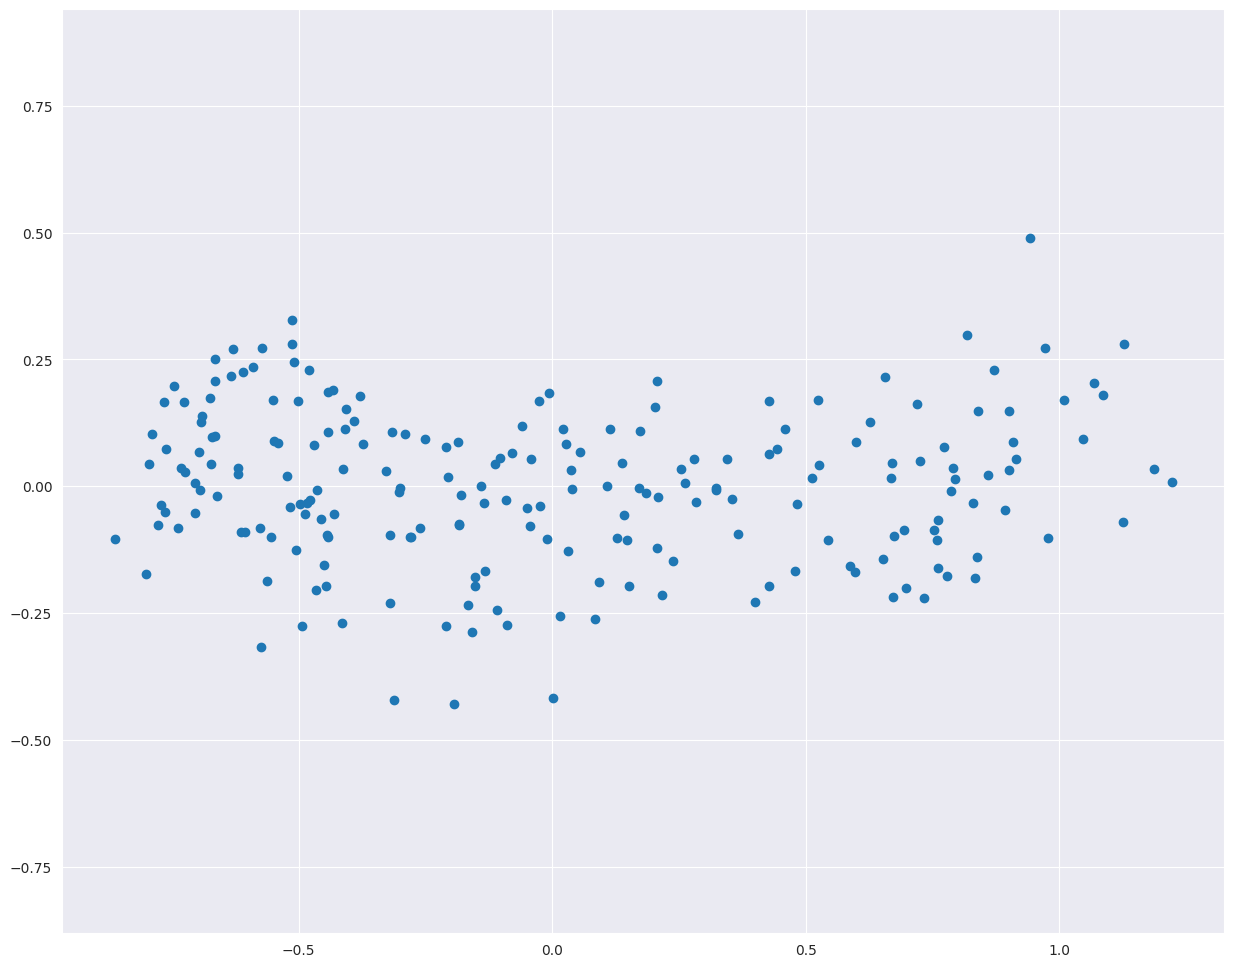

In [74]:
# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.figure(figsize=(15,12))
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

In [75]:
# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

8.933825901280557e-17


***Excellent! Vous avez réussi à décorréler les mesures de grains avec PCA !***

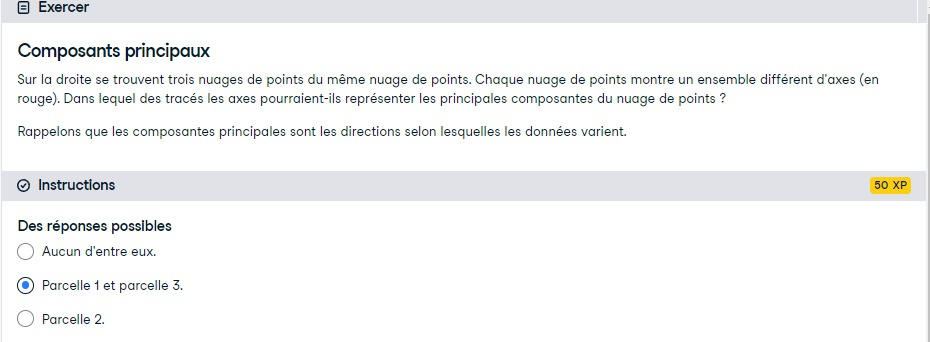

***Bien joué! Vous avez correctement déduit que les composants principaux doivent s'aligner sur les axes du nuage de points. Cela se produit à la fois dans la parcelle 1 et la parcelle 3.***

####**1. Dimension intrinsèque**

####**2. Dimension intrinsèque d'une trajectoire de vol**

+ ***Considérez cet ensemble de données avec 2 caractéristiques : latitude et longitude. Ces deux caractéristiques pourraient suivre le vol d'un avion, par exemple. Cet ensemble de données est bidimensionnel, mais il s'avère qu'il peut être approché de près en utilisant une seule caractéristique : le déplacement le long de la trajectoire de vol. Ce jeu de données est intrinsèquement unidimensionnel.***

####**3. Dimension intrinsèque**

+ ***La dimension intrinsèque d'un jeu de données est le nombre de caractéristiques nécessaires pour l'approximer. La dimension intrinsèque informe sur la réduction de dimension, car elle nous indique dans quelle mesure un ensemble de données peut être compressé. Dans cette vidéo, vous acquerrez une solide compréhension de la dimension intrinsèque et serez en mesure d'utiliser l'ACP pour l'identifier dans des ensembles de données du monde réel comportant des milliers de fonctionnalités.***

####**4. Ensemble de données Versicolor**

+ ***Pour mieux illustrer la dimension intrinsèque, considérons un exemple d'ensemble de données contenant seulement certains des échantillons de l'ensemble de données de l'iris. Plus précisément, prenons trois mesures à partir des échantillons d'iris versicolor : la longueur des sépales, la largeur des sépales et la largeur des pétales. Ainsi, chaque échantillon est représenté comme un point dans un espace tridimensionnel.***

####**5. Le jeu de données Versicolor a une dimension intrinsèque 2**

+ ***Cependant, si nous faisons un nuage de points 3D des échantillons, nous voyons qu'ils se trouvent tous très près d'une feuille plate en 2 dimensions. Cela signifie que les données peuvent être approximées en utilisant seulement deux coordonnées, sans perdre beaucoup d'informations. Ce jeu de données a donc une dimension intrinsèque 2.***

####**6. L'ACP identifie la dimension intrinsèque**

+ ***Mais les nuages ​​de points ne sont possibles que s'il y a 3 entités ou moins. Alors, comment identifier la dimension intrinsèque, même s'il existe de nombreuses caractéristiques ? C'est là que l'ACP est vraiment utile. La dimension intrinsèque peut être identifiée en comptant les caractéristiques PCA qui ont une variance élevée. Pour voir comment, voyons ce qui se passe lorsque PCA est appliqué à l'ensemble de données d'échantillons versicolor.***

####**7. PCA des échantillons versicolor**

+ ***PCA tourne et décale les échantillons pour les aligner avec les axes de coordonnées. Cela exprime les échantillons à l'aide de trois caractéristiques PCA.***

####**8. Les fonctionnalités PCA sont classées par variance décroissante**

+ ***Les fonctions PCA sont dans un ordre spécial. Voici un graphique à barres montrant la variance de chacune des caractéristiques PCA. Comme vous pouvez le voir, chaque caractéristique PCA a moins de variance que la précédente, et dans ce cas, la dernière caractéristique PCA a une très faible variance. Cela concorde avec le nuage de points des caractéristiques PCA, où les échantillons ne varient pas beaucoup dans la direction verticale. Dans les deux autres directions, cependant, la variance est apparente.***

####**9. Variance et dimension intrinsèque**

+ ***La dimension intrinsèque est le nombre de caractéristiques PCA qui ont une variance significative. Dans notre exemple, seules les deux premières caractéristiques PCA ont une variance significative. Cet ensemble de données a donc une dimension intrinsèque 2, ce qui correspond à ce que nous avons observé lors de l'inspection du nuage de points.***

####**10. Tracer les variances des caractéristiques PCA**

+ ***Voyons comment tracer les variances des caractéristiques PCA dans la pratique. Tout d'abord, faites les importations nécessaires. Créez ensuite un modèle PCA et adaptez-le aux échantillons.***

####**11. Tracer les variances des caractéristiques PCA**

+ ***Créez maintenant une plage énumérant les fonctionnalités PCA, et faire un graphique à barres des variances ; les variances sont disponibles en tant qu'attribut de variance expliquée du modèle PCA.***

####**12. La dimension intrinsèque peut être ambiguë**

+ ***La dimension intrinsèque est une idée utile qui aide à guider la réduction de dimension. Cependant, ce n'est pas toujours sans ambiguïté. Voici un graphique des variances des caractéristiques PCA pour l'ensemble de données sur le vin. On pourrait plaider pour une dimension intrinsèque de 2, de 3, voire plus, selon le seuil choisi.***

####**13. Entraînons-nous !**

+ ***Dans la vidéo suivante, vous apprendrez à utiliser la dimension intrinsèque pour la réduction de dimension. Mais pour l'instant, entraînons-nous à découvrir la dimension intrinsèque de certains ensembles de données du monde réel !***


###**EXERCICES**
####**Le premier élément principal**
+ ***La première composante principale des données est la direction dans laquelle les données varient le plus. Dans cet exercice, votre travail consiste à utiliser l'ACP pour trouver la première composante principale des mesures de longueur et de largeur des échantillons de grain et à la représenter sous forme de flèche sur le nuage de points.***

+ *Le tableau grains donne la longueur et la largeur des échantillons de grains. PyPlot (plt) et PCAont déjà été importés pour vous.*

####**Instructions**

+ Faire un nuage de points des mesures de grain. Cela a été fait pour vous.
+ Créez une instance PCA appelée model.
+ Ajuster le modèle aux données grains.
+ Extrayez les coordonnées de la moyenne des données à l'aide de .mean_attribut de model.
+ Obtenez le premier composant principal de modell'utilisation de l'attribut .components_[0,:].
+ Tracez la première composante principale sous forme de flèche sur le nuage de points, à l'aide de la fonction plt.arrow().
+  Vous devez spécifier les deux premiers arguments - mean[0]et mean[1].

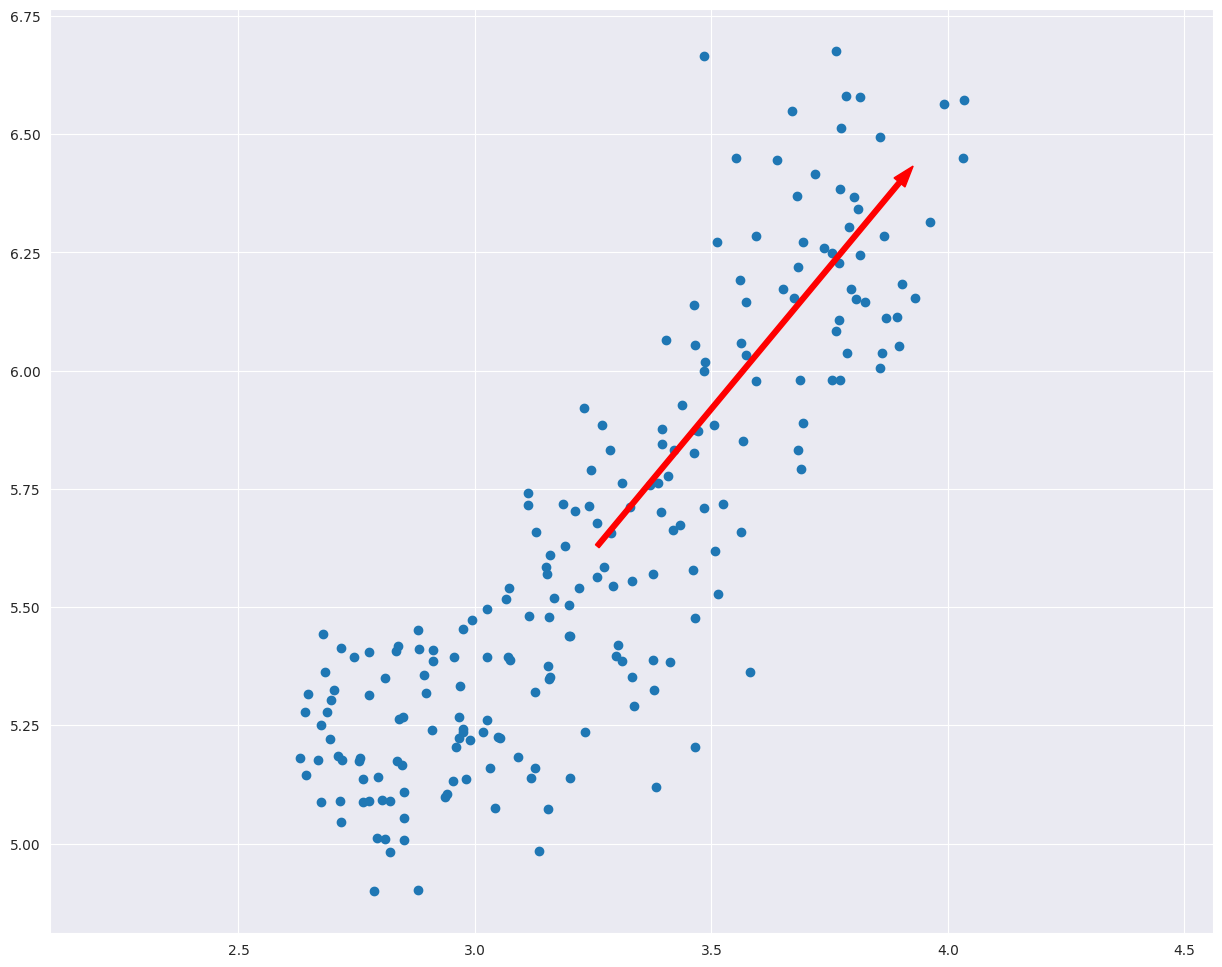

In [77]:

# Make a scatter plot of the untransformed points
plt.figure(figsize=(15,12))
plt.scatter(grains[:,0], grains[:,1])

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grains)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

***Excellent travail! C'est la direction dans laquelle les données de grain varient le plus.***

####**Variation des fonctionnalités PCA**

+ ***Le jeu de données sur les poissons est en 6 dimensions. Mais quelle est sa dimension intrinsèque ? Faites un graphique des variances des caractéristiques PCA pour le savoir. Comme précédemment, samples est un tableau 2D, où chaque ligne représente un poisson. Vous devrez d'abord standardiser les fonctionnalités.***

####**Instructions**

+ Créez une instance de StandardScaler appelée scaler.
+ Créez une instance PCA appelée pca.
+ Utilisez la fonction make_pipeline() pour créer un chaînage de pipeline scaler et pca.
+ Utilisez la méthode .fit() de pipeline pour l'adapter aux échantillons de poisson samples.
+ Extrayez le nombre de composants utilisés à l'aide de l' attribut .n_components_ de pca.
+ Placez ceci dans une fonction range() et stockez le résultat sous forme de fichier features.
+ Utilisez la fonction plt.bar() pour tracer les variances expliquées, avec featuressur l'axe des $x$ et pca.explained_variance_sur l'axe des $y$.

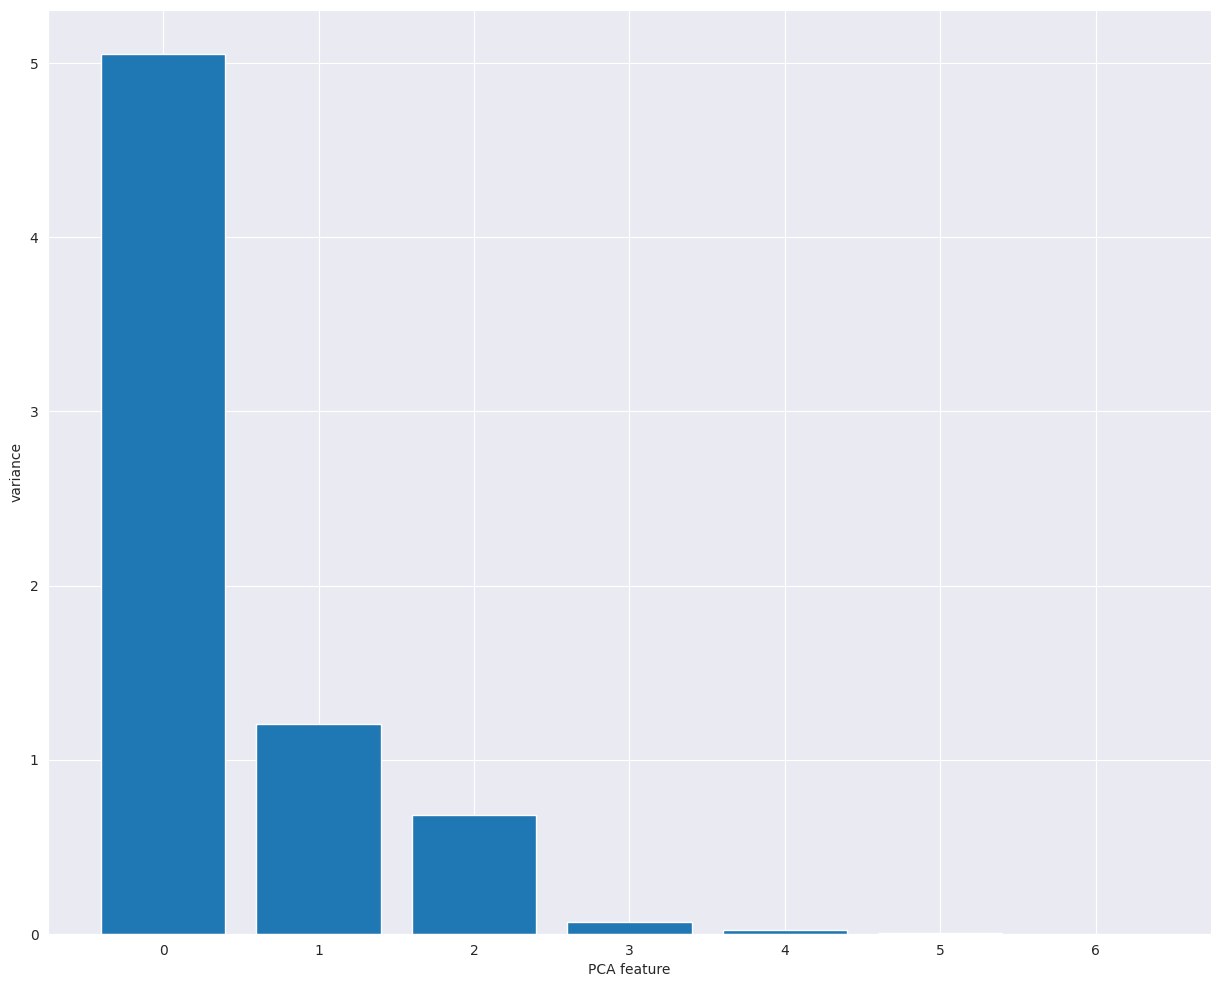

In [78]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
features = range(pca.n_components_)

plt.figure(figsize=(15,12))
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

***Bon travail! Il semble que les caractéristiques PCA 0 et 1 présentent une variance significative.***

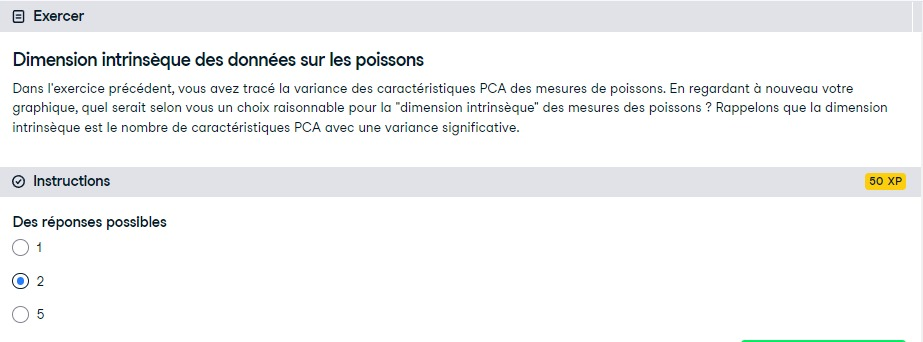

***Bon travail! Étant donné que les caractéristiques PCA 0 et 1 ont une variance significative, la dimension intrinsèque de cet ensemble de données semble être de 2.***


####**1. Réduction dimensionnelle avec PCA**

####**2. Réduction dimensionnelle**

+ ***La réduction de dimension représente les mêmes données en utilisant moins de fonctionnalités et est essentielle pour créer des pipelines d'apprentissage automatique à l'aide de données du monde réel. Enfin, dans cette vidéo, vous apprendrez à effectuer une réduction de dimension à l'aide de l'ACP.***

####**3. Réduction dimensionnelle avec PCA**
+ ***Nous avons déjà vu que les fonctionnalités PCA sont dans l'ordre décroissant de variance. PCA effectue une réduction de dimension en éliminant les caractéristiques PCA avec une variance plus faible, qu'il suppose être du bruit, et en conservant les caractéristiques PCA à variance plus élevée, qu'il suppose être informatives.***

####**4. Réduction dimensionnelle avec PCA**

+ ***Pour utiliser PCA pour la réduction de dimension, vous devez spécifier le nombre de fonctions PCA à conserver. Par exemple, spécifier n_components=2 lors de la création d'un modèle PCA lui indique de ne conserver que les deux premières fonctionnalités PCA. Un bon choix est la dimension intrinsèque de l'ensemble de données, si vous la connaissez. Prenons tout de suite un exemple.***

####**5. Réduction de dimension de l'ensemble de données d'iris**

+ ***L'ensemble de données d'iris comporte 4 caractéristiques représentant les 4 mesures. Ici, les mesures sont dans un tableau numpy appelé samples. Utilisons PCA pour réduire la dimension de l'ensemble de données d'iris à seulement 2. Commencez par importer PCA comme d'habitude. Créez un modèle PCA en spécifiant n_components=2, puis ajustez le modèle et transformez les échantillons comme d'habitude. En imprimant la forme des échantillons transformés, nous voyons qu'il n'y a que deux caractéristiques, comme prévu.***

####**6. Jeu de données Iris en 2 dimensions**

+ ***Voici un diagramme de dispersion des deux caractéristiques PCA, où les couleurs représentent les trois espèces d'iris. Remarquablement, malgré la réduction de la dimension de 4 à 2, l'espèce peut toujours être distinguée. Rappelez-vous que PCA ne savait même pas qu'il existait des espèces distinctes. PCA a simplement pris les 2 caractéristiques PCA avec la variance la plus élevée. Comme nous pouvons le voir, ces deux fonctionnalités sont très instructives.***

####**7. Réduction dimensionnelle avec PCA**

+ ***L'ACP ignore les caractéristiques à faible variance et suppose que les caractéristiques à variance plus élevée sont informatives. Comme toutes les hypothèses, il y a des cas où cela ne tient pas. Comme nous l'avons vu avec l'ensemble de données d'iris, cependant, c'est souvent le cas dans la pratique.***

####**8. Tableaux de fréquences de mots**

+ ***Dans certains cas, une implémentation alternative de PCA doit être utilisée. Les tableaux de fréquences de mots en sont un excellent exemple. Dans un tableau de fréquence de mots, chaque ligne correspond à un document, et chaque colonne correspond à un mot d'un vocabulaire fixe. Les entrées du tableau de fréquence des mots mesurent la fréquence d'apparition de chaque mot dans chaque document. Seuls certains des mots du vocabulaire apparaissent dans un document, de sorte que la plupart des entrées du tableau de fréquence des mots sont nulles.***

####**9. Tableaux clairsemés et csr_matrix**

+ ***Les tableaux comme celui-ci sont dits "parsemés" et sont souvent représentés à l'aide d'un type spécial de tableau appelé "csr_matrix". csr_matrices économise de l'espace en ne se souvenant que des entrées non nulles du tableau.***

####**10. TruncatedSVD et csr_matrix**

+ ***La PCA de Scikit-learn ne prend pas en charge csr_matrices et vous devrez utiliser TruncatedSVD à la place. TruncatedSVD effectue la même transformation que PCA, mais accepte les matrices csr en entrée. En dehors de cela, vous interagissez avec TruncatedSVD et PCA exactement de la même manière.***

####**11. Entraînons-nous !**

+ ***Dans cette vidéo, vous avez appris à effectuer une réduction de dimension à l'aide de l'ACP. Il est maintenant temps de pratiquer la réduction de dimension dans la nature !***

###**EXERCICES**
####**Réduction dimensionnelle des mesures du poisson**

+ ***Dans un exercice précédent, vous avez vu que 2 c'était un choix raisonnable pour la "dimension intrinsèque" des mesures des poissons. Utilisez maintenant PCA pour réduire la dimensionnalité des mesures de poisson, en ne conservant que les 2 composants les plus importants.***

+ *Les mesures des poissons ont déjà été mises à l'échelle pour vous et sont disponibles au format scaled_samples.*

####**Instructions**

+ Importer PCA depuis sklearn.decomposition.
+ Créez une instance PCA appelée pca avec n_components=2.
+ Utilisez la méthode .fit() de pcapour l'adapter aux mesures des poissons écaillés scaled_samples.
+ Utilisez la méthode .transform() de pcapour transformer le scaled_samples. Affectez le résultat à pca_features.

In [79]:
scaler = StandardScaler()
scaled_samples = scaler.fit_transform(samples)

In [80]:
# Import PCA
from sklearn.decomposition import PCA

# Create a PCA model with 2 components: pca
pca = PCA(n_components=2)

# Fit the PCA instance to the scaled samples
pca.fit(scaled_samples)

# Transform the scaled samples: pca_features
pca_features = pca.transform(scaled_samples)

# Print the shape of pca_features
print(pca_features.shape)

(210, 2)


***Superbe! Vous avez réussi à réduire la dimensionnalité de 6 à 2.***

####**Un tableau de fréquences de mots tf-idf**
+ ***Dans cet exercice, vous allez créer un tableau de fréquences de mots tf-idf pour une collection de documents. Pour cela, utilisez le TfidfVectorizerfrom sklearn. Il transforme une liste de documents en un tableau de fréquences de mots, qu'il affiche sous la forme d'un csr_matrix. Il a des méthodes fit() et transform()  comme les autres objets sklearn.***

+ *On vous donne une liste documentsde documents jouets sur les animaux de compagnie. Son contenu a été imprimé dans le shell IPython.*

####**Instructions**

+ Importer TfidfVectorizer depuis sklearn.feature_extraction.text.
+ Créez une instance TfidfVectorizer appelée tfidf.
+ Appliquez la méthode .fit_transform() de tfidf à documents et affectez le résultat à csr_mat. Il s'agit d'un tableau de fréquence de mots au format csr_matrix.
+ Inspectez csr_maten appelant sa méthode .toarray() et en imprimant le résultat. Cela a été fait pour vous.
+ Les colonnes du tableau correspondent à des mots. Obtenez la liste des mots en appelant la méthode .get_feature_names() de tfidfet affectez le résultat à words.

In [81]:
documents = ['cats say meow', 'dogs say woof', 'dogs chase cats']

In [82]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer()

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(documents)

# Print result of toarray() method
print(csr_mat.toarray())

[[0.51785612 0.         0.         0.68091856 0.51785612 0.        ]
 [0.         0.         0.51785612 0.         0.51785612 0.68091856]
 [0.51785612 0.68091856 0.51785612 0.         0.         0.        ]]


In [84]:
# Get the words: words
words = tfidf.get_feature_names_out()
# Print words
print(words)

['cats' 'chase' 'dogs' 'meow' 'say' 'woof']


***Bon travail! Vous allez maintenant passer au regroupement des articles Wikipédia !***

####**Clustering Wikipedia partie I**
+ ***Vous avez vu dans la vidéo qu'il TruncatedSVD est capable d'effectuer une PCA sur des tableaux clairsemés au format csr_matrix, tels que des tableaux de fréquence de mots. Combinez vos connaissances de TruncatedSVD et de k-means pour regrouper certaines pages populaires de Wikipedia. Dans cet exercice, construisez le pipeline. Dans le prochain exercice, vous l'appliquerez au tableau de fréquences de mots de certains articles de Wikipédia.***

+ ***Créez un objet Pipeline composé d'un TruncatedSVD suivi de KMeans. (Cette fois, nous avons précalculé la matrice de fréquence des mots pour vous, il n'y a donc pas besoin d'un TfidfVectorizer).***

+ *L'ensemble de données Wikipedia avec lequel vous allez travailler a été obtenu à partir d ' [ici](https://www.lateral.io/resources-blog/the-unknown-perils-of-mining-wikipedia) .*

####**Instructions**

+ Importer:
  + TruncatedSVD de sklearn.decomposition.
  + KMeans de sklearn.cluster.
  + make_pipeline de sklearn.pipeline.
+ Créez une instance TruncatedSVD appelée svd avec n_components=50.
+ Créez une instance KMeans appelée kmeans avec n_clusters=6.
+ Créez un pipeline appelé pipeline composé de svd et kmeans.

In [94]:
# Perform the necessary imports
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=6, n_init='auto')

# Create a pipeline: pipeline
pipeline = make_pipeline(svd,kmeans)

***Excellent! Maintenant que vous avez configuré votre pipeline, vous l'utiliserez dans le prochain exercice pour regrouper les articles.***


####**Clustering Wikipedia partie II**

+ ***Il est maintenant temps de mettre votre pipeline de l'exercice précédent au travail ! On vous donne un tableau articlesde fréquences de mots tf-idf de certains articles populaires de Wikipedia, et une liste titlesde leurs titres. Utilisez votre pipeline pour regrouper les articles de Wikipedia.***

+ *Une solution à l'exercice précédent a été pré-chargée pour vous, donc un Pipeline pipeline chaînant TruncatedSVD avec KMeans est disponible.*

####**Instructions**

+ Importer pandas au format pd.
+ Ajustez le pipeline au tableau de fréquences de mots articles.
Prédisez les étiquettes de cluster.
+ Alignez les étiquettes de cluster avec la liste titlesdes titres d'articles en créant un DataFrame dfavec labels et titles comme colonnes. Cela a été fait pour vous.
+ Utilisez la méthode .sort_values() de dfpour trier le DataFrame par 'label'colonne et imprimez le résultat.
+ Cliquez sur soumettre et prenez un moment pour enquêter sur votre incroyable regroupement de pages Wikipédia !

In [112]:
def create_dir_save_file(dir_path: Path, url: str):
    """
    Check if the path exists and create it if it does not.
    Check if the file exists and download it if it does not.
    """
    if not dir_path.parents[0].exists():
        dir_path.parents[0].mkdir(parents=True)
        print(f'Directory Created: {dir_path.parents[0]}')
    else:
        print('Directory Exists')

    if not dir_path.exists():
        r = requests.get(url, allow_redirects=True)
        open(dir_path, 'wb').write(r.content)
        print(f'File Created: {dir_path.name}')
    else:
        print('File Exists')



data_dir = Path('data/2021-03-29_unsupervised_learning_python')
images_dir = Path('Images/2021-03-29_unsupervised_learning_python')


# csv files
base = 'https://assets.datacamp.com/production/repositories/655/datasets'
file_lcd = base + '/effd1557b8146ab6e620a18d50c9ed82df990dce/lcd-digits.csv'

# zip files
file_musicians = base + '/c974f2f2c4834958cbe5d239557fbaf4547dc8a3/Musical%20artists.zip'
file_wiki = base + '/8e2fbb5b8240c06602336f2148f3c42e317d1fdb/Wikipedia%20articles.zip'


file_links = [file_musicians, file_wiki, file_lcd]
file_paths = list()

for file in file_links:
    file_name = file.split('/')[-1].replace('?raw=true', '').replace('%20', '_')
    data_path = data_dir / file_name
    create_dir_save_file(data_path, file)
    file_paths.append(data_path)

Directory Exists
File Exists
Directory Exists
File Exists
Directory Exists
File Created: lcd-digits.csv


In [113]:
# unzip the zipped files
zip_files = [v for v in file_paths if v.suffix == '.zip']
for file in zip_files:
    with ZipFile(file, 'r') as zip_:
        zip_.extractall(data_dir)
dp = [v for v in data_dir.rglob('*') if v.suffix in ['.csv', '.txt']]
dp

[PosixPath('data/2021-03-29_unsupervised_learning_python/fish.csv'),
 PosixPath('data/2021-03-29_unsupervised_learning_python/lcd-digits.csv'),
 PosixPath('data/2021-03-29_unsupervised_learning_python/Grains/seeds-width-vs-length.csv'),
 PosixPath('data/2021-03-29_unsupervised_learning_python/Grains/seeds.csv'),
 PosixPath('data/2021-03-29_unsupervised_learning_python/Musical artists/scrobbler-small-sample.csv'),
 PosixPath('data/2021-03-29_unsupervised_learning_python/Musical artists/artists.csv'),
 PosixPath('data/2021-03-29_unsupervised_learning_python/Wikipedia articles/wikipedia-vocabulary-utf8.txt'),
 PosixPath('data/2021-03-29_unsupervised_learning_python/Wikipedia articles/wikipedia-vectors.csv')]

In [95]:
from scipy.sparse import csc_matrix

documents = pd.read_csv('data/2021-03-29_unsupervised_learning_python/Wikipedia articles/wikipedia-vectors.csv', index_col=0)
documents.tail()

,HTTP 404,Alexa Internet,Internet Explorer,HTTP cookie,Google Search,Tumblr,Hypertext Transfer Protocol,Social search,Firefox,LinkedIn,...,Chad Kroeger,Nate Ruess,The Wanted,Stevie Nicks,Arctic Monkeys,Black Sabbath,Skrillex,Red Hot Chili Peppers,Sepsis,Adam Levine
13120,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
13121,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
13122,0.0,0.0,0.011594,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
13123,0.0,0.0,0.000000,0.0,0.006649,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005476,0.0
13124,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [96]:
titles = documents.columns
articles = csc_matrix(documents.values).T

In [97]:
type(articles)

scipy.sparse._csr.csr_matrix

In [98]:
articles.T.shape

(13125, 60)

In [99]:
# Import pandas
import pandas as pd

# Fit the pipeline to articles
pipeline.fit(articles)

# Calculate the cluster labels: labels
labels = pipeline.predict(articles)

# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'article': titles})

# Display df sorted by cluster label
print(df.sort_values('label'))

    label                                        article
14      0                                 Climate change
17      0  Greenhouse gas emissions by the United States
13      0                               Connie Hedegaard
12      0                                   Nigel Lawson
11      0       Nationally Appropriate Mitigation Action
10      0                                 Global warming
18      0  2010 United Nations Climate Change Conference
15      0                                 Kyoto Protocol
19      0  2007 United Nations Climate Change Conference
16      0                                        350.org
21      1                             Michael Fassbender
22      1                              Denzel Washington
23      1                           Catherine Zeta-Jones
24      1                                   Jessica Biel
25      1                                  Russell Crowe
26      1                                     Mila Kunis
20      1                      

***Fantastique! Jetez un œil aux étiquettes des clusters et voyez si vous pouvez identifier des modèles !***

####**1. Factorisation matricielle non négative (NMF)**

####**2. Factorisation matricielle non négative**

+ ***NMF signifie "factorisation matricielle non négative". NMF, comme PCA, est une technique de réduction de dimension. Contrairement à l'ACP, cependant, les modèles NMF sont interprétables. Cela signifie qu'un modèle NMF est plus facile à comprendre par vous-même et beaucoup plus facile à expliquer aux autres. Cependant, NMF ne peut pas être appliqué à tous les ensembles de données. Il faut que les caractéristiques de l'échantillon soient "non négatives", donc supérieures ou égales à 0.***

####**3. Parties interprétables**

+ ***NMF atteint son interprétabilité en décomposant les échantillons sous forme de sommes de leurs parties. Par exemple, NMF décompose les documents en combinaisons de thèmes communs,***

####**4. Parties interprétables**

+ ***et des images comme combinaisons de motifs communs. Vous découvrirez ces deux exemples en détail plus tard. Pour l'instant, concentrons-nous sur le démarrage.***

####**5. Utilisation de scikit-learn NMF**

+ ***NMF est disponible dans scikit learn et suit le même modèle d'ajustement/transformation que PCA. Cependant, contrairement à PCA, le nombre de composants souhaité doit toujours être spécifié. NMF fonctionne à la fois avec des tableaux numpy et des tableaux clairsemés au format csr_matrix.***

####**6. Exemple de tableau de fréquence de mots**

+ ***Voyons une application de NMF à un exemple jouet d'un tableau de fréquence de mots. Dans cet ensemble de données de jouets, il n'y a que 4 mots dans le vocabulaire, et ceux-ci correspondent aux quatre colonnes du tableau de fréquence des mots. Chaque ligne représente un document et les entrées du tableau mesurent la fréquence de chaque mot dans le document en utilisant ce qu'on appelle "tf-idf". "tf" est la fréquence du mot dans le document. Donc, si 10 % des mots dans le document sont "datacamp", alors le tf de "datacamp" pour ce document est le point-1. "idf" est un schéma de pondération qui réduit l'influence des mots fréquents comme "le".***

####**7. Exemple d'utilisation de NMF**

+ ***Voyons maintenant comment utiliser NMF en Python. Tout d'abord, importez NMF. Créez un modèle en spécifiant le nombre de composants souhaité. Précisons 2. Ajustez le modèle aux échantillons, puis utilisez le modèle d'ajustement pour effectuer la transformation.***

####**8. Composants NMF**

+ ***Tout comme PCA a des composants principaux, NMF a des composants qu'il apprend à partir des échantillons, et comme avec PCA, la dimension des composants est la même que la dimension des échantillons. Dans notre exemple, par exemple, il y a 2 composants, et ils vivent dans un espace à 4 dimensions, correspondant aux 4 mots du vocabulaire. Les entrées des composants NMF sont toujours non négatives.***

####**9. Fonctionnalités NMF**

+ ***Les valeurs de fonction NMF sont également non négatives. Comme nous l'avons vu avec PCA, nos données transformées dans cet exemple auront deux colonnes, correspondant à nos deux nouvelles fonctionnalités. Les caractéristiques et les composants d'un modèle NMF peuvent être combinés pour reconstruire approximativement les échantillons de données d'origine.***

####**10. Reconstitution d'un échantillon**

+ ***Voyons comment cela fonctionne avec un seul échantillon de données. Voici un exemple représentant un document de notre ensemble de données de jouets, et voici ses valeurs de fonctionnalité NMF. Maintenant, si nous multiplions chaque composant NMF par la valeur de caractéristique NMF correspondante et additionnons chaque colonne, nous obtenons quelque chose de très proche de l'échantillon d'origine.***

####**11. Reconstruction de l'échantillon**

+ ***Ainsi, un échantillon peut être reconstruit en multipliant les composants NMF par les valeurs des caractéristiques NMF de l'échantillon, et en les additionnant. Ce calcul peut également être exprimé comme ce qu'on appelle un produit de matrices. Nous n'utiliserons pas ce point de vue, mais c'est de là que vient la "factorisation matricielle", ou "MF", dans NMF.***

####**12. NMF s'adapte uniquement aux données non négatives**

+ ***Enfin, rappelez-vous que NMF ne peut être appliqué qu'à des tableaux de données non négatives, tels que des tableaux de fréquence de mots. Dans la vidéo suivante, vous construirez un autre exemple en encodant des collections d'images sous forme de tableaux non négatifs. Il existe également de nombreux autres exemples intéressants, tels que des tableaux codant des spectrogrammes audio et des tableaux représentant les historiques d'achat sur les sites de commerce électronique.***

####**13. Entraînons-nous !**

+ ***Dans cette vidéo, vous avez appris les bases de NMF. Entraînons-nous maintenant à l'utiliser.***

###**EXERCICES**

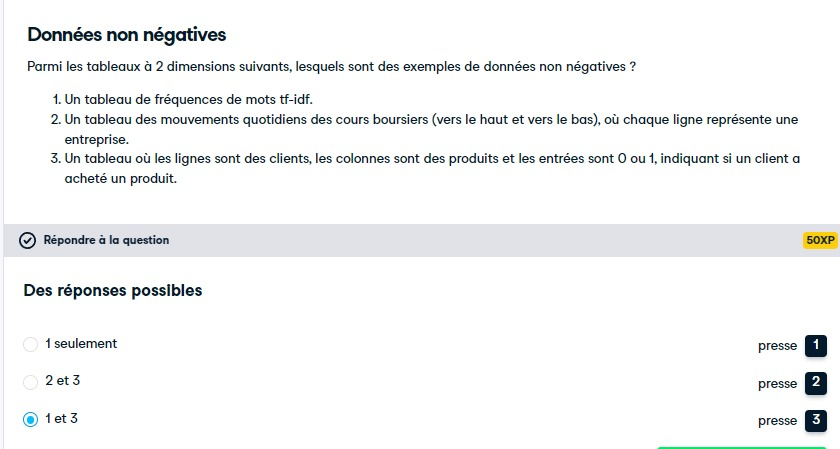

***Bien joué! Les cours des actions peuvent aussi bien baisser qu'augmenter, de sorte qu'un éventail de mouvements quotidiens des cours boursiers n'est pas un exemple de données non négatives.***

####**NMF appliqué aux articles de Wikipédia**

+ ***Dans la vidéo, vous avez vu NMF appliqué pour transformer un tableau de fréquences de mots jouets. C'est maintenant à votre tour d'appliquer NMF, cette fois en utilisant le tableau de fréquences de mots tf-idf des articles de Wikipédia, donné sous forme de matrice csr articles. Ici, ajustez le modèle et transformez les articles. Dans l'exercice suivant, vous explorerez le résultat.***

####**Instructions**

+ Importer NMF depuis sklearn.decomposition.
+ Créez une instance NMF appelée model avec 6 des composants.
+ Ajustez le modèle aux données de comptage de mots articles.
+ Utilisez la méthode .transform() de model pour transformer articleset affectez le résultat à nmf_features.
+ Imprimez nmf_features pour avoir une première idée de ce à quoi il ressemble (.round(2)arrondissez les entrées à 2 décimales.)

In [101]:
from scipy.sparse import csr_matrix

documents = pd.read_csv('data/2021-03-29_unsupervised_learning_python/Wikipedia articles/wikipedia-vectors.csv', index_col=0)
titles = documents.columns
articles = csc_matrix(documents.values).T

In [102]:
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF instance: model
model = NMF(n_components=6)

# Fit the model to articles
model.fit(articles)

# Transform the articles: nmf_features
nmf_features = model.transform(articles)

# Print the NMF features
print(nmf_features.round(2))

[[0.   0.   0.   0.   0.   0.44]
 [0.   0.   0.   0.   0.   0.56]
 [0.   0.   0.   0.   0.   0.4 ]
 [0.   0.   0.   0.   0.   0.38]
 [0.   0.   0.   0.   0.   0.48]
 [0.01 0.01 0.01 0.03 0.   0.33]
 [0.   0.   0.02 0.   0.01 0.36]
 [0.   0.   0.   0.   0.   0.49]
 [0.02 0.01 0.   0.02 0.03 0.48]
 [0.01 0.03 0.03 0.07 0.02 0.34]
 [0.   0.   0.53 0.   0.03 0.  ]
 [0.   0.   0.35 0.   0.   0.  ]
 [0.01 0.01 0.31 0.06 0.01 0.02]
 [0.   0.01 0.34 0.01 0.   0.  ]
 [0.   0.   0.43 0.   0.04 0.  ]
 [0.   0.   0.48 0.   0.   0.  ]
 [0.01 0.02 0.37 0.03 0.   0.01]
 [0.   0.   0.48 0.   0.   0.  ]
 [0.   0.01 0.55 0.   0.   0.  ]
 [0.   0.   0.46 0.   0.   0.  ]
 [0.   0.01 0.02 0.51 0.06 0.01]
 [0.   0.   0.   0.51 0.   0.  ]
 [0.   0.01 0.   0.42 0.   0.  ]
 [0.   0.   0.   0.43 0.   0.  ]
 [0.   0.   0.   0.49 0.   0.  ]
 [0.1  0.09 0.   0.38 0.   0.01]
 [0.   0.   0.   0.57 0.   0.01]
 [0.01 0.01 0.   0.47 0.   0.01]
 [0.   0.   0.   0.57 0.   0.  ]
 [0.   0.   0.   0.52 0.01 0.01]
 [0.   0.4

***Fantastique - explorons la signification de ces fonctionnalités dans le prochain exercice !***

####**Fonctionnalités NMF des articles de Wikipédia**

+ ***Vous allez maintenant explorer les fonctions NMF que vous avez créées dans l'exercice précédent. Une solution à l'exercice précédent a été préchargée, le tableau nmf_featuresest donc disponible. titlesUne liste donnant le titre de chaque article de Wikipédia est également disponible .***

+ ***Lorsque vous étudiez les fonctionnalités, notez que pour les deux acteurs, la fonctionnalité NMF 3 a de loin la valeur la plus élevée. Cela signifie que les deux articles sont reconstruits en utilisant principalement le 3ème composant NMF. Dans la vidéo suivante, vous comprendrez pourquoi : les composants NMF représentent des sujets (par exemple, jouer !).***

####**Instructions**

+ Importer pandas au format pd.
+ Créez un DataFrame df à partir nmf_features de pd.DataFrame().
+ Définissez l'index sur titles using index=titles.
+ Utilisez l'accesseur .loc[] de df pour sélectionner la ligne avec le titre 'Anne Hathaway'et imprimez le résultat.
+ Ce sont les caractéristiques NMF pour l'article sur l'actrice Anne Hathaway.
+ Répétez la dernière étape pour 'Denzel Washington'(un autre acteur).

In [103]:
# Import pandas
import pandas as pd

# Create a pandas DataFrame: df
df = pd.DataFrame(nmf_features, index=titles)

# Print the row for 'Anne Hathaway'
print(df.loc['Anne Hathaway',:])

0    0.003815
1    0.000000
2    0.000000
3    0.571909
4    0.000000
5    0.000000
Name: Anne Hathaway, dtype: float64


In [104]:
# Print the row for 'Denzel Washington'
print(df.loc['Denzel Washington',:])

0    0.000000
1    0.005575
2    0.000000
3    0.419595
4    0.000000
5    0.000000
Name: Denzel Washington, dtype: float64


***Bon travail! Notez que pour les deux acteurs, la caractéristique NMF 3 a de loin la valeur la plus élevée. Cela signifie que les deux articles sont reconstruits en utilisant principalement le 3ème composant NMF. Dans la vidéo suivante, vous comprendrez pourquoi : les composants NMF représentent des sujets (par exemple, jouer !).***

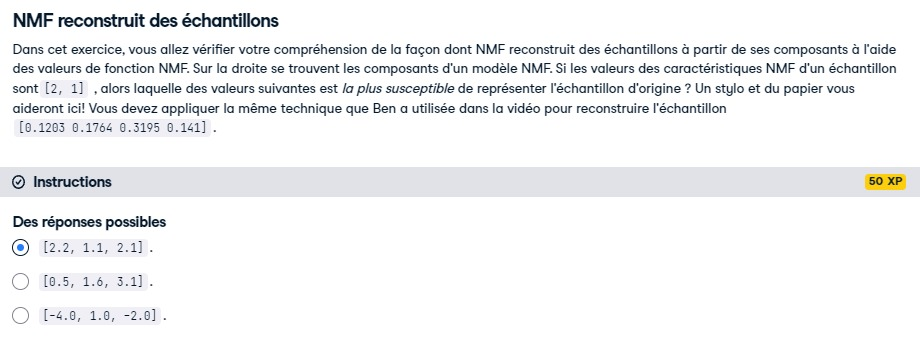

In [105]:
sample_feature = np.array([2, 1])
components = np.array([[1. , 0.5, 0. ],
                       [0.2, 0.1, 2.1]])

In [106]:
np.matmul(sample_feature.T, components)

array([2.2, 1.1, 2.1])

####**1. NMF apprend les parties interprétables**

+ ***Dans cette vidéo, vous apprendrez que les composants de NMF représentent des modèles qui se produisent fréquemment dans les échantillons.***

####**2. Exemple : NMF apprend les parties interprétables**

+ ***Prenons un exemple concret, où les articles scientifiques sont représentés par leurs fréquences de mots. Il y a 20 000 articles et 800 mots. Le tableau a donc 800 colonnes.***

####**3. Appliquer NMF aux articles**

+ ***Ajustons un modèle NMF avec 10 composants aux articles. Les 10 composants sont stockés sous la forme de 10 lignes d'un tableau numpy à 2 dimensions.***

####**4. Les composants NMF sont des sujets**

+ ***Les lignes, ou composants, vivent dans un espace de 800 dimensions - il y a une dimension pour chacun des mots. Aligner les mots de notre vocabulaire avec les colonnes des composants NMF permet de les interpréter.***

####**5. Les composants NMF sont des sujets**

+ ***Choisir un composant, comme celui-ci, et regarder quels mots ont les valeurs les plus élevées,***

####**6. Les composants NMF sont des sujets**

+ ***on voit qu'ils correspondent à un thème : les mots sont 'espèce', 'plante', 'plantes', 'génétique', 'évolution' et 'vie'.***

####**7. Les composants NMF sont des sujets**

+ ***La même chose se produit si n'importe quel autre composant est pris en compte.***

####**8. Composants NMF**

+ ***Ainsi, si NMF est appliqué à des documents, les composants correspondent à des rubriques et les fonctionnalités NMF reconstruisent les documents à partir des rubriques. Si NMF est appliqué à une collection d'images, d'autre part, les composants NMF représentent des modèles qui se produisent fréquemment dans les images. Dans cet exemple, par exemple, NMF décompose les images d'un écran LCD dans les cellules individuelles de l'écran. Vous étudierez cet exemple par vous-même dans les exercices. Pour ce faire, vous devez savoir comment représenter une collection d'images sous la forme d'un tableau non négatif.***

####**9. Images en niveaux de gris**

+ ***Une image dans laquelle tous les pixels sont des nuances de gris allant du noir au blanc est appelée "image en niveaux de gris". Puisqu'il n'y a que des nuances de gris, une image en niveaux de gris peut être codée par la luminosité de chaque pixel. En représentant la luminosité sous la forme d'un nombre compris entre 0 et 1, où 0 est totalement noir et 1 est totalement blanc, l'image peut être représentée sous la forme d'un tableau bidimensionnel de nombres.***

####**10. Exemple d'image en niveaux de gris**

+ ***Voici, par exemple, une photo en niveaux de gris de la lune !***

####**11. Images en niveaux de gris sous forme de tableaux plats**

+ ***Ces tableaux de nombres à 2 dimensions peuvent ensuite être aplatis en énumérant les entrées. Par exemple, nous pourrions lire les valeurs ligne par ligne, de gauche à droite et de haut en bas.***

####**12. Images en niveaux de gris sous forme de tableaux plats**

+ ***L'image en niveaux de gris est maintenant représentée par un tableau plat de nombres non négatifs.***

####**13. Encoder une collection d'images**

+ ***Une collection d'images en niveaux de gris de même taille peut ainsi être codée sous la forme d'un tableau à 2 dimensions, dans lequel chaque ligne représente une image sous la forme d'un tableau aplati, et chaque colonne représente un pixel. En regardant les images comme des échantillons et les pixels comme des caractéristiques, nous voyons que les données sont disposées de la même manière que le tableau de fréquences de mots. En effet, les entrées de ce tableau sont non négatives, donc NMF peut être utilisé pour apprendre les parties des images.***

####**14. Visualisation des échantillons**

+ ***Il est difficile de visualiser une image en regardant simplement le tableau aplati. Pour récupérer l'image, utilisez la méthode de remodelage de l'échantillon, en spécifiant les dimensions de l'image d'origine sous forme de tuple. Cela donne le tableau bidimensionnel de luminosités de pixels. Pour afficher l'image correspondante, importez pyplot et transmettez le tableau à 2 dimensions à la fonction plt dot imshow.***

####**15. Entraînons-nous !**

+ ***Dans cette vidéo, vous avez vu comment les composants NMF peuvent être interprétés comme des modèles qui se produisent fréquemment dans les échantillons. Il est temps de s'entraîner et d'étudier ce phénomène par vous-même.***

###**EXERCICES**

####**NMF apprend les sujets des documents**
+ ***Dans la vidéo, vous avez appris quand NMF est appliqué aux documents, les composants correspondent aux rubriques des documents et les fonctionnalités NMF reconstruisent les documents à partir des rubriques. Vérifiez cela par vous-même pour le modèle NMF que vous avez créé précédemment à l'aide des articles de Wikipedia. Auparavant, vous avez vu que la 3ème valeur de fonctionnalité NMF était élevée pour les articles sur les acteurs Anne Hathaway et Denzel Washington. Dans cet exercice, identifiez le sujet du composant NMF correspondant.***

+ ***Le modèle NMF que vous avez construit précédemment est disponible en tant que model, tandis que wordsest une liste des mots qui étiquettent les colonnes du tableau de fréquence des mots.***

+ *Une fois que vous avez terminé, prenez un moment pour reconnaître le sujet que les articles sur Anne Hathaway et Denzel Washington ont en commun !*

####**Instructions**

+ Importer pandas au format pd.
+ Créez un DataFrame components_dfà partir de model.components_, en définissant columns=wordsde sorte que les colonnes soient étiquetées par les mots.
+ Imprimer components_df.shape pour vérifier les dimensions du DataFrame.
+ Utilisez l'accesseur .iloc[] sur le DataFrame components_dfpour sélectionner row 3. Affectez le résultat à component.
+ Appelez la méthode .nlargest() de componentet affichez le résultat.
+ Cela donne les cinq mots avec les valeurs les plus élevées pour ce composant.

In [108]:
words = []
with open('data/2021-03-29_unsupervised_learning_python/Wikipedia articles/wikipedia-vocabulary-utf8.txt') as f:
    words = f.read().splitlines()

In [109]:
# Import pandas
import pandas as pd

# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_, columns=words)

# Print the shape of the DataFrame
print(components_df.shape)

# Select row 3: component
component = components_df.iloc[3,:]

# Print result of nlargest
print(component.nlargest())


(6, 13125)
film       0.632057
award      0.254815
starred    0.246918
role       0.212859
actress    0.187638
Name: 3, dtype: float64


***Bon travail! Prenez un moment pour reconnaître les sujets que les articles sur Anne Hathaway et Denzel Washington ont en commun !***

####**Explorez le jeu de données des chiffres LED**

+ ***Dans les exercices suivants, vous utiliserez NMF pour décomposer des images en niveaux de gris en leurs motifs courants. Tout d'abord, explorez le jeu de données d'image et voyez comment il est encodé sous forme de tableau. Vous disposez de 100 images sous forme de tableau 2D samples, où chaque ligne représente une seule image 13x8. Les images de votre jeu de données sont des images d'un affichage numérique à LED.***

####**Instructions**

+ Importer matplotlib.pyplot au format plt.
+ Sélectionnez la ligne 0 de samples et affectez le résultat à digit.
+ Par exemple, pour sélectionner la colonne 2 d'un tableau a, vous pouvez utiliser a[:,2].
+ N'oubliez pas que puisqu'il sampless'agit d'un tableau NumPy, vous ne pouvez pas utiliser les accesseurs .loc[]ou iloc[] pour sélectionner des lignes ou des colonnes spécifiques.
+ Imprimer digit. Cela a été fait pour vous. Notez qu'il s'agit d'un tableau 1D de 0 et de 1.
+ Utilisez la méthode .reshape() de digit pour obtenir un tableau 2D avec shape (13, 8). Affectez le résultat à bitmap.
+ Imprimez bitmap, et notez que les 1 indiquent le chiffre 7 !
+ Utilisez la fonction plt.imshow() pour afficher bitmap sous forme d'image.

In [114]:
df = pd.read_csv('data/2021-03-29_unsupervised_learning_python/lcd-digits.csv', header=None)
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
samples = df.values

In [116]:
# Import pyplot
from matplotlib import pyplot as plt

# Select the 0th row: digit
digit = samples[0,:]

# Print digit
print(digit)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


In [117]:
# Reshape digit to a 13x8 array: bitmap
bitmap = digit.reshape((13, 8))

# Print bitmap
print(bitmap)

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


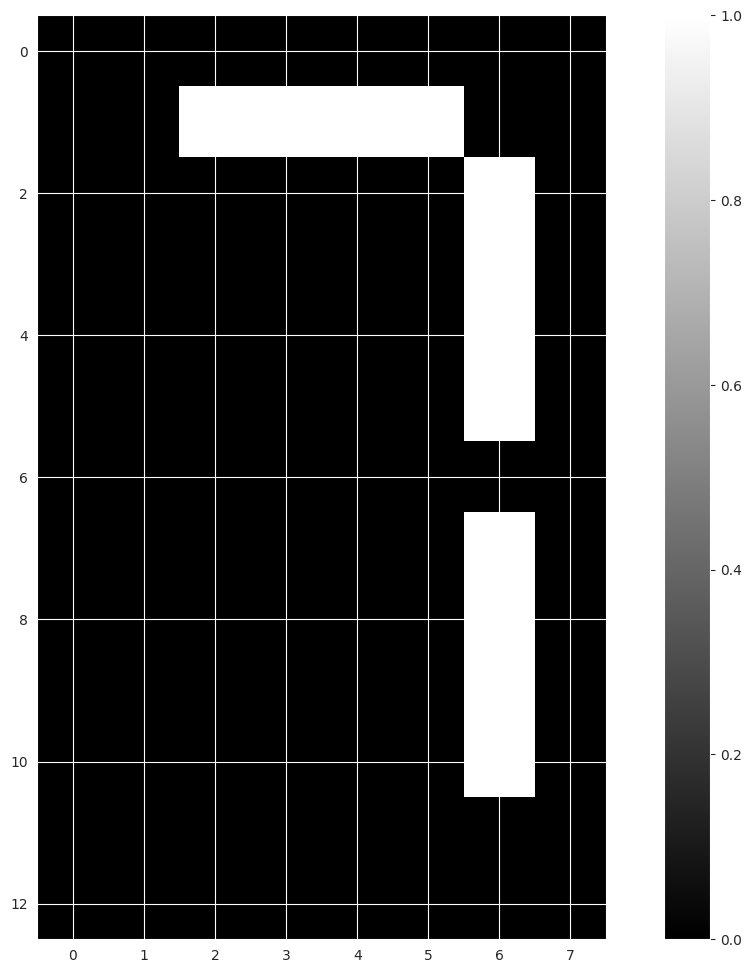

In [118]:
# Use plt.imshow to display bitmap
plt.figure(figsize=(15,12))
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()

***Excellent travail! Vous explorerez cet ensemble de données plus en détail dans le prochain exercice et verrez par vous-même comment NMF peut apprendre les parties d'images.***


####**NMF apprend les parties des images**

+ ***Utilisez maintenant ce que vous avez appris sur NMF pour décomposer l'ensemble de données de chiffres. Vous obtenez à nouveau les images numériques sous la forme d'un tableau 2D samples. Cette fois, vous disposez également d'une `fonction show_as_image()` qui affiche l'image encodée par n'importe quel tableau 1D :***

      def show_as_image(sample):
          bitmap = sample.reshape((13, 8))
          plt.figure()
          plt.imshow(bitmap, cmap='gray', interpolation='nearest')
          plt.colorbar()
          plt.show()


+ *Une fois que vous avez terminé, prenez un moment pour parcourir les tracés et remarquez comment NMF a exprimé le chiffre sous la forme d'une somme des composants !*

####**Instructions**

+ Importer NMF depuis sklearn.decomposition.
+ Créez une instance NMF appelée model avec 7 des composants. (7 est le nombre de cellules dans un affichage LED).
+ Appliquez la méthode .fit_transform() de modelà samples. Affectez le résultat à features.
+ À chaque composant du modèle (accessible via model.components_), appliquez la fonction show_as_image() à ce composant à l'intérieur de la boucle.
+ Attribuez la ligne 0 de features à digit_features.
+ Imprimer digit_features.



In [119]:
def show_as_image(sample):
    bitmap = sample.reshape((13, 8))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()

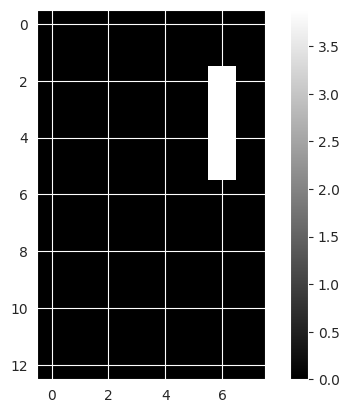

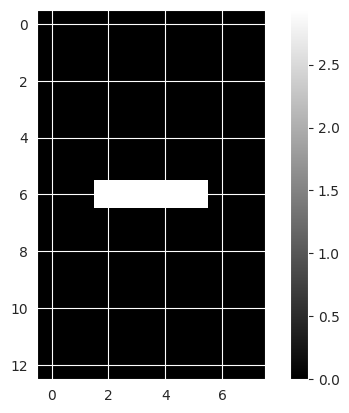

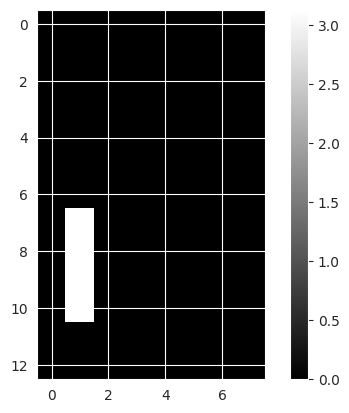

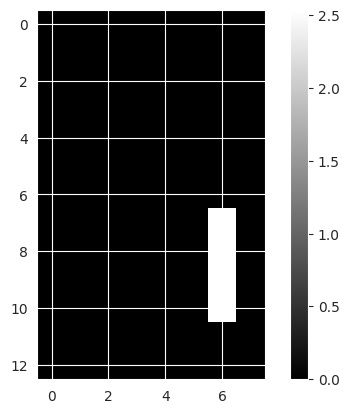

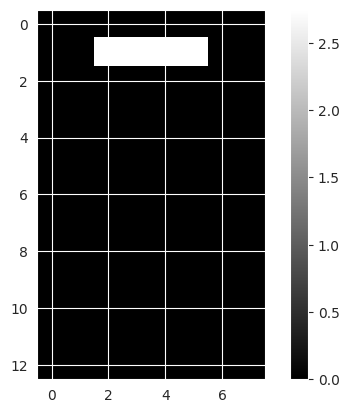

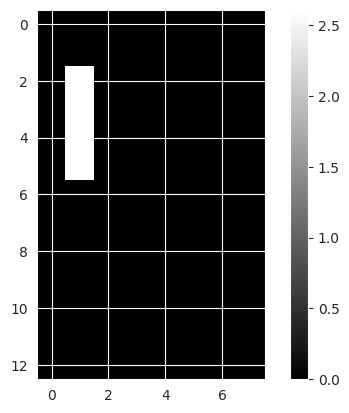

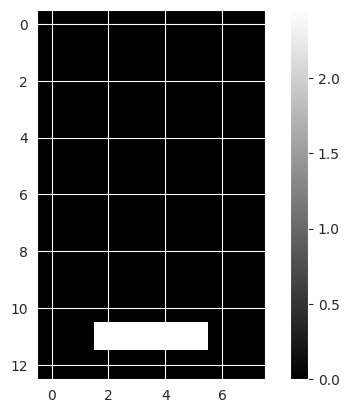

[2.57347960e-01 0.00000000e+00 0.00000000e+00 3.94333376e-01
 3.64045642e-01 0.00000000e+00 3.51282024e-14]


In [120]:
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF model: model
model = NMF(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

# Assign the 0th row of features: digit_features
digit_features = features[0,:]

# Print digit_features
print(digit_features)

***Bon travail! Prenez un moment pour parcourir les tracés et remarquez comment NMF a exprimé le chiffre comme une somme des composants !***

####**PCA n'apprend pas les pièces**

+ ***Contrairement à NMF, PCA n'apprend pas les parties des choses. Ses composants ne correspondent pas à des sujets (dans le cas de documents) ou à des parties d'images, lorsqu'ils sont entraînés sur des images. Vérifiez cela par vous-même en inspectant les composants d'un modèle PCA adapté à l'ensemble de données d'images de chiffres LED de l'exercice précédent. Les images sont disponibles sous forme de tableau 2D samples. Une version modifiée de la fonction show_as_image() qui colore un pixel en rouge si la valeur est négative est également disponible.***

+ *Après avoir soumis la réponse, notez que les composants de PCA ne représentent pas des parties significatives d'images de chiffres LED !*

####**Instructions**

+ Importer PCA depuis sklearn.decomposition.
+ Créez une instance PCA  appelée model avec 7 des composants.
+ Appliquez la méthode .fit_transform() de modelà samples. Affectez le résultat à features.
+ À chaque composant du modèle (accessible via model.components_), appliquez la fonction show_as_image() à ce composant à l'intérieur de la boucle.

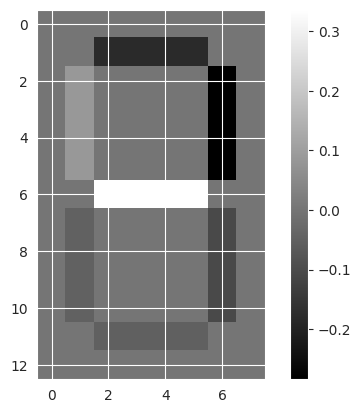

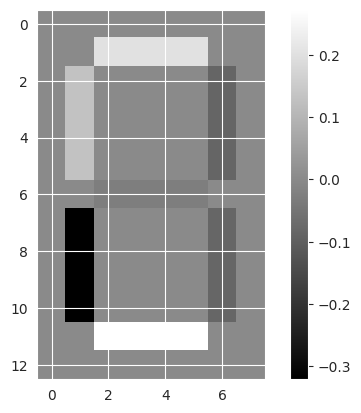

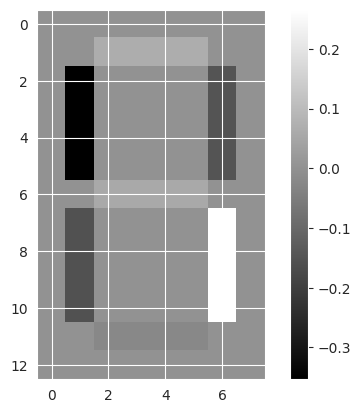

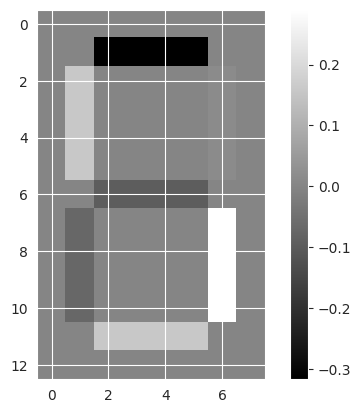

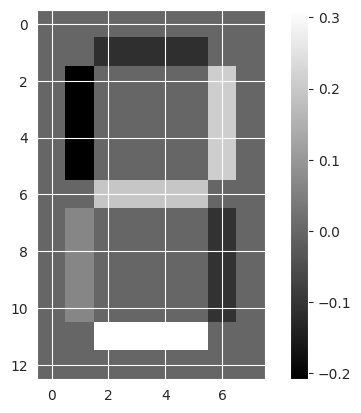

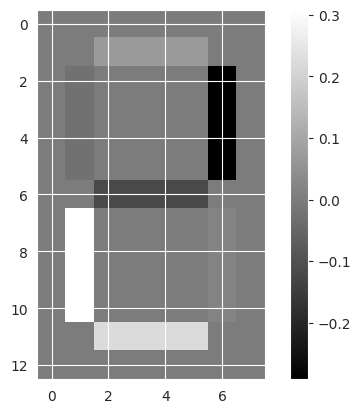

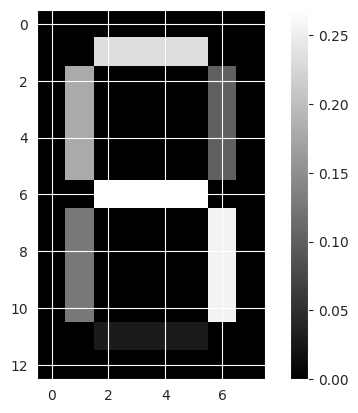

In [121]:
# Import PCA
from sklearn.decomposition import PCA

# Create a PCA instance: model
model = PCA(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_ :
    show_as_image(component)

***Bon travail! Notez que les composants de PCA ne représentent pas des parties significatives d'images de chiffres LED !***

####**1. Construire des systèmes de recommandation à l'aide de NMF**

####**2. Trouver des articles similaires**

+ ***Supposons que vous soyez ingénieur dans un grand journal en ligne. Vous avez été chargé de recommander des articles similaires à l'article actuellement lu par un client. Étant donné un article, comment pouvez-vous trouver des articles qui ont des sujets similaires ? Dans cette vidéo, vous apprendrez à résoudre ce problème, et d'autres similaires, en utilisant NMF.***

####**3. Stratégie**

+ ***Notre stratégie pour résoudre ce problème est d'appliquer NMF au tableau de fréquences de mots des articles et d'utiliser les caractéristiques NMF résultantes. Vous avez appris dans les vidéos précédentes que ces fonctionnalités NMF décrivent le mélange de sujets d'un article. Ainsi, des articles similaires auront des fonctionnalités NMF similaires. Mais comment comparer deux articles en utilisant leurs fonctionnalités NMF ? Avant de répondre à cette question, plantons le décor en faisant la première étape.***

####**4. Appliquer NMF au tableau de fréquence de mots**

+ ***On vous donne un tableau de fréquences de mots articles correspondant à la collection d'articles de journaux en question. Importez NMF, créez le modèle et utilisez la méthode fit_transform pour obtenir les articles transformés. Nous avons maintenant des fonctionnalités NMF pour chaque article, données par les colonnes du nouveau tableau.***

####**5. Stratégie**

Nous devons maintenant définir comment comparer les articles en utilisant leurs fonctionnalités NMF.

####**6. Versions des articles**

+ ***Des documents similaires ont des sujets similaires, mais il n'est pas toujours vrai que les valeurs des fonctionnalités NMF sont exactement les mêmes. Par exemple, une version d'un document peut utiliser un langage très direct,***

####**7. Versions des articles**

+ ***tandis que d'autres versions pourraient entrelacer le même contenu avec des bavardages sans signification. Les bavardages sans signification réduisent la fréquence des mots de sujet dans l'ensemble, ce qui réduit les valeurs des caractéristiques NMF représentant les sujets.***

####**8. Versions des articles**

+ ***Cependant, sur un nuage de points des entités NMF, toutes ces versions se trouvent sur une seule ligne passant par l'origine.***

####**9. Similitude du cosinus**

+ ***Pour cette raison, lors de la comparaison de deux documents, il est judicieux de comparer ces lignes. Nous les comparerons en utilisant ce que l'on appelle la similarité cosinus, qui utilise l'angle entre les deux lignes. Des valeurs plus élevées indiquent une plus grande similarité. La définition technique de la similarité du cosinus sort du cadre de ce cours, mais nous avons déjà acquis une intuition.***

####**10. Calcul des similitudes cosinus**

+ ***Voyons maintenant comment calculer la similarité cosinus. Tout d'abord, importez la fonction de normalisation et appliquez-la au tableau de toutes les fonctionnalités NMF. Sélectionnez maintenant la ligne correspondant à l'article actuel et passez-la à la méthode point du tableau de toutes les fonctionnalités normalisées. Il en résulte des similitudes cosinus.***

####**11. DataFrames et étiquettes**

+ ***Avec l'aide d'un pandas DataFrame, nous pouvons étiqueter les similitudes avec les titres d'articles. Commencez par importer des pandas. Après avoir normalisé les fonctionnalités NMF, créez un DataFrame dont les lignes sont les fonctionnalités normalisées, en utilisant les titres comme index. Utilisez maintenant la méthode loc du DataFrame pour sélectionner les valeurs de caractéristiques normalisées pour l'article actuel, en utilisant son titre "Dog bites man". Calculez les similitudes cosinus à l'aide de la méthode des points du DataFrame.***

####**12. DataFrames et étiquettes**

+ ***Enfin, utilisez la méthode la plus large de la série de pandas résultante pour trouver les articles avec la plus grande similarité de cosinus. On voit que tous se préoccupent des « animaux domestiques » et/ou du « danger » !***

####**13. Entraînons-nous !**

+ ***Vous avez maintenant appris à créer un système de recommandation à l'aide de NMF et de la similarité cosinus. Il est maintenant temps de vous entraîner à recommander !***

###**EXERCICES**
####**Quels articles sont similaires à 'Cristiano Ronaldo' ?**

+ ***Dans la vidéo, vous avez appris à utiliser les fonctionnalités NMF et la similarité cosinus pour trouver des articles similaires. Appliquez ceci à votre modèle NMF pour les articles Wikipédia populaires, en trouvant les articles les plus similaires à l'article sur le footballeur Cristiano Ronaldo. Les fonctionnalités NMF que vous avez obtenues précédemment sont disponibles en tant que nmf_features, tandis que titlesest une liste des titres d'articles.***

####**Instructions**

+ Importer normalize depuis sklearn.preprocessing.
+ Appliquez la fonction normalize() à nmf_features. Enregistrez le résultat sous forme de norm_features.
+ Créez un DataFrame dfà partir de norm_features, en l'utilisant titles comme index.
+ Utilisez l'accesseur .loc[] de df pour sélectionner la ligne de 'Cristiano Ronaldo'. Affectez le résultat à article.
+ Appliquez la méthode .dot() de dfà articlepour calculer la similarité cosinus de chaque ligne avec article.
+ Imprimer le résultat de la méthode .nlargest() de similaritiespour afficher les articles les plus similaires.
+ Cela a été fait pour vous, alors cliquez sur "Soumettre la réponse" pour voir le résultat !

In [122]:
# Perform the necessary imports
import pandas as pd
from sklearn.preprocessing import normalize

# Normalize the NMF features: norm_features
norm_features = normalize(nmf_features)

# Create a DataFrame: df
df = pd.DataFrame(norm_features,index=titles)

# Select the row corresponding to 'Cristiano Ronaldo': article
article = df.loc['Cristiano Ronaldo']

# Compute the dot products: similarities
similarities = df.dot(article)

# Display those with the largest cosine similarity
print(similarities.nlargest())

Cristiano Ronaldo                1.000000
Franck Ribéry                    0.999973
Radamel Falcao                   0.999942
Zlatan Ibrahimović               0.999942
France national football team    0.999923
dtype: float64


***Excellent travail - bien que vous ayez peut-être besoin de connaître un peu le football (ou le football, selon d'où vous venez !) Pour pouvoir évaluer par vous-même la qualité des similitudes calculées !***

####**Recommander des artistes musicaux partie I**

+ ***Dans cet exercice et le suivant, vous utiliserez ce que vous avez appris sur NMF pour recommander des artistes musicaux populaires ! On vous donne un tableau clairsemé artistsdont les lignes correspondent aux artistes et dont les colonnes correspondent aux utilisateurs. Les entrées donnent le nombre de fois que chaque artiste a été écouté par chaque utilisateur.***

+ ***Dans cet exercice, créez un pipeline et transformez le tableau en fonctionnalités NMF normalisées. La première étape du pipeline, MaxAbsScaler, transforme les données afin que tous les utilisateurs aient la même influence sur le modèle, quel que soit le nombre d'artistes différents qu'ils ont écoutés. Dans l'exercice suivant, vous utiliserez les fonctions NMF normalisées résultantes à titre de recommandation !***

####**Instructions**

+ Importer:
  + NMF de sklearn.decomposition.
  + Normalizer et MaxAbsScaler de sklearn.preprocessing.
  + make_pipeline de sklearn.pipeline.
+ Créez une instance de MaxAbsScaler appelée scaler.
+ Créez une NMFinstance avec 20 des composants appelés nmf.
+ Créez une instance de Normalizer appelée normalizer.
+ Créez un pipeline appelé pipeline qui enchaîne scaler, nmf et normalizer.
+ Appliquez la méthode .fit_transform() de pipeline à artists. Affectez le résultat à norm_features.

In [123]:
from scipy.sparse import coo_matrix

df = pd.read_csv('data/2021-03-29_unsupervised_learning_python/Musical artists/scrobbler-small-sample.csv')
artists1 = df.sort_values(['artist_offset', 'user_offset'], ascending=[True, True])
row_ind = np.array(artists1['artist_offset'])
col_ind = np.array(artists1['user_offset'])
data1 = np.array(artists1['playcount'])
artists = coo_matrix((data1, (row_ind, col_ind)))

In [124]:
artists

<111x500 sparse matrix of type '<class 'numpy.int64'>'
	with 2894 stored elements in COOrdinate format>

In [125]:
# Perform the necessary imports
from sklearn.decomposition import NMF
from sklearn.preprocessing import Normalizer, MaxAbsScaler
from sklearn.pipeline import make_pipeline

# Create a MaxAbsScaler: scaler
scaler = MaxAbsScaler()

# Create an NMF model: nmf
nmf = NMF(n_components=20)

# Create a Normalizer: normalizer
normalizer = Normalizer()

# Create a pipeline: pipeline
pipeline = make_pipeline(scaler, nmf,normalizer)

# Apply fit_transform to artists: norm_features
norm_features =pipeline.fit_transform(artists)

***Excellent travail - maintenant que vous avez calculé les fonctionnalités NMF normalisées, vous les utiliserez dans le prochain exercice pour recommander des artistes musicaux !***

####**Recommander des artistes musicaux partie II**

+ ***Supposons que vous soyez un grand fan de Bruce Springsteen - quels autres artistes musicaux pourriez-vous aimer ? Utilisez vos fonctionnalités NMF de l'exercice précédent et la similarité cosinus pour trouver des artistes musicaux similaires. Une solution à l'exercice précédent a été exécutée, ainsi norm_featuresqu'un tableau contenant les entités NMF normalisées sous forme de lignes. Les noms des artistes musicaux sont disponibles sous forme de liste artist_names.***

####**Instructions**

+ Importer pandas au format pd.
+ Créez un DataFrame dfà partir de norm_features, en l'utilisant artist_names comme index.
+ Utilisez l'accesseur .loc[] de df pour sélectionner la ligne de 'Bruce Springsteen'. Affectez le résultat à artist.
+ Appliquez la méthode .dot() de df à artist pour calculer le produit scalaire de chaque ligne avec artist.
+ Enregistrez le résultat sous similarities.
Imprimez le résultat de la méthode .nlargest() de similarities pour afficher les artistes les plus similaires à 'Bruce Springsteen'.



In [126]:
df = pd.read_csv('data/2021-03-29_unsupervised_learning_python/Musical artists/artists.csv', header=None)
artist_names = df.values.reshape(111).tolist()
artist_names

['Massive Attack',
 'Sublime',
 'Beastie Boys',
 'Neil Young',
 'Dead Kennedys',
 'Orbital',
 'Miles Davis',
 'Leonard Cohen',
 'Van Morrison',
 'NOFX',
 'Rancid',
 'Lamb',
 'Korn',
 'Dropkick Murphys',
 'Bob Dylan',
 'Eminem',
 'Nirvana',
 'Van Halen',
 'Damien Rice',
 'Elvis Costello',
 'Everclear',
 'Jimi Hendrix',
 'PJ Harvey',
 'Red Hot Chili Peppers',
 'Ryan Adams',
 'Soundgarden',
 'The White Stripes',
 'Madonna',
 'Eric Clapton',
 'Bob Marley',
 'Dr. Dre',
 'The Flaming Lips',
 'Tom Waits',
 'Moby',
 'Cypress Hill',
 'Garbage',
 'Fear Factory',
 '50 Cent',
 'Ani DiFranco',
 'Matchbox Twenty',
 'The Police',
 'Eagles',
 'Phish',
 'Stone Temple Pilots',
 'Black Sabbath',
 'Britney Spears',
 'Fatboy Slim',
 'System of a Down',
 'Simon & Garfunkel',
 'Snoop Dogg',
 'Aimee Mann',
 'Less Than Jake',
 'Rammstein',
 'Reel Big Fish',
 'The Prodigy',
 'Pantera',
 'Foo Fighters',
 'The Beatles',
 'Incubus',
 'Audioslave',
 'Bright Eyes',
 'Machine Head',
 'AC/DC',
 'Dire Straits',
 'Motör

In [127]:
# Import pandas
import pandas as pd

# Create a DataFrame: df
df = pd.DataFrame(norm_features, index=artist_names)

# Select row of 'Bruce Springsteen': artist
artist = df.loc['Bruce Springsteen']

# Compute cosine similarities: similarities
similarities = df.dot(artist)

# Display those with highest cosine similarity
print(similarities.nlargest())


Bruce Springsteen    1.000000
Leonard Cohen        0.962755
Neil Young           0.953446
The Beach Boys       0.856315
Van Morrison         0.848683
dtype: float64


***Bravo et félicitations pour avoir atteint la fin du cours !***